In [47]:
# Importing necessary libraries and general settings
import transformation
import compensation
import data_imports
import pandas as pd
import os
import glob
import math
import re
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from mpl_toolkits import mplot3d
import numpy as np
from scipy.signal import find_peaks

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)

In [48]:
dir_paraquet = 'Manufacturing_Data/'
dir_planning = 'Planing_Data/'
dir_final_save  = 'Final_df/' 

In [49]:
print('Enter the Block number, example 1030')
block = input()
block = int(block)

Enter the Block number, example 1030
1030


In [155]:
## print('Enter the blade angle, muliples of 12')
angle = input()
angle = int(angle)

0


In [156]:
# Importing all the data
df_m,df_p,compensation_values_df = data_imports.data_out(block,angle,dir_paraquet,dir_planning)

In [157]:
df_p.columns

Index(['Leading angle', 'Side tilt angle', 'Surface Contact point X',
       'Surface contact point Y', 'Surface contact point z',
       'Surface Orietation X', 'Surface Orietation Y', 'Surface Orietation Z',
       'Tool Tip Point X', 'Tool Tip Point Y', 'Tool Tip Point Z',
       'Tool Orientation X', 'Tool Orientation Y', 'Tool Orientation Z',
       'Closes Point Distance (Surface Contact Point - Acquired TCP 1030 blade0)'],
      dtype='object')

In [158]:
leading_angle = df_p['Leading angle'].copy(deep=True).to_numpy()
side_tilt_angle = df_p['Side tilt angle'].copy(deep=True).to_numpy()

X_inv = df_p['Tool Tip Point X'].copy(deep=True).to_numpy()
Y_inv = df_p['Tool Tip Point Y'].copy(deep=True).to_numpy()
Z_inv = df_p['Tool Tip Point Z'].copy(deep=True).to_numpy()

I_inv = df_p['Tool Orientation X'].copy(deep=True).to_numpy()
J_inv = df_p['Tool Orientation Y'].copy(deep=True).to_numpy()
K_inv = df_p['Tool Orientation Z'].copy(deep=True).to_numpy()

size_p = X_inv.shape[0]

In [159]:
I_inv = np.sin(leading_angle)*np.sin(side_tilt_angle)
J_inv = np.sin(leading_angle)*np.cos(side_tilt_angle)
K_inv = np.cos(leading_angle)

In [160]:
obj = transformation.Transformation(size_p,angle)
machine_points_xyz, machine_direction_ac = obj.backward(X_inv,Y_inv,Z_inv,I_inv,J_inv,K_inv)

0 -3.2342607444935817e-183 343.77467808183695
1 31.31403426462343 379.64431637229643
2 35.19679735488647 360.0
3 35.19685465066598 360.0
4 -35.061350132117546 364.12890575905124
5 -35.18957808666782 361.2847432640218
6 -35.17611357848225 358.1879636771192
7 -35.00600240910791 355.1395417281257
8 -34.684000128244385 352.18250654745555
9 -34.21572172228396 349.35318365932
10 -33.60769891009113 346.679361516783
11 -32.866921776766496 344.1801196144224
12 -32.00072418208771 341.866172263007
13 -31.01672646473004 339.7410718008668
14 -29.922262484471137 337.8026982841597
15 -28.724666101088694 336.04497836025735
16 -27.43087010390378 334.4588020002172
17 -26.047463507560405 333.0337413721678
18 -24.580634256245986 331.75850920754516
19 -23.036283815250364 330.62193282934413
20 -21.419797987847776 329.6131260394573
21 -19.736276098414876 328.7220620764698
22 -17.99053099243077 327.9396882072187
23 -16.187146332256507 327.25786843101304
24 -14.330476597135073 326.6695553669727
25 -12.42481897

232 -3.537842497594294 324.7088364962555
233 -3.448804856230964 324.6694169999505
234 -3.368075102897031 324.64059722285543
235 -3.3151910984064568 324.60180798012505
236 -3.198995257553925 324.5723006536758
237 -3.1580860709815846 324.5350583969923
238 -3.031634285596212 324.5042905633938
239 -3.0007518604386605 324.46830881385955
240 -2.8637576516228807 324.43616588155277
241 -2.842959283659632 324.4013300476088
242 -2.6992041728613083 324.3682130870502
243 -2.6850521153215765 324.33406480246043
244 -2.538775990224678 324.30048947566576
245 -2.527087651204009 324.2666276699735
246 -2.3818428501383453 324.2329950473993
247 -2.368894003968389 324.1990186501481
248 -2.228347456822798 324.1656725064715
249 -2.210528469394229 324.1312377429841
250 -2.0778314440419305 324.09852185288213
251 -2.051761864363478 324.06334224426115
252 -1.9302948117957432 324.0313711992928
253 -1.8947714284976325 323.995102970861
254 -1.7855083769661844 323.96410595414443
255 -1.6801987342211393 323.9282387961

458 -6.557788444169836 325.056965652577
459 -6.57325830463837 325.2438071895691
460 -6.7917844077012655 325.34974708588885
461 -6.767949363423824 325.3247088302416
462 -6.579159769928217 325.3232764357538
463 -6.544553119102315 325.28861248914836
464 -6.3927193033926475 325.26214183901334
465 -6.149498719359612 325.2312021180763
466 -6.163650776899345 325.2029552987763
467 -5.92787864420301 325.1741928174607
468 -5.794895139953145 325.1383256594856
469 -5.771862236588887 325.10887562881584
470 -5.546116865307344 325.0794828939257
471 -5.522511004147953 325.06074717402487
472 -5.4130760652779655 325.04596486291047
473 -5.31779318394771 325.017431564713
474 -5.121956209571995 324.98150711095826
475 -4.945198729774135 324.9401395581498
476 -4.847337538365791 324.89951685047504
477 -4.634712900592742 324.8578055229895
478 -4.439792658689236 324.81105216690685
479 -4.384330344120572 324.7553606692201
480 -4.198921201616238 324.71003970762524
481 -3.972488280980537 324.65778595670935
482 -3.

811 7.183687539570748 317.4209279337505
812 7.228779318047544 317.37703936664343
813 7.287507492048453 317.3419743495814
814 7.373966823333696 317.3082271354482
815 7.739972262863267 317.2604997511138
816 8.36873614723983 317.04758863444323
817 8.157085537718503 316.7901014013114
818 7.893123881501734 316.56544464984063
819 7.545395795636837 316.35791933644424
820 7.661362453371316 316.1686713767125
821 7.266021574731049 316.0044043768485
822 6.997132481476152 315.84592425071537
823 7.1231259006254195 315.7021118441375
824 6.708533640068756 315.5499342537508
825 6.746520741885932 315.4060072556139
826 6.420163981779414 315.2519389045032
827 6.236760191558037 315.130414556156
828 6.059544345524073 314.9931338684426
829 5.635269098229698 314.87504726686615
830 5.5485232880468915 314.7565595948331
831 5.223083260412585 314.6482705715534
832 5.045065273465438 314.53889292846293
833 4.771764405188035 314.43260925746614
834 4.35528138390744 314.3453477852677
835 4.209406329267132 314.2587738

1106 -4.826768353520594 319.3097406011787
1107 -4.674648058913359 319.28017597895
1108 -4.672642706630403 319.2501529904851
1109 -4.573750191190823 319.21325450847866
1110 -4.513016664906956 319.19033619667346
1111 -4.449361053867921 319.1545836302573
1112 -4.329326395788013 319.1294880788306
1113 -4.294204082946494 319.09786080853934
1114 -4.15062085948671 319.0693848061214
1115 -4.142885929252444 319.0410806910419
1116 -3.9841766200012056 319.0101982658843
1117 -3.990192676850079 318.9846443482215
1118 -3.920463713182658 318.9498658100571
1119 -3.827816437710004 318.92832259696013
1120 -3.769489334165686 318.8956640026377
1121 -3.6604554657522903 318.87240191615535
1122 -3.6185722509282274 318.8418632656749
1123 -3.497162494140006 318.81739796782284
1124 -3.4677697592497947 318.7885208949482
1125 -3.3373072692985066 318.76336804774195
1126 -3.317024563350875 318.7358660735757
1127 -3.1772801571184672 318.7099683812358
1128 -3.166451254790495 318.68372691421877
1129 -3.020862679047752

1332 -6.74388513602833 317.495584334456
1333 -6.756604799080233 317.6659246869484
1334 -6.580362981297992 317.8547715762235
1335 -6.619839773382507 318.0243670835822
1336 -6.376561893569958 318.2076562822446
1337 -6.408991304774362 318.36774069020413
1338 -6.205132921266816 318.5450138320176
1339 -6.066935501081261 318.6907742950989
1340 -5.861129061070269 318.8676463664558
1341 -5.737312881542499 319.037299169594
1342 -5.628966562483259 319.19560740838864
1343 -5.556372809840184 319.36021818292977
1344 -5.428374038407959 319.52740726754894
1345 -5.145848549628949 319.7009561836941
1346 -5.012120200245415 319.8484355201607
1347 -5.331716058369388 319.9038978347294
1348 -5.26594050348837 319.88756853756814
1349 -5.100298404916049 319.89369918597606
1350 -5.028735976304209 319.8744478040596
1351 -4.8666462160616994 319.86373349329074
1352 -4.63522856260836 319.8472323087909
1353 -4.626748787240424 319.82918413824433
1354 -4.396477049377346 319.81365698199625
1355 -4.20917714614908 319.79

1558 -4.313226281744838 316.4023808613464
1559 -4.319471521711763 316.3779155634943
1560 -4.249513374926289 316.3452569691718
1561 -4.162538381625431 316.32629206615303
1562 -4.10117460176692 316.2960398945701
1563 -3.995120113888204 316.27529882238633
1564 -3.952835828607549 316.247567665102
1565 -3.8319417338349453 316.22562338154853
1566 -3.80507001324331 316.19995487232666
1567 -3.6728313541271156 316.1772657436395
1568 -3.657705268335663 316.153201516244
1569 -3.5171587211900714 316.13022590865927
1570 -3.51062700232558 316.1075940757516
1571 -3.3931706543237614 316.08324336945856
1572 -3.3628611869613407 316.06284607195187
1573 -3.248097740596637 316.03855266143836
1574 -3.214694301140509 316.0189002090653
1575 -3.1058896158451668 315.99495057322883
1576 -3.06784521824848 315.9758137828715
1577 -2.965629547597141 315.9522652174916
1578 -2.922944191859895 315.93358679337035
1579 -2.8268018738369425 315.91032470688805
1580 -2.780163109313294 315.8921046490029
1581 -2.63892901281354

1925 2.2545889238397896 311.4464105250238
1926 1.9282321637332727 311.94683186329104
1927 1.8363297333942885 312.5368638007168
1928 1.5995835724462322 313.12426013228486
1929 1.2532878810691628 313.56199988776484
1930 1.1416184067981652 314.11032049770506
1931 0.8966789493797384 314.6596724316765
1932 0.5283816786696451 315.11500199146695
1933 -0.4192332186972234 315.6259084573851
1934 -0.15372457643359988 316.12260556998405
1935 -0.19973308738260498 316.5220717447492
1936 -0.3571818894845552 316.9751667691387
1937 -0.6587295770619075 317.3934259595842
1938 -0.9187951202717882 317.74155511590567
1939 -1.161614633848231 318.11065452752894
1940 -1.5822229512537687 318.4052694257852
1941 -1.6904546787539807 318.6673976170576
1942 -1.9797983652950466 318.75414342724036
1943 -2.3452881428089984 318.84977008324773
1944 -2.550750808142912 318.95462135975663
1945 -2.8996248095980697 319.0713328626248
1946 -3.0711683734602384 319.19119563336614
1947 -3.3213217468143563 319.3254396447653
1948 -3

2222 -5.341341749327587 313.49542219197065
2223 -5.32392383235561 313.6313277809757
2224 -5.046325780614725 313.7767444693799
2225 -5.020714567172377 313.9031389589857
2226 -4.8145070567047945 314.03950291422683
2227 -4.628811435302895 314.15438095215063
2228 -4.382554174955667 314.2892552171244
2229 -4.162996747861535 314.41845719992637
2230 -4.002224790547826 314.5385491537858
2231 -3.873767652879496 314.65990161479453
2232 -3.702682455253432 314.78154055470077
2233 -3.459519166999911 314.90180439589875
2234 -3.194354299413366 315.00780158799796
2235 -3.6383965906397537 315.03891319627354
2236 -3.602071066428459 315.0396580414072
2237 -3.522429932905274 315.03610570307745
2238 -3.382399047775302 315.0473929716415
2239 -3.278006137502466 315.0460178729332
2240 -3.0806221770798974 315.0512317888689
2241 -2.8822068926260926 315.0481378167752
2242 -2.84943370674461 315.04292390083947
2243 -2.624719659494301 315.0396007456277
2244 -2.383561723523737 315.0298604631105
2245 -2.4215488253409

2463 -3.530050271580515 311.10951134148684
2464 -3.492922606456038 311.09444255147497
2465 -3.3954624855042845 311.0843584942806
2466 -3.3573607921280852 311.0698626620638
2467 -3.2643697419783524 311.0605807457827
2468 -3.2127462446370645 311.04688705447904
2469 -3.1362563789871003 311.03812080021356
2470 -3.0817107968906456 311.024541700469
2471 -3.011236988089554 311.0168067702347
2472 -2.9150946700666025 311.00420169874184
2473 -2.887478104341297 310.996294881169
2474 -2.7612555020739764 310.9862108239747
2475 -2.7580469384212436 310.976642428796
2476 -2.646950421945377 310.967818878751
2477 -2.6263812371001807 310.95762022999764
2478 -2.53287452493483 310.95022907444053
2479 -2.4951739020152224 310.93911369321495
2480 -2.4134701204295665 310.93773859450664
2481 -2.360758003277531 310.92983177693384
2482 -2.30162875882003 310.9169975223229
2483 -2.144294548277106 310.91052309923793
2484 -2.170134944837506 310.9055956621998
2485 -2.099489248697876 310.89545430922595
2486 -1.92147126

2683 -2.3740506241245662 312.7878766107636
2684 -2.2643865021365266 312.7906841039597
2685 -2.142804858009766 312.79859092153254
2686 -2.0877436138976937 312.8032318796731
2687 -1.8911044986087953 312.80787283781365
2688 -1.8473305230608 312.80964900697853
2689 -1.625022898550041 312.8121127254976
2690 -1.3820314976350587 312.80804472515223
2691 -1.4168673315790128 312.80099734427205
2692 -1.2194260753769313 312.79469480852566
2693 -1.1098765449479178 312.79068410395973
2694 -1.120590855716864 312.7871317656299
2695 -1.0187189597426038 312.7795114269547
2696 -0.7610025434927594 312.76392697492713
2697 -0.6876639457160141 312.7430140154048
2698 -0.476758181328358 312.7214708023079
2699 -0.2971359125548449 312.69322398300795
2700 -0.08995437383553924 312.65999243089044
2701 0.052368342474957245 312.62406797713567
2702 0.16197516868348374 312.58527873440534
2703 0.37712082075510783 312.54127557573923
2704 0.43877107951118444 312.4915428391219
2705 0.5266055095047396 312.44089337003237
270

3013 2.58157593752095 307.5442241655058
3014 2.641851097568713 307.5017106971071
3015 2.7903044622871094 307.4559313692762
3016 2.7920233356725013 307.4128449430823
3017 2.8987080771258613 307.3659196996611
3018 2.948899179979321 307.319682005594
3019 3.0066533257285086 307.27126707190547
3020 3.11488505322872 307.2235969833506
3021 3.147715534889717 307.1769009230474
3022 3.2262107528226385 307.12527742570614
3023 3.3312912124496323 307.06815353353164
3024 3.391566372497395 307.01492575436396
3025 3.449148630908043 306.9611250174012
3026 3.5596148938092655 306.90285520963636
3027 3.6245310119975875 306.8451583596667
3028 3.7336794719700097 306.78545615741405
3029 3.7871937300352285 306.7273009412083
3030 3.8428279319424314 306.66777062629416
3031 3.9475073211128326 306.6031409870034
3032 4.051212682031512 306.53856864349217
3033 4.0858193328574135 306.4754859902483
3034 4.168439846915278 306.4148670555234
3035 4.437042461272608 306.3626133046075
3036 4.982383690678126 306.298098256875

3316 -6.997418960373719 309.5930639451141
3317 -7.084737728351655 308.9239065361809
3318 -6.852976300221237 307.6790984304796
3319 -6.991746678201923 306.3197560615317
3320 -7.175608834659403 305.0770678996725
3321 -7.14300753611646 305.01662085228617
3322 -7.140715704935936 305.13619714413
3323 -6.926429489557009 305.2781760857634
3324 -6.948717547787599 305.39523136330865
3325 -6.697074484166141 305.53824162897325
3326 -6.644591550132157 305.6514580892911
3327 -6.7253785992456026 305.7730970291974
3328 -6.366248653257603 305.91530515394885
3329 -6.13551854915842 306.0474292215061
3330 -6.021671835265926 306.1840796556447
3331 -5.819016663128153 306.3354551051183
3332 -5.455646829456185 306.51387416252203
3333 -5.717259358712919 306.6476025119056
3334 -5.058071415414907 306.8236724423493
3335 -5.5126561300717025 306.9293258597714
3336 -5.84348196098024 306.9158040558063
3337 -5.766705616432709 306.8881301943015
3338 -5.695200483600383 306.8723738549354
3339 -5.6314875767818355 306.847

3545 -5.2638778554259 305.37334437553466
3546 -5.199534695032709 305.50907807720114
3547 -5.333549523313807 305.63713414441287
3548 -5.169626298126879 305.7718938178276
3549 -5.1169141809748435 305.90900261820246
3550 -5.166245847135607 306.03482415001315
3551 -4.986165212125989 306.16797954160154
3552 -4.963533379218322 306.30165059520556
3553 -4.860744750771851 306.42437815492264
3554 -4.703926202244546 306.5542676870788
3555 -4.740595501132917 306.6773963172524
3556 -4.454059307787993 306.7992071444972
3557 -4.286411856932715 306.92170552109616
3558 -4.2282566407269355 307.03475009407543
3559 -3.9696807877843954 307.1495708362197
3560 -3.978275154711358 307.2578025637199
3561 -3.6056234047582705 307.36362786848053
3562 -3.405088176462482 307.46876562388707
3563 -3.2564629244055467 307.56227233605244
3564 -2.984709042174997 307.6579562878393
3565 -2.8708050325029895 307.7438426613294
3566 -2.5305253979747935 307.8303592883941
3567 -2.4090583454070593 307.9063334920285
3568 -2.2241648

3749 -0.748225584661342 316.0822120454273
3750 -1.0469084832630402 316.4986950667079
3751 -1.3957251889386855 316.8326721654896
3752 -1.614881545576225 317.1712902224119
3753 -2.1032134743662256 317.29653879642757
3754 -2.2204406392499925 317.39331136802514
3755 -2.5341923278636305 317.5057829832093
3756 -2.8650754545516817 317.6261041201868
3757 -3.098441164508466 317.7576552299488
3758 -3.518934890354977 317.9024416647784
3759 -3.6021856579874854 318.04785835318256
3760 -3.8516514819874463 318.19201453443753
3761 -4.237939627464647 318.12893188119364
3762 -4.350124763751262 317.98775508047333
3763 -4.59191295329647 317.8030334873232
3764 -4.8999350639588 317.61487414740225
3765 -4.984331747181571 317.3362447716301
3766 -5.18320539787148 317.02043043495405
3767 -5.405283839264187 316.72042973342354
3768 -5.4718042392788755 316.47256819124993
3769 -5.772950856399636 316.38072305669044
3770 -5.809963929965086 315.9123873549505
3771 -5.933379039036266 315.4191852849019
3772 -6.1349455913

4089 4.298386674850949 306.31414107513945
4090 4.476748436475174 306.28262839640723
4091 4.42667192518074 306.25512642224095
4092 4.577245233741121 306.22412940552437
4093 4.564812049586782 306.19278861413073
4094 4.621534871304733 306.1607602733829
4095 4.738532853070447 306.09171885906966
4096 4.852035792285863 306.02147423338664
4097 4.921249093937667 305.94813563560984
4098 5.119664378391471 305.863280586151
4099 5.11221592705477 305.7843842977615
4100 5.210821963596786 305.6951174732801
4101 5.295791604614686 305.60671008549144
4102 5.357556454929789 305.51320337332606
4103 5.474267957797938 305.4161443228309
4104 5.53620469545158 305.3171945116118
4105 5.659791691861297 305.212801601339
4106 5.670964368866348 305.10984108555397
4107 5.78773316751401 304.99971859732983
4108 5.779998237279744 304.8918306445067
4109 5.92266472826732 304.7764369445673
4110 5.888287260559471 304.6645955829578
4111 6.006774932592525 304.5455922489091
4112 5.974001746711041 304.4291672249385
4113 6.1289

4431 2.1224075605031083 300.72940685444024
4432 2.1083127987428902 300.69571693608657
4433 2.451629109585279 300.6349834098027
4434 2.4524312504984627 300.5793492078955
4435 2.5603764991011095 300.5281840767903
4436 2.261177938483794 300.47787838237787
4437 2.2049134830019472 300.43192716720836
4438 2.3303912401355973 300.386434318275
4439 2.050845131891269 300.3395090748537
4440 2.238374218237587 300.3020949308317
4441 2.0153790443726707 300.26387864589645
4442 2.051933751702017 300.2290428119525
4443 1.9530412362624372 300.1964415134096
4444 1.7453440355275136 300.16647582072426
4445 1.7389842040015615 300.1381144098653
4446 1.5014359021403223 300.1067736184716
4447 -1.5010921274632438 300.08356882776883
4448 -1.302848730347979 300.06265586824657
4449 -1.121106517732482 300.04392014834576
4450 -1.0258236364022262 300.02965349924705
4451 -0.7488558382359859 300.0138398641014
4452 -0.6635997183205194 300.00713625789837
4453 -0.30727726552866047 300.0028963702144
4454 -0.242017372663259

4784 -5.106830123780541 300.3235808481491
4785 -5.055435809557307 300.331831440399
4786 -5.0067343969711855 300.3462699768363
4787 -4.904346838981308 300.3581302031955
4788 -4.908529430885762 300.3711936409245
4789 -4.812788183319403 300.38477274066906
4790 -4.810439056359366 300.39817995307516
4791 -4.7255267111209776 300.41347792620513
4792 -4.714812400352032 300.4269997301702
4793 -4.641932168811391 300.44395928090614
4794 -4.601538644254667 300.4583405215639
4795 -4.560400274564274 300.47598762165387
4796 -4.512443707111825 300.4908845243273
4797 -4.4775505773883575 300.509276469551
4798 -4.382840653853232 300.52910080926256
4799 -4.3879399782298965 300.54932621943067
4800 -4.35064042576688 300.5653117419148
4801 -4.250143628500934 300.5800940530292
4802 -4.24934148758775 300.60312695639345
4803 -4.21439106208477 300.6214043100581
4804 -4.181388693085235 300.6357282549364
4805 -4.098137925452727 300.6583600878441
4806 -4.095387728036099 300.6786427937917
4807 -4.059348682722369 300

4993 3.332838198496485 302.4948617085769
4994 3.692712989618155 302.4717142136536
4995 4.162022719609813 302.4365346050326
4996 4.148672802983265 302.41350170166834
4997 3.85153689042842 302.4416339294092
4998 3.9217242203319453 302.477902157841
4999 4.188951735980961 302.5017372021184
5000 4.138989816245553 302.5354844162517
5001 4.227225316695701 302.56705439076336
5002 4.4098269660038945 302.58848301230125
5003 4.4373862359496865 302.61535473289285
5004 4.560457570343789 302.63930436872937
5005 4.63729121067083 302.66130594806236
5006 4.719682541610642 302.6819324286871
5007 4.795714041024503 302.7015275852806
5008 4.873349822264731 302.72106544609454
5009 5.036871976995068 302.73309755979227
5010 5.036700089656527 302.75194787125207
5011 5.176673679006987 302.76495401320153
5012 5.241704388754336 302.77515266195485
5013 5.267716672653276 302.79085170554146
5014 5.397892683706999 302.7989877062323
5015 5.455933308353751 302.80563401665586
5016 5.4940922975094635 302.817265059897
501

5309 -4.302053604739785 299.09533122272717
5310 -4.27592672928182 299.1168171400446
5311 -4.174570495323178 299.1416262125738
5312 -4.209119850369567 299.1664925808824
5313 -4.190441426248301 299.1864888079325
5314 -4.117274715810095 299.2121573171543
5315 -4.116930941133018 299.23501833318005
5316 -4.093038601076061 299.2562177715999
5317 -4.047316569024622 299.27993822431836
5318 -4.040040005026461 299.29924690201426
5319 -4.009501354545987 299.3218214391424
5320 -3.9723163936419974 299.3426198071057
5321 -3.965440900100427 299.36026690719564
5322 -3.9302039956998813 299.3828414443238
5323 -3.8478699605395823 299.40197823468117
5324 -3.838817227376516 299.4208858419205
5325 -3.8487293972322787 299.43807457577446
5326 -3.7753335036760207 299.4554351969669
5327 -3.7840424621620095 299.47313959283645
5328 -3.743075979810155 299.486604101022
5329 -3.7351691622373497 299.5049960462457
5330 -3.7146572731716665 299.5170281599435
5331 -3.6624608180352487 299.5335866402227
5332 -3.65466859202

5629 8.717552852915476 292.4853463234209
5630 8.763446772305455 292.44512468620275
5631 8.761613307361035 292.4083407957553
5632 8.813465987820374 292.37276011667774
5633 8.868699119270987 292.3357470431123
5634 8.945475463818516 292.29208765912324
5635 8.995093608876845 292.2608041635092
5636 8.993947693286582 292.25215250080265
5637 9.079891362556209 292.2034510882165
5638 9.19476940047994 292.1738864659878
5639 9.369464232215327 292.1345815612418
5640 9.392267952461532 292.10759524909116
5641 9.509036751109196 292.0794630213502
5642 -9.686252597143158 472.04073107439945
5643 -9.727620149951605 472.01477608628
5644 -9.836195652128895 471.9863573796415
5645 -9.95989724009764 471.9516361372565
5646 -10.083828011184437 471.9184618809184
5647 -10.210910050144454 471.88591787815506
5648 -10.325043242934514 471.85388953740727
5649 -10.404226010221592 471.82489787297357
5650 -10.598172223873377 471.7904631094862
5651 -11.35997690827932 471.67283487414585
5652 -11.657055525054648 471.5203135

5841 -4.338493720510106 298.0234417795964
5842 -4.278275856241857 298.02670763902864
5843 -4.2849794624448885 298.03100482249215
5844 -4.271801433156878 298.02917135754774
5845 -4.255987798011268 298.0257909065565
5846 -4.223042724791245 298.02693682214675
5847 -4.209979287062263 298.02183749777004
5848 -4.171247340111419 298.017253835409
5849 -4.143401591268062 298.0108940038831
5850 -4.155147226068244 298.0007526509093
5851 -4.08037623380367 297.99101236839203
5852 -4.101289193325946 297.9812720858748
5853 -4.092408347501419 297.9655730422882
5854 -4.026804679958938 297.95291067501586
5855 -4.0373471033893455 297.93703974409067
5856 -4.009042988309884 297.9161267845684
5857 -3.9911094093222883 297.89996937474575
5858 -3.9785616336089245 297.8760197389093
5859 -3.9221252907885376 297.8555651456231
5860 -3.9328396015574834 297.8296101575037
5861 -3.8670067508969526 297.80417083139986
5862 -3.880012892846422 297.77483539228916
5863 -3.8372702413296627 297.7444686291472
5864 -3.830738522

6173 3.7711509117715654 305.30854284890535
6174 3.6591376628234897 306.02909457206187
6175 3.5560625554794543 306.49588328775496
6176 3.045442568458865 307.0235201212909
6177 2.9058700495649963 307.7074025455591
6178 2.630391941666096 308.4177556199623
6179 2.3203071829412947 308.97123285005864
6180 2.1758645227888143 309.272665946077
6181 1.836100550276236 309.9468653836074
6182 1.4583494759464843 310.50761917770194
6183 1.3085210125197742 311.1555198524359
6184 1.0471949621606058 311.7135234491138
6185 -0.7551583739824249 311.8517781650788
6186 -0.4450736152576235 312.4354502709786
6187 -0.001948056503444799 312.91598997375485
6188 -0.12794147565271283 313.45010123037576
6189 -0.46965350466873584 313.94611079362056
6190 -0.745475387244714 314.3625938149012
6191 -1.0400329897214704 314.7922548654698
6192 -1.3972148792060257 314.8869647890048
6193 -1.672578395545899 315.0322095900706
6194 -2.1130110526629635 315.314792374629
6195 -2.28489839120221 315.58087397468785
6196 -2.60231700970

6497 -10.977183805352418 477.2741848709039
6498 -11.010243470131467 477.3058121411951
6499 -11.177948216766255 477.3227143961514
6500 -11.187516611944941 477.344773271264
6501 -11.26205842109146 477.3687802028799
6502 -11.39458355910522 477.3801247672236
6503 -11.38472868502897 477.39931885336046
6504 -11.502127737251278 477.4139292771362
6505 -11.600791069572805 477.42143502425245
6506 -11.563720700227842 477.4257895034954
6507 -11.565897939849336 477.441259363964
6508 -11.662212145210828 477.4505412802451
6509 -11.791070353335751 477.45489575948807
6510 -11.87243036024433 477.4627452812814
6511 -11.909787208486856 477.47133964820836
6512 -12.019164851577331 477.47196990178304
6513 -12.080815110333408 477.47403254984545
6514 -12.154211003889664 477.47546494433334
6515 -12.230185207524015 477.47151153554694
6516 -12.30931067903158 477.46715705630396
6517 -12.41994882927134 477.45787514002274
6518 -12.454784663215296 477.4505985760247
6519 -12.474494411367795 477.4476764912694
6520 -12.

6871 -6.709278485202427 294.5632923590219
6872 -6.708992006304862 294.5172265522934
6873 -6.654446424208407 294.47723409819326
6874 -6.695470202339773 294.4323715028345
6875 -6.69483994876513 294.38155014640637
6876 -6.651237860555674 294.33319250849735
6877 -6.689855215947492 294.2806522786839
6878 -6.6695725099998615 294.2227835413756
6879 -6.6576549878611395 294.16594612809865
6880 -6.676791778218508 294.1044104609016
6881 -6.635366929630551 294.04127051187817
6882 -6.672150820077951 293.97480740764297
6883 -6.659144678128479 293.90525033131416
6884 -6.658743607671888 293.8395320722126
6885 -6.659545748585072 293.7641308263734
6886 -6.65226918458691 293.6831145941419
6887 -6.635023154953473 293.60324427750066
6888 -6.645909353060958 293.5223999326077
6889 -6.64688338131268 293.4328466292288
6890 -6.613422646077041 293.3463872979435
6891 -6.633361577347593 293.2531670646757
6892 -6.594572334617236 293.16166570479334
6893 -6.621959717224489 293.0646066542982
6894 -6.621787829885949 29

7085 14.344571358895292 290.76475406464306
7086 -14.16718362552279 470.6052999102581
7087 -14.063306377265569 470.4426371922205
7088 -13.908092110564631 470.2848446154415
7089 -13.847186696942224 470.12183812272673
7090 -13.622816424368992 469.9671968138209
7091 -13.614279353221542 469.8864097647075
7092 -13.462674720629929 469.72781504701527
7093 -13.382460629311613 469.64954901220045
7094 -13.24191408216602 469.49708494291605
7095 -13.176310414623542 469.4189334996603
7096 -13.044759304861504 469.2650943316677
7097 -12.937501605613017 469.1932454241582
7098 -12.975603298989215 469.11389076953265
7099 -12.704078599876716 468.9680730106718
7100 -12.709578994709974 468.8931301310687
7101 -12.58421582913535 468.74530701992495
7102 -12.528524331448633 468.67162464747116
7103 -12.413932772422468 468.6033853740711
7104 -12.350105274044896 468.53394288930116
7105 -12.323290849232773 468.4574530236513
7106 -12.23087275687817 468.39236501812434
7107 -12.199761148602567 468.32332360381105
7108 

7459 -2.6617900288392655 293.68099465029997
7460 -2.4317474740942395 293.7565677834777
7461 -2.190704129682702 293.83070852216764
7462 -2.0745655846096844 293.90490655663706
7463 -1.7097060606703764 293.9753803654381
7464 -1.3998504850636273 294.04321856838163
7465 -1.2212022445418367 294.11203079957687
7466 0.8039743781275711 294.17637395997
7467 0.5078697896039618 294.2371647820334
7468 0.23285004794116657 294.29348653329475
7469 0.24889286620482964 294.34436518550234
7470 0.6622246196122055 294.3904309922309
7471 0.9634858282919924 294.43684057363646
7472 1.4644228285748713 294.4731660978478
7473 1.837361057425524 294.5065695373039
7474 2.3300474654585193 294.5366498215483
7475 2.8301250290487014 294.5553855414491
7476 3.1669096210265995 294.5771006418845
7477 3.7985382943788184 294.5832312902925
7478 4.337863466935462 294.58156971268653
7479 4.799953928708472 294.5852366425754
7480 5.386949189820001 294.5690792327527
7481 5.788535308427193 294.5590524713379
7482 6.489262691872191 2

7813 -9.024085273310465 289.5916802748922
7814 -9.00093777838718 289.64559560341405
7815 -9.002484764434035 289.6964169598421
7816 -9.008271638164853 289.74299842858625
7817 -8.956476253485027 289.79502299638415
7818 -8.996124932908083 289.8473913388591
7819 -8.990624538074824 289.8966084134608
7820 -8.974237945134083 289.945424417606
7821 -8.985124143241569 290.0011159152927
7822 -8.998359468309092 290.05079135613056
7823 -8.939402111190129 290.1013262336611
7824 -8.996067637128569 290.155699928419
7825 -9.007584088810695 290.2056618481544
7826 -9.007469497251671 290.25316004937076
7827 -9.004318229378454 290.3103985331043
7828 -9.024772822664623 290.36001667816265
7829 -9.006094398543357 290.40940564010293
7830 -9.035200654536004 290.46372203908135
7831 -9.04144589450293 290.5129391136831
7832 -9.011995863833206 290.5643907236858
7833 -9.065051755662319 290.61578503790906
7834 -9.083099926208941 290.6624810982122
7835 -9.049524599414275 290.7150786238052
7836 -9.1013199840941 290.764

8056 20.989735866822578 292.1497076470333
8057 21.092810974166614 292.1078244322092
8058 21.105645228777544 292.07550961256385
8059 21.147528443601605 292.0379808769827
8060 21.17205103723321 292.00125428231485
8061 21.142199936106895 291.96939782890564
8062 21.195083940597463 291.92453523354686
8063 21.219434646890523 291.88574599081653
8064 21.247051212615833 291.8429460435202
8065 21.26206270684826 291.79836992705907
8066 21.325718317887294 291.74348057028556
8067 21.263265918218032 291.7042902570986
8068 21.290997075502364 291.65604721074857
8069 21.30188327360985 291.60625717835165
8070 21.304060513231345 291.5537742443177
8071 21.306065865514302 291.4980254508515
8072 21.302914597641088 291.44726139020287
8073 21.321020063967218 291.39099693472104
8074 21.326749641918525 291.3333573805309
8075 21.377399111008092 291.2667223889572
8076 21.292257582651654 291.2182501594891
8077 21.305550203498687 291.1561988302764
8078 21.301023836917157 291.09449127574084
8079 21.365596180428398 2

8416 -13.135916890066818 289.62731824974935
8417 -13.19710878258679 289.5560423000351
8418 -13.267410704049341 289.48018268795977
8419 -13.320008229642351 289.4049533294591
8420 -13.404634095983175 289.32158797026756
8421 -13.482499060341455 289.23151900487295
8422 -13.51194909101118 289.14322620864334
8423 -13.625050959770002 289.05063622895017
8424 -13.710880037480601 288.95036861480224
8425 -13.774592944299147 288.8510177331266
8426 -13.86832883958255 288.74651023129474
8427 -13.919551266467245 288.64200272946283
8428 -14.036893022910041 288.5311926918846
8429 -14.13469691853887 288.41259042829245
8430 -14.189471683753375 288.2958216296448
8431 -14.315293215564104 288.17418268973853
8432 -14.396022968898038 288.05758577842937
8433 -14.40106499749519 287.9654541649724
8434 -13.71529181250311 287.98522120890436
8435 -13.493557145787479 288.0312870156329
8436 -12.987177046450858 288.1209549105709
8437 -12.857631288971778 288.1652445481345
8438 -12.055834150465703 288.2711844444542
8439

8710 8.79960040917821 292.7383071899712
8711 8.643813184682136 294.147668774434
8712 7.786954802063993 295.51125103106585
8713 7.31105605742833 296.07739062843456
8714 6.921559348298397 297.41513248850606
8715 6.365331920785394 298.10079108193906
8716 6.064185303664633 298.630318676199
8717 5.942145293301767 300.0124647653931
8718 5.446536800513606 300.43358874481424
8719 4.981638845544454 301.1920702740084
8720 4.632421069412219 301.80238491738174
8721 4.544758526757204 302.51583196387867
8722 4.268707461063173 302.9494464232337
8723 3.8796118223898297 303.6253647341495
8724 3.724111076791325 304.31703938443144
8725 3.5289616517697664 304.9557727344433
8726 3.129610068563582 305.3315757522696
8727 2.9392734890211236 306.0086399787757
8728 2.654169690164025 306.7220870252726
8729 2.3781186244699954 307.3555491635692
8730 2.1925948904066344 307.6082235512219
8731 1.849278579564245 308.2843710452558
8732 1.4335976991968329 308.8475885578694
8733 1.3168289005491711 309.4969216270912
8734 

9116 -27.728063312238138 466.9834045041182
9117 -27.77321238649445 466.8954554825656
9118 -27.705775254007545 466.81942398315175
9119 -27.692654520499048 466.73989744118757
9120 -27.63363986760058 466.66186058949074
9121 -27.498421827949702 466.4977654769653
9122 -27.420041201575806 466.33086287124365
9123 -27.294276965544594 466.1664812798207
9124 -27.26746254073247 465.9867444194881
9125 -27.09689300512202 465.8215033913724
9126 -27.007339701743074 465.6437718833228
9127 -26.871548704297073 465.4681030233357
9128 -26.720287846382533 465.2924914591281
9129 -26.640818600197886 465.10662395038764
9130 -26.427334525732146 464.9333042173606
9131 -26.32150922097148 464.74703563816354
9132 -26.160622672098746 464.5656372002251
9133 -26.01257037783694 464.3803999450593
9134 -25.842974870478212 464.1977982957511
9135 -25.619807809274768 464.0186916889932
9136 -25.489574502441524 463.83041775751326
9137 -25.29769093685221 463.6475296293075
9138 -25.058538353164607 463.46928245924227
9139 -24.9

9340 -13.56976053253988 283.428487864229
9341 -13.528335683951918 283.47856437552343
9342 -13.514183626412187 283.5293857319515
9343 -13.479347792468234 283.58221244066254
9344 -13.46903455215588 283.6350391493736
9345 -13.441246099092034 283.6904441681628
9346 -13.435115450684135 283.74504704603874
9347 -13.414259786941374 283.8029730791265
9348 -13.411108519068152 283.8588937599312
9349 -13.398102377118683 283.91934080731755
9350 -13.375126769533939 283.978355460216
9351 -13.390023672207338 284.0390316907204
9352 -13.36979826203922 284.1004527663584
9353 -13.390252855325391 284.1615873630989
9354 -13.37741860071446 284.22524297413787
9355 -13.38521082672824 284.28758078224814
9356 -13.394263559891307 284.352439604657
9357 -13.396097024835726 284.41638169459355
9358 -13.41735375903508 284.48158429167944
9359 -13.411624181083772 284.54959438196147
9360 -13.433052802621663 284.617776359582
9361 -13.462388241732365 284.68160385795954
9362 -13.442449310461807 284.7472648212816
9363 -13.49

9678 -26.15271585452594 459.24417708638856
9679 -26.091925032462562 459.1594366284887
9680 -25.924564060504846 459.0850667066808
9681 -25.833692954197097 459.0067433760864
9682 -25.784762358492927 458.92549796073683
9683 -25.59700408902855 458.8539355321249
9684 -25.511919856451627 458.7785342862858
9685 -25.408558270210026 458.70456543493435
9686 -25.32530750257752 458.63105494981903
9687 -25.23128512839655 458.5581174224989
9688 -25.122824217778284 458.48718524746175
9689 -25.051032606048388 458.4165395513221
9690 -24.978152374507747 458.34618033408003
9691 -24.872269773967577 458.27828483535706
9692 -24.84528346181692 458.20889964636666
9693 -24.82322458670438 458.1413479223208
9694 -24.759167905208752 458.0780933817383
9695 -24.660046206651117 458.0128907846524
9696 -24.597078144966243 457.95106863855784
9697 -24.725936353091164 457.88036564663867
9698 -24.524427096543654 457.82455955739294
9699 -24.49365926294513 457.76812321457254
9700 -24.55187177493042 457.704639490872
9701 -24

9990 -21.969608288055312 284.20805424028396
9991 -21.18568743275732 284.3453922237768
9992 -20.68263048863246 284.4558584866781
9993 -19.91177307106345 284.58500317370056
9994 -19.263929692109024 284.6910576615793
9995 -18.78654125720602 284.78582488089387
9996 -17.958273468564908 284.9102713139963
9997 -17.429433423659155 285.016096618757
9998 -16.74537911205247 285.11940090921905
9999 -16.12589714395702 285.22986717212024
10000 -15.590238901289212 285.3204517995305
10001 -14.963136594518527 285.4226674701818
10002 -14.548372446623324 285.49869896959564
10003 -13.900930138125496 285.5961017947679
10004 -13.431620408133838 285.6844518867771
10005 -12.931542844543655 285.76346276672564
10006 -12.393420883356784 285.85255770386846
10007 -12.040077811099607 285.9197083574578
10008 -11.504591455770338 286.00467799847564
10009 -11.223211882581591 286.07423507480456
10010 -10.66217160958949 286.15507941969753
10011 -10.391850121846767 286.2217717070508
10012 -9.865760274357648 286.2992928967

10263 -11.460473705545265 468.30487436280794
10264 -10.723993755684106 469.1043223743539
10265 -10.0100883429511 470.19786962214056
10266 -9.593032363875373 470.7866983481965
10267 9.059952431285655 291.72852637183263
10268 8.803954888421202 292.31741239366806
10269 8.330290679186552 293.04873572337306
10270 7.930194250846698 293.887259456547
10271 7.705079133139797 294.3502666507922
10272 7.338500735815096 295.05552040081875
10273 6.9903142837140955 295.8477491441461
10274 6.739874431462413 296.3932622608902
10275 6.486226015557998 296.937629462044
10276 6.150014381375231 297.7119246263838
10277 5.860326920157086 298.4848446920153
10278 5.755647530986685 298.7792304071535
10279 5.357155384473198 299.5404621337643
10280 5.0644885427203725 300.3067358889723
10281 4.79210440691518 300.763325955912
10282 4.588246023407632 301.3462532166781
10283 4.295521885875295 302.1021564357942
10284 3.9838328453241267 302.8301566102874
10285 3.90602517674536 303.1298135371409
10286 3.5001418746746857 

10486 -25.22440963485498 284.3951249603942
10487 -25.433711117416266 284.3344487298898
10488 -25.60737462512042 284.27709565459725
10489 -25.827046643773574 284.21028877568494
10490 -26.029644520131832 284.1399295584429
10491 -26.2532699475714 284.067794172036
10492 -26.489844221180913 283.9882676300718
10493 -26.70762547911014 283.9091421585642
10494 -26.95743507778718 283.8222817568224
10495 -27.18908191435857 283.73754129892257
10496 -27.45252790855972 283.6441491783162
10497 -27.730756213875257 283.5429075359166
10498 -27.990019616171953 283.4404626821472
10499 -28.27850386602032 283.3349811520636
10500 -28.585036286415306 283.2212490297302
10501 -28.888474734716585 283.1048240057596
10502 -29.203085860022927 282.9855341928133
10503 -29.513056027188703 282.8627493373168
10504 -29.864451042942434 282.73457867854603
10505 -30.229138679543208 282.59775635706876
10506 -30.576694878069567 282.4599027115603
10507 -30.968082347923428 282.3179810657064
10508 -31.316440687362974 282.1823046

10830 -2.646090985252681 313.05877105630145
10831 -3.024071242700485 313.22819467632166
10832 -3.2417952048501983 313.3674807163179
10833 -3.6237861668639177 313.4545703011778
10834 -3.7974496745680697 313.49181255786135
10835 -4.079975163347079 313.48235875424166
10836 -4.43429226385598 313.4342875952302
10837 -4.580167318496287 313.32319107875435
10838 -4.828945593142091 313.16534120619576
10839 -5.116684997856791 313.1676330373763
10840 -5.208071766180157 313.16339314969235
10841 -5.4522090826854015 312.86304867348474
10842 -5.666094227607736 312.56705867652016
10843 -5.829387199220023 312.1855260807426
10844 -6.168291735039904 311.83241219160345
10845 -6.171672186031175 311.37639508245877
10846 -6.197455286812063 311.245989888287
10847 -6.483762297038935 310.80332269576894
10848 -6.607291997669141 310.25660636765514
10849 -6.872456865255685 309.77434779149354
10850 -6.827823453014995 309.2593160294504
10851 -6.95507737931355 308.86179791118866
10852 -7.13315266204021 308.3216133019

11022 -33.63703434920183 281.8173878401006
11023 -34.02727590346543 281.69626456221
11024 -34.420267655145665 281.57376618561096
11025 -34.824202900712905 281.44605389307634
11026 -35.258619500981084 281.31392982551915
11027 -35.71824624423503 281.1726384332399
11028 -36.172716367332804 281.02899791400057
11029 -36.6592721269579 280.88243531000614
11030 -37.10446033377455 280.7421179459786
11031 -37.465309153147935 280.6247188937563
11032 -36.802740758858654 280.68539512426065
11033 -36.15747568998233 280.787496203353
11034 -35.106040840137744 280.9553155415468
11035 -34.54144822881584 281.0494525072868
11036 -33.137644334965806 281.2608166379105
11037 -31.746216329490597 281.4803740650047
11038 -30.58815403397218 281.6570169532435
11039 -29.741265116989307 281.79595921856276
11040 -28.665422265072166 281.95552796450664
11041 -27.743246693809105 282.0906314125985
11042 -26.989406122755483 282.2071710281281
11043 -25.845381293217766 282.3643333513325
11044 -25.06461170579299 282.4879203

11336 2.3513041996578727 305.7957288621051
11337 2.224508639595421 306.0266308535428
11338 1.8334649444186344 306.7032940095923
11339 1.429415107292378 307.2682876913708
11340 1.2950565043342 307.9175061690336
11341 0.9784973225244199 308.5467284196462
11342 -0.7608879519337333 308.68269130443076
11343 -0.3776937785502386 309.2045412642359
11344 -0.06778090716397639 309.6870863192951
11345 -0.18815933992096234 310.22257267462436
11346 -0.5343404397390057 310.72803604148874
11347 -0.8335390003563217 311.1408521328805
11348 -1.1146320946475035 311.5819150435722
11349 -1.5265887493465655 311.9148608183227
11350 -1.7057526518839738 312.00332550189097
11351 -2.214825652857711 312.1432417954619
11352 -2.356174340916484 312.4165999595188
11353 -2.674910762347761 312.6534607120259
11354 -3.037134680429468 312.8239156560773
11355 -3.254228389004537 312.9652643441361
11356 -3.6625181138147616 313.0543019854994
11357 -3.813377901272707 313.09475280583564
11358 -4.098367108570779 313.0887367489868

11573 -23.440906610171755 282.0282936044883
11574 -22.54342551987883 282.14110899434957
11575 -21.61901541321476 282.24945531340876
11576 -20.63673656924248 282.3652500838047
11577 -19.892349801808514 282.4537147673729
11578 -18.935739467058088 282.5623475653297
11579 -18.228365773189577 282.65052577000034
11580 -17.29106411613506 282.7519392997385
11581 -16.563923378334533 282.83834133524425
11582 -15.706434742141745 282.9298426951266
11583 -14.843331119556671 283.0235212946305
11584 -14.170163006057464 283.10253217457904
11585 -13.316169412414977 283.19105415392676
11586 -12.575392279090336 283.27195579459925
11587 -11.799378241365146 283.3509666745478
11588 -10.970308311810847 283.43312882236955
11589 -10.309859861363547 283.5055506876741
11590 -9.46675246582854 283.5836448351504
11591 -8.71004710579926 283.65818664429696
11592 -7.944919266181561 283.72917611511366
11593 -7.105593392094416 283.80028017748936
11594 -6.2888420551354285 283.868805929787
11595 -5.542106160741427 283.932

11781 -56.63372678080866 452.92084297198625
11782 -55.66376652943169 452.98352455477357
11783 -55.09934580544831 452.9990517110216
11784 -54.33353041647646 453.03938793979887
11785 -53.21895561760846 453.12097712982546
11786 -52.89552094225712 453.10636670604964
11787 -52.19404871367845 453.1403431033009
11788 -50.95972573562811 453.23935021029945
11789 -50.775061438257445 453.2073791653312
11790 -49.868470319021945 453.26771162115847
11791 -48.87685226298903 453.3405345569196
11792 -48.7273675742394 453.3089645824079
11793 -47.41111163148536 453.423326958316
11794 -46.719551572762455 453.46429344066786
11795 -46.73009399619286 453.4169671267901
11796 -45.302340466506365 453.5563677583454
11797 -44.74502441918261 453.58266652114185
11798 -44.23388877014641 453.6078766641276
11799 -43.071815770062074 453.72957289981343
11800 -42.709821035098415 453.727968617987
11801 -42.57236846004653 453.71181120816436
11802 -40.85085946879646 453.9191646342222
11803 -40.693296075135486 453.8996840691

12134 7.251124672057647 283.35039371675265
12135 -8.320092030433225 463.3706764227002
12136 -9.617554957506975 463.373884986353
12137 -10.936618393457154 463.36993157756666
12138 -12.066261982337087 463.3757184512974
12139 -13.440787732855929 463.35749839341224
12140 -14.777383677337113 463.3363562507719
12141 -16.013769303449916 463.31446926299793
12142 -17.45533111599907 463.2716120199222
12143 -18.90691968996301 463.2199312268014
12144 -20.16204103597659 463.17953770224466
12145 -21.666513614431103 463.10854823142796
12146 -22.979446401973387 463.0494189869704
12147 -24.490221516174344 462.96267317678763
12148 -26.050041817638494 462.8605148019158
12149 -27.399643904069148 462.775774344016
12150 -28.99659187065778 462.6514997982521
12151 -30.507252393299712 462.5286003511965
12152 -32.000036632733554 462.3999140304101
12153 -33.63680516608377 462.2396004393325
12154 -35.05080770868714 462.1033510756504
12155 -36.71645331491195 461.91799922892557
12156 -38.12352306819424 461.76347251

12451 -10.441124492228019 292.1545204925124
12452 -10.723478093668486 291.16868931021025
12453 -11.229457122548517 289.9127658232835
12454 -11.734863193633416 289.0639288497972
12455 -12.304039467316375 287.72876529980385
12456 -13.09225750607785 286.356474084686
12457 -14.068004631185644 284.97129131917774
12458 -15.232369462450505 283.57602449647516
12459 -16.631303215041918 282.1809868568906
12460 -17.886711039953067 280.97101458513333
12461 -20.578753240375235 279.3777908442131
12462 -23.111226694853475 278.1494266272321
12463 -26.85075033633382 276.6960045883238
12464 -30.440445514387456 275.7031833209211
12465 -31.104102528487484 275.55713637894223
12466 -31.66313744919663 275.4146990710727
12467 -31.670700492092358 275.40937056357797
12468 -32.17656492941336 275.2929455396074
12469 -31.916041019967377 275.34073021972125
12470 -31.415275907023037 275.44724307383615
12471 -31.92285921772943 275.33345365572313
12472 -31.66181964626783 275.39613523851045
12473 -32.28399451600039 275

12641 -16.740680858132393 281.07769932658675
12642 -15.563997434272226 281.1654191650212
12643 -14.339128259841548 281.25268063721967
12644 -13.30734586236996 281.32871213663356
12645 -12.091414829543327 281.4100148477626
12646 -10.916736757966115 281.4870776712077
12647 -9.796088606469738 281.5594995365122
12648 -8.592476166238416 281.6303171199904
12649 -7.4288561801072275 281.6968375200051
12650 -6.277325603453299 281.7600920605875
12651 -5.021344820747021 281.82191420668215
12652 -3.752014121414196 281.87984023976986
12653 -2.635949632278866 281.9357036247951
12654 -1.3442162831564242 281.9861812065461
12655 0.07144783705281364 282.03356481620347
12656 1.1310759833677582 282.07464589011437
12657 2.4766100694529833 282.11183085101834
12658 3.847468890082991 282.1438591917661
12659 5.067811697932131 282.1746270253647
12660 6.4541976748101835 282.1966286046977
12661 -7.8878526697865325 462.21209846516626
12662 -9.344024906111517 462.22115119832927
12663 -10.606079041446181 462.2357043

12903 7.721523021860052 293.40574572551907
12904 7.280116336491268 294.206855314671
12905 6.907235403420126 294.971123717596
12906 6.797055619416469 295.3309985087177
12907 6.3595450470545725 296.11205457504
12908 6.0441890766145665 296.89207931733114
12909 5.885708950481382 297.2492612068157
12910 5.511968580717546 297.9780062264426
12911 5.189336046279379 298.7494938975862
12912 4.881657710294127 299.3976237554382
12913 4.720140907846748 299.79474080324337
12914 4.373902512249192 300.5537379944532
12915 4.068859782121541 301.3085525937585
12916 3.871074751242381 301.8236416515811
12917 3.5662039084532697 302.2998268751144
12918 3.2427119373224067 303.0325253035277
12919 2.952451518309132 303.6475382008211
12920 2.724815386303656 304.3325665406795
12921 2.4081416129348505 304.63577580586275
12922 2.1286528004700345 305.25428374570646
12923 1.826990521333656 305.9320928173462
12924 1.4234563462230174 306.49765945691985
12925 1.335621916229462 306.9921793298972
12926 0.927790557655342 3

13121 -48.352194809987736 278.8034579503739
13122 -48.82511417408872 278.7139619427745
13123 -49.15530975142261 278.6693858263134
13124 -49.48206758198572 278.6242940478365
13125 -49.74156016740047 278.59948497530735
13126 -50.11879557971461 278.53857956168497
13127 -50.69925912196164 278.41344557922844
13128 -51.21154068658811 278.31111531701805
13129 -51.810854540294955 278.1839759822785
13130 -52.14030527249518 278.13573293592844
13131 -52.602854100504295 278.0486433510686
13132 -53.087920169862045 277.9549647515647
13133 -53.681676332956116 277.8284556703998
13134 -54.346880333103 277.6829816862161
13135 -54.735632197099264 277.61669046931945
13136 -55.0581501399784 277.56839012718996
13137 -56.00679636137651 277.34470740397086
13138 -56.71989963319633 277.1893785457109
13139 -57.27922103280304 277.0692865918515
13140 -58.16581592498848 276.830477782841
13141 -60.1512292766758 276.2494412827988
13142 -61.95587444399936 275.75606732541166
13143 -63.3329785045963 275.3610702214485
13

13340 -67.94488768494283 453.21116068677907
13341 -67.87842458070764 453.1705952748838
13342 -67.32282740676929 453.21093150366096
13343 -67.35772053649276 453.1522606254396
13344 -68.16117925260473 452.9763052865549
13345 -66.69675642402984 453.15271899167567
13346 -66.72534701800687 453.09479295858796
13347 -66.28250793815026 453.1120389882214
13348 -66.39692760983787 453.04116410896376
13349 -66.53896384725081 452.9682838774231
13350 -65.77836237421465 453.02758500921914
13351 -65.79509274183248 452.97166432841436
13352 -65.3021198549019 452.98942602006343
13353 -64.82370009596767 453.0032343029261
13354 -64.82450223688086 452.94851683349106
13355 -63.92094779395955 453.0185322760561
13356 -63.232596298889376 453.05709233566836
13357 -63.20526621206164 453.0039791480597
13358 -62.01958735081791 453.1091741992458
13359 -61.965614726516584 453.05726422300694
13360 -61.81252040365763 453.01979278320533
13361 -60.683793547249905 453.1117525093239
13362 -60.61526779495226 453.06156140647

13702 -22.632520457021677 278.88504714040056
13703 -21.007955924707737 278.9749442184566
13704 -19.227031210102602 279.0673623108112
13705 -17.67729496583275 279.14706074011394
13706 -15.929487211786173 279.23168660645473
13707 -14.170392189175518 279.31104126108033
13708 -12.51637762619186 279.3851819997702
13709 -10.766679111421354 279.45577040013035
13710 -9.03084617529301 279.5216032507909
13711 -7.3495015254816085 279.5837118757831
13712 -5.51242694695365 279.64312759913815
13713 -3.654783183580495 279.69773047701415
13714 -1.9874759997497995 279.74986963637105
13715 0.14478643482955902 279.79519059796587
13716 1.7063256096791046 279.8367300381129
13717 3.4620974770779998 279.87150857627734
13718 5.347128623058408 279.9009013111675
13719 -7.293065182661223 459.92410610187034
13720 -9.052102909492362 459.94668063899854
13721 -10.951801775028121 459.95802520334206
13722 -12.92776132309579 459.96197861212846
13723 -14.919190731631993 459.95859816113716
13724 -16.664763950277557 459.9

13996 -2.222789766210029 311.03496953234037
13997 -2.3978283726224947 311.12521038507344
13998 -2.737133978898969 311.22862926709456
13999 -3.0709964861216994 311.3404706287041
14000 -3.324071944230984 311.4614793150357
14001 -3.779401504021449 311.59641087578905
14002 -3.8649441028344813 311.7312851407628
14003 -4.127530660342938 311.87973850548127
14004 -4.484196887811875 311.99645000834937
14005 -4.616893913164175 311.89400515458
14006 -4.88561111908053 311.74629663499525
14007 -5.226864781860448 311.583118254942
14008 -5.321001747600443 311.3408716991607
14009 -5.547606555574682 311.0585180977202
14010 -5.79627023866146 310.7792584683734
14011 -5.943291208892029 310.4162897051581
14012 -6.162619452868109 310.44104148190775
14013 -6.269705264778057 310.00181203616046
14014 -6.425148714597053 309.5281478269258
14015 -6.642414310510659 309.0975127481055
14016 -6.748468798389376 308.56701112559387
14017 -6.9193821086769 308.3501466001368
14018 -6.998221101286901 307.82480159778135
1401

14271 -53.990385992972605 457.3351963045717
14272 -55.90062728193877 457.1312806252846
14273 -57.886498999862205 456.9067957611524
14274 -59.55529587396024 456.71433923776794
14275 -61.47516285388459 456.4598886809503
14276 -63.09806580859266 456.2465764938231
14277 -64.95255830409259 455.9608424413914
14278 -66.54727173528022 455.7201428716569
14279 -68.363891720522 455.40100537976906
14280 -69.87810458149374 455.1427733015036
14281 -71.6893387634613 454.7845600879878
14282 -73.12127488505226 454.5072485151445
14283 -74.84358601721551 454.1347113567504
14284 -76.45497252024144 453.7744927909517
14285 -77.96993022634685 453.4224675216233
14286 -79.5437306980122 453.03887227778324
14287 -79.98049642524042 452.97790956838134
14288 -77.94970481617872 453.6580104712016
14289 -75.87485275267147 454.3831458567192
14290 -73.79501595634659 455.14208575214946
14291 -73.21128655466731 455.3779151806253
14292 -73.36077124341693 455.33654762781686
14293 -72.78294330702751 455.5441875327723
14294 -

14475 -37.76811734787458 454.3850366174431
14476 -37.51120307253792 454.4772255266796
14477 -37.679939143203946 454.4957893592419
14478 -34.48816315386867 455.1248970182955
14479 -30.24329073708294 456.1141086515889
14480 -26.772083231062357 457.0217310948556
14481 -24.226259859957572 457.9838991202188
14482 -21.307956626238237 459.14912338817635
14483 -19.788415257771778 459.9510351182415
14484 -17.78506832709686 461.1149988790498
14485 -16.571371829671232 461.9488816540831
14486 -15.145967426944773 463.1118713866397
14487 -14.18970086687143 464.07426859512094
14488 -13.148350074221158 464.8021541780551
14489 -12.542218022752259 465.56814145436556
14490 -11.84870990752591 466.6061690918041
14491 -11.193761851911868 467.48594578622743
14492 -10.45011992961157 468.36503493129663
14493 -9.864213288310793 469.15863877333237
14494 -9.551836698405467 469.8312339290364
14495 -8.872423344939339 470.5422172570143
14496 8.561078079065247 291.37019856675784
14497 8.181722722909129 291.9269989520

14835 -70.85534139686887 456.5863404663357
14836 -71.11162541863088 456.4916305428006
14837 -70.56450802006047 456.7037968143376
14838 -70.83242308506364 456.60450322844133
14839 -70.47231911082392 456.73697107067557
14840 -70.56227348465946 456.71027123742255
14841 -70.19254381946153 456.8426244880977
14842 -69.90715354170688 456.9559555399746
14843 -69.98106509727876 456.92111970603065
14844 -69.70340974975835 457.02952332086943
14845 -70.03343343975371 456.898373281564
14846 -69.96536605369216 456.924843931699
14847 -69.62153408083415 457.03949278650464
14848 -69.8332992819145 456.95778900491905
14849 -69.37705298965183 457.1230873288143
14850 -69.28268684079379 457.1647413605203
14851 -69.28308791125038 457.1574647965221
14852 -69.18522671984203 457.1962540392525
14853 -69.46763761706202 457.0824646211395
14854 -69.35642650902713 457.11151358135265
14855 -69.10254891000466 457.2113801250439
14856 -69.31064718119617 457.1175296382015
14857 -69.29867236327793 457.11964958204345
14858

15134 -33.60105259966762 275.26171933977275
15135 -33.79264968635936 275.2429263240925
15136 -33.914059443147586 275.2465359582018
15137 -34.04062582009198 275.25822429722245
15138 -34.452066812775435 275.2053402927319
15139 -34.514232733547125 275.22751375940345
15140 -34.75705224712356 275.22098204053896
15141 -34.91071952777765 275.2259094775771
15142 -35.06014692074777 275.23438925294505
15143 -35.21381420140185 275.2567919027346
15144 -35.2814232212273 275.2881326941283
15145 -35.500980648321416 275.2861273418453
15146 -35.59935750174539 275.3151763020585
15147 -35.70472444026994 275.3556844181742
15148 -35.702776383766505 275.4121207609946
15149 -35.762249402901084 275.45704065213283
15150 -36.52508541133826 275.3603253763148
15151 -36.77896301036073 275.3653674049119
15152 -36.51013121288534 275.48408426006307
15153 -36.881808934586715 275.46976031518477
15154 -36.72344340001255 275.57770556378745
15155 -36.94546454562574 275.595639142775
15156 -36.903753218140224 275.6717852337

15412 -68.68314380396889 457.2977821605497
15413 -68.69294138226563 457.2646651999911
15414 -68.81223119521188 457.1855397284835
15415 -68.83039395731751 457.1452034997063
15416 -68.95289233391648 457.0670520564505
15417 -68.75424786634463 457.1101384826443
15418 -68.86528708704098 457.0346799410256
15419 -68.80484003965468 457.02190298219415
15420 -68.98944704124584 456.91332748001685
15421 -68.96813301126697 456.88737249189745
15422 -69.06175431499135 456.8146068519158
15423 -69.0633013010382 456.77696352477574
15424 -69.12615477116405 456.7157716322558
15425 -69.00239588741579 456.71800616765677
15426 -69.06748389294265 456.6545797397358
15427 -68.99574957699227 456.637849372118
15428 -69.16460023921732 456.5352899267895
15429 -69.04702929965649 456.53511803945105
15430 -69.07963059819943 456.48080164047263
15431 -69.25621619065875 456.37331475810606
15432 -69.35871834020764 456.2916109765204
15433 -69.44237017829674 456.21884533653883
15434 -69.33247687319066 456.2109958147455
1543

15614 -5.35944721565372 310.628341385136
15615 -5.59012002397339 310.3505141502771
15616 -5.823772212827739 310.07417660568547
15617 -5.973486084695424 309.7160779837287
15618 -6.320641212765189 309.37654319433415
15619 -6.307921549713286 309.04869674396036
15620 -6.455744660857038 308.84140061368197
15621 -6.672838369432107 308.41368761961684
15622 -6.810290944483991 307.8885718003794
15623 -7.092587250144947 307.4210382395527
15624 -7.046234964518864 306.9417017481462
15625 -7.230440895653424 306.56200261731306
15626 -7.37740457010448 306.0203856135759
15627 -7.4942306645316545 305.3823398129182
15628 -7.722554345891287 304.8828352071231
15629 -7.699005780511411 304.4181091394925
15630 -7.859262075809501 303.7333672785317
15631 -8.072173192480117 303.1455125807274
15632 -7.960732901327171 302.6586130464253
15633 -8.224408078646377 301.9431033518659
15634 -8.378877500213646 301.33112713088667
15635 -8.432964716073997 300.65864656674165
15636 -8.693374033960955 300.1510059602557
15637 

15835 -57.170989305302825 273.9127475069168
15836 -54.50902738912503 274.0502000819686
15837 -51.988929823021614 274.1631300633889
15838 -49.16189876606662 274.28763379227087
15839 -46.156735130605455 274.4014232103838
15840 -43.18342794855355 274.5015189371932
15841 -39.74613954400472 274.6063702137021
15842 -36.44023036187937 274.6951786719474
15843 -32.82910656228786 274.7881697220971
15844 -28.937004259964173 274.8722799264223
15845 -25.053209845669887 274.9523221304021
15846 -20.885400252329255 275.0241710379115
15847 -16.506455711482914 275.09097791682376
15848 -12.419089392578647 275.1502217528403
15849 -7.850896892000593 275.2055694758499
15850 -3.176879086661876 275.25398440953853
15851 1.0996778961945892 275.2990761880153
15852 -5.55052864032985 455.3343130924158
15853 -10.098724913857838 455.3639923062036
15854 -14.339128259841548 455.38582199819814
15855 -18.428901001485364 455.3990573232656
15856 -22.67308586891694 455.40404205608326
15857 -26.45477920411891 455.4094278593

16040 -58.55061438019833 453.1391971877106
16041 -57.87721708358109 453.15592755532845
16042 -57.285638160108505 453.1614852459412
16043 -56.67864667194691 453.16687104921544
16044 -56.04335106870587 453.1750070499063
16045 -55.76265904487128 453.1421765682453
16046 -55.91758683267464 453.05863932171525
16047 -55.46403344204908 453.044429968396
16048 -55.03540371551171 453.02976224884065
16049 -54.53503967302397 453.02426185400736
16050 -53.838208402585856 453.0413932920818
16051 -53.09594157899388 453.0620197727065
16052 -52.24716190128707 453.0988609589334
16053 -51.41310723891514 453.1344416380111
16054 -51.05369081402957 453.11352867848876
16055 -50.40533177305953 453.1271077782334
16056 -49.581762238338484 453.1652667673891
16057 -48.62910531237446 453.22038530728065
16058 -47.8300010755055 453.2569973103895
16059 -47.2553817027688 453.26931590298483
16060 -47.06023227774724 453.2421004077161
16061 -47.242604743937385 453.17575189504
16062 -46.897626855489115 453.1684753310418
160

16375 -59.2340957340099 273.12567538374554
16376 -56.16974555831172 273.24444953467616
16377 -53.0579544771767 273.34872785338996
16378 -49.384206390577376 273.45764713024437
16379 -45.643995199742875 273.5493203774653
16380 -41.52305355404394 273.6450043292521
16381 -36.85424966464091 273.73157825209637
16382 -32.08810024584516 273.8128236674459
16383 -26.825196418670984 273.88558930742755
16384 -21.027264602403648 273.95365669348905
16385 -15.551793433235936 274.01181190969487
16386 -9.352848456156531 274.06635749179134
16387 -2.94534684164951 274.1133973267716
16388 2.978291914869532 274.15665564030394
16389 -9.010849948242944 454.1892569388469
16390 -14.985940314764731 454.21595677209996
16391 -20.469833963520866 454.23452060466224
16392 -25.615281442693227 454.2434014504868
16393 -30.7695524719106 454.2434014504868
16394 -35.156289238770725 454.24334415470724
16395 -39.239759444668096 454.22672837864843
16396 -43.27303854771201 454.19957017915925
16397 -46.97629396076058 454.16227

16771 -37.17768433999227 276.366267377226
16772 -37.227818147066216 276.4559352721639
16773 -37.3249917891204 276.5284717290275
16774 -37.49865529682455 276.5882312270596
16775 -37.589927473588894 276.66982041708627
16776 -37.67117288893844 276.7509512408768
16777 -37.80031757596093 276.82612330359797
16778 -37.89502749949605 276.9087438176558
16779 -37.94756772930955 277.0043704736632
16780 -38.05052824509457 277.0821208464624
16781 -38.20803434297603 277.1555740357982
16782 -38.273466123179965 277.25057043823085
16783 -38.28899327942801 277.3610367011321
16784 -38.42243514991397 277.43088025635853
16785 -38.57684727570174 277.5103495025432
16786 -38.60767240507977 277.619211483618
16787 -38.62577787140591 277.7329436059515
16788 -38.775377151714565 277.7974586536833
16789 -38.882806738301596 277.8957209155482
16790 -38.91466319171087 278.00761957293724
16791 -38.94835311006456 278.11980470922384
16792 -39.104254926119665 278.1861532219
16793 -39.183552284965764 278.29237959711725
167

17002 -69.97791382940552 458.30177610495736
17003 -69.97917433655482 458.2778837649004
17004 -69.8485972550445 458.31644382451276
17005 -69.77250845985112 458.32503819143966
17006 -69.83215336632425 458.2679715950447
17007 -69.74294383762238 458.28361334285177
17008 -69.64324918126961 458.30120314716225
17009 -69.74936096492785 458.21909829512
17010 -69.67355864863204 458.2214474220801
17011 -69.54017407392558 458.25296010081223
17012 -69.63110247601284 458.1746367702179
17013 -69.54424207427101 458.1768140098394
17014 -69.52000595953697 458.1515465710741
17015 -69.50923435298851 458.1195755261058
17016 -69.46500201120442 458.09963659483526
17017 -69.5652123295728 458.01294808043195
17018 -69.5459609476564 457.9789143874012
17019 -69.46964296934497 457.9715805276235
17020 -69.39630437156823 457.96218401978336
17021 -69.49496770388977 457.87228694172734
17022 -69.45274071438861 457.84489955912005
17023 -69.45927243325312 457.796427329652
17024 -69.41842054246028 457.7671491863208
17025 

17194 3.9109526137834862 299.62657769037247
17195 3.573308585112892 300.18228945586986
17196 3.1483457884643604 300.87499543018305
17197 2.96969754794257 301.5262192601287
17198 2.7560415861382856 302.08112888471294
17199 2.293951124365277 302.49348660986857
17200 2.0797222047658623 303.1237401845125
17201 1.768033164214694 303.79432998793357
17202 1.3540711572326747 304.35479730313057
17203 1.2560953742653038 304.8432438234796
17204 -0.8857354554927397 305.1937794025406
17205 -0.5504978495616951 305.7010762343495
17206 -0.2605239094459853 306.27598208598374
17207 -0.160771957313709 306.75067761924964
17208 -0.3331749578685737 307.27630910050266
17209 -0.7417511615763638 307.74796795745436
17210 -0.9267019378445935 307.823197315955
17211 -1.2807325594559293 308.16422179561687
17212 -1.6848396923616988 308.51389793798523
17213 -1.8922504141990568 308.87331436287076
17214 -2.3264378313491947 309.1667260497573
17215 -2.4962625218259706 309.43710483327953
17216 -2.8087537032903223 309.6743

17382 -48.35007486614576 281.94767844271337
17383 -48.58344057610253 282.00405748975425
17384 -48.945893677302294 282.00222402480983
17385 -49.2721931416293 282.0108183917368
17386 -49.62679672103577 282.0131102229173
17387 -49.969425482523995 282.0125945609017
17388 -50.32700844246515 282.00709416606844
17389 -50.66786103478847 282.00858385633575
17390 -50.94866765018209 282.02898115384244
17391 -51.31117804716136 282.011964307327
17392 -51.70623244690407 281.98578013608955
17393 -52.08323867610015 281.9588511197184
17394 -52.454171552667844 281.9336982725122
17395 -52.81702572432419 281.9119831720767
17396 -53.17432220536777 281.8894659307281
17397 -53.55871959012104 281.8537133643119
17398 -53.95474801811547 281.80564220530044
17399 -54.383435040432346 281.7471432144176
17400 -54.80301203380665 281.6865242796927
17401 -55.240694493507085 281.6162796540097
17402 -55.63529052701368 281.56236432548786
17403 -56.04764825216933 281.497161728402
17404 -56.484184796279514 281.4177497779969

17711 -11.832781680821276 465.7434092438961
17712 -11.178406583002362 466.72098983394824
17713 -10.46495953650546 467.3674008184148
17714 -9.91216985576324 468.287914812072
17715 -9.566103347504223 468.87840511573387
17716 -8.94662137940878 469.6288079400167
17717 8.473587423748771 290.47237370178783
17718 8.165278834188875 290.9104572319448
17719 7.730862233920686 291.6755850715625
17720 7.318389917206006 292.47812705520226
17721 6.905917600491326 293.0618564568815
17722 6.688250934121126 293.6102916583808
17723 6.293253830157936 294.39633245752077
17724 5.86932235754064 295.0539734147719
17725 5.826178635567289 295.49068184622064
17726 5.338133185674854 296.2640029823087
17727 4.915290332868307 296.9396921101065
17728 4.783853814665296 297.6168709281716
17729 4.474170126397086 298.07684144610266
17730 4.136812576624057 298.8299944678021
17731 3.80730454864432 299.4585864648401
17732 3.6971247646406624 299.97167017037975
17733 3.174931030158431 300.5317364151202
17734 2.96837974501376

18122 -70.46836570203752 456.1904839256798
18123 -70.57166999249961 456.0923935511534
18124 -70.56846142884687 456.03280594045987
18125 -70.55029866674123 455.978546837261
18126 -70.47535578713811 455.94588824293845
18127 -70.49924812719507 455.8807429416321
18128 -70.60037517803566 455.7892988775292
18129 -70.62266323626625 455.7244973508999
18130 -70.60770903781334 455.6710403886142
18131 -70.54090215890108 455.63356894881264
18132 -70.54766306088362 455.57220516895416
18133 -70.64598261852807 455.4811621753079
18134 -70.7586261210508 455.3859365897571
18135 -70.56525286519413 455.3872543926859
18136 -70.56926356976005 455.3261197959455
18137 -70.64798797081102 455.24069178869144
18138 -70.58983275460524 455.1976626582771
18139 -70.58192593703244 455.13853341381963
18140 -70.5966509523673 455.07235678848207
18141 -70.51368666363236 454.96343751162766
18142 -70.64386267468609 454.8012904556056
18143 -70.53780818680737 454.70554920803926
18144 -70.50027945122629 454.5889522967301
18145

18359 -32.99182657610501 275.3688051516827
18360 -33.230062427320405 275.3560281928513
18361 -33.39473049764101 275.35889298182695
18362 -33.5247919171357 275.37906109621554
18363 -33.662129900628564 275.40100537976906
18364 -33.82880332323212 275.4173346769303
18365 -34.02807804437862 275.4267311847704
18366 -34.33718877485169 275.4243247620309
18367 -34.488335041207215 275.45434775049574
18368 -34.773037769607704 275.4589887086363
18369 -35.2183978637629 275.4373881997599
18370 -35.499548253833595 275.4436907355063
18371 -35.6278907999429 275.49078786626603
18372 -35.75892624768932 275.54023412398584
18373 -36.07422492234981 275.55942821012275
18374 -36.27395800973242 275.59558184699546
18375 -36.474321350689664 275.6343137939463
18376 -36.64804215417333 275.6878280520115
18377 -36.844051015887594 275.7416287889743
18378 -37.11798213773964 275.7676983686528
18379 -37.39013709042678 275.8023050194787
18380 -37.55503434386542 275.86578874317917
18381 -37.82673093031646 275.901598605374

18579 -80.45461900071118 454.6460188931252
18580 -79.94520222506036 454.97615717467954
18581 -79.2946086486893 455.38645225177277
18582 -78.73333919257915 455.7608801708907
18583 -78.16519424292743 456.151751978729
18584 -77.76756153310663 456.4405800032544
18585 -77.27201033609799 456.77427062313865
18586 -77.14080300101303 456.8734496174758
18587 -76.9667957186318 456.964378019563
18588 -76.7951375632106 457.0521551537771
18589 -76.63791794422671 457.1296763434583
18590 -76.47651573333836 457.20926018120196
18591 -76.31969718481105 457.2828852578763
18592 -76.20401700597414 457.33072723376966
18593 -76.12345913997873 457.3565676303301
18594 -75.95884836543765 457.43076566479954
18595 -75.88104069685889 457.45144944120375
18596 -75.75418784101693 457.4988330508611
18597 -75.54838140100593 457.58718314287023
18598 -75.48684573380888 457.5923397630264
18599 -75.32297980440147 457.656281852963
18600 -75.20099708981812 457.6917479404816
18601 -75.16914063640884 457.6748456855252
18602 -75

18928 -40.6048886873468 276.25224877599493
18929 -40.75385771408081 276.3332077124469
18930 -40.95210111119608 276.4084370709476
18931 -41.131780675749106 276.48658851420345
18932 -41.43470346203477 276.5253204611543
18933 -41.57897423484871 276.6092014823614
18934 -41.70107154099109 276.7004163633463
18935 -41.985716973612085 276.7566235230486
18936 -42.17502222912331 276.82875890945553
18937 -42.35664985017978 276.90398826795627
18938 -42.56050823368732 276.97526421767054
18939 -42.781784534166846 277.0443629277633
18940 -42.9309254482394 277.128415836309
18941 -43.095077856544385 277.2143022097991
18942 -43.31950542489713 277.27807241239714
18943 -43.48463186145383 277.358458391054
18944 -43.58547243339685 277.45780927272966
18945 -43.767386533350894 277.5415757023778
18946 -44.008716356659995 277.5949180731045
18947 -44.09351411033935 277.6984515466846
18948 -44.2697559281216 277.7763165110429
18949 -44.477052058399934 277.8442693055454
18950 -44.535035387267165 277.9553658220213
1

19126 -76.95751380235068 457.26260255192864
19127 -76.85403762455005 457.3063192316971
19128 -76.79370516872278 457.3243101064642
19129 -76.64857495921613 457.38979918244763
19130 -76.5161071169819 457.44531879279583
19131 -76.49456390388498 457.43231265084637
19132 -76.40014045924741 457.46222104775217
19133 -76.28812721029934 457.49568178298784
19134 -76.1566333963168 457.5441540124559
19135 -76.08988381318407 457.551086801777
19136 -75.96251529532648 457.59062088964106
19137 -75.86837832958649 457.6111327787067
19138 -75.82683888943951 457.59652235493087
19139 -75.71173166839772 457.6225346388298
19140 -75.61736551953967 457.63576996389736
19141 -75.53806816069357 457.636400217472
19142 -75.40038640252364 457.67209548810865
19143 -75.35781563834543 457.68647672876637
19144 -75.32418301577124 457.6626989802685
19145 -75.2592096018034 457.65192737372
19146 -75.1943507793946 457.6430465278955
19147 -75.11809009686269 457.6400098515813
19148 -75.03621442793849 457.6384055697549
19149 -7

19447 -35.325827450349934 275.40037512619443
19448 -35.56165687882578 275.43246076272175
19449 -35.82000354865026 275.45864493395925
19450 -36.19872865123175 275.45646769433773
19451 -36.477759097460456 275.4936526552417
19452 -36.74504390888899 275.52493615085586
19453 -37.04349762437263 275.5505473642982
19454 -37.30808953416403 275.5872739589661
19455 -37.62493519487139 275.62571942701936
19456 -37.827533071229645 275.6818119951627
19457 -38.06187280943816 275.73355008406304
19458 -38.38376049874265 275.7679275517708
19459 -38.75091185386248 275.7922209622844
19460 -39.28737223744347 275.7836265953574
19461 -39.53884341372639 275.8418391073427
19462 -39.97228598574286 275.851923164537
19463 -40.19344769466335 275.9144328599858
19464 -40.36648094879286 275.9889746691323
19465 -40.53928501980432 276.0647769854281
19466 -40.9154318123077 276.1003003687262
19467 -41.20328580858144 276.1463661754547
19468 -41.36801117468154 276.2269240414501
19469 -41.72055210602553 276.26823429847906
19

19700 -74.6403578872826 457.1630797829144
19701 -74.51488013014895 457.16875206508615
19702 -74.51854706003779 457.10005442545
19703 -74.41816485433087 457.0823500295805
19704 -74.34201876335798 457.05307188624926
19705 -74.21894742896389 457.0449358855584
19706 -74.11466911025008 457.02562720786256
19707 -74.01165129868555 457.0044850652222
19708 -73.97870622546553 456.948736271756
19709 -73.9247336011642 456.9033007186021
19710 -73.75210141749129 456.91384314203253
19711 -73.7512419807986 456.8412493893894
19712 -73.68867498957032 456.79673056870774
19713 -73.57098945845044 456.7772500036733
19714 -73.39583626047894 456.78401090565586
19715 -73.36770403273802 456.7223033511203
19716 -73.33109202962916 456.66380436023735
19717 -73.17794041099069 456.65526728909
19718 -73.1635018745534 456.58737179036694
19719 -73.11033139116526 456.53569099724615
19720 -72.93672517924061 456.5360347719232
19721 -72.84023908654058 456.5014281210973
19722 -72.80425733700638 456.4412675526086
19723 -72.8

19911 -4.2902506741600925 308.6763887686843
19912 -4.650984901974458 308.7414194784317
19913 -4.720083612067235 308.8881539697647
19914 -4.997337889131041 308.84839069878257
19915 -5.347988059751104 308.70039570030025
19916 -5.457938660636708 308.48078097742666
19917 -5.695200483600383 308.2215748709095
19918 -5.9379054056178 307.96122284880204
19919 -6.102688067497424 307.623865299029
19920 -6.45597384397509 307.3057018353928
19921 -6.349231806742218 307.2454266753451
19922 -6.619495998705426 306.80081142632355
19923 -6.824729480921288 306.38908395474255
19924 -6.962468534870737 305.8843654330118
19925 -7.253531094797196 305.43212984531505
19926 -7.143866972809157 305.1591154559352
19927 -7.397973754949677 304.59864814073825
19928 -7.559605148956082 304.0801213361448
19929 -7.705995865612008 303.45943615667966
19930 -7.846026750741981 303.1181251981202
19931 -7.946007885992309 302.52144695027096
19932 -8.107295505321636 301.84953934392104
19933 -8.290813887102036 301.2685601396584
199

20271 -72.63191163223101 455.83186964170744
20272 -72.6704143960638 455.7480459162798
20273 -72.56206807700457 455.71928343496427
20274 -72.46770192814651 455.6853643334925
20275 -72.41309905027055 455.63740776604004
20276 -72.39602490797566 455.57753367644887
20277 -72.46661330833577 455.488324147747
20278 -72.45406553262241 455.4298251568641
20279 -72.40398902132797 455.3870825053474
20280 -72.36949696206109 455.343595008697
20281 -72.31747239426322 455.30577979421827
20282 -72.3619912149449 455.23542057697625
20283 -72.46380581513964 455.14615375249485
20284 -72.35666270745017 455.12420946894133
20285 -72.45962322323517 455.03477075712146
20286 -72.47297313986172 454.97375075194
20287 -72.46397770247818 454.91920516984356
20288 -72.41716705061599 454.87629063098825
20289 -72.44942457448185 454.8082805407062
20290 -72.37528383579192 454.77287174896713
20291 -72.3042370691957 454.73557219650417
20292 -72.42541764286587 454.64097686452806
20293 -72.25966095273452 454.6303771453181
2029

20582 -50.86352612182565 278.5511273373983
20583 -51.038793911356166 278.6191947234598
20584 -51.20277443232261 278.6877204757575
20585 -51.37678171470384 278.75790780566103
20586 -51.538642291828296 278.82207907871566
20587 -51.76633571961329 278.86803029388517
20588 -51.92223753566838 278.9394208351585
20589 -52.14506082219476 278.99453937505007
20590 -52.413720732331605 279.0434126749747
20591 -52.66828588070823 279.105979666203
20592 -53.01945171334391 279.1396695845567
20593 -53.159253415355835 279.2535735942287
20594 -53.52755068606592 279.2895553437629
20595 -53.91229184549627 279.3195210364483
20596 -54.30585655497163 279.35109101096
20597 -54.72233957625223 279.3781919146697
20598 -55.137447498824514 279.4026572125217
20599 -55.597074242078456 279.4197313548167
20600 -56.03441292710181 279.43949839874864
20601 -56.49604502263872 279.45439530142204
20602 -56.95951058312004 279.46614093622225
20603 -57.400573493811756 279.4843036983279
20604 -57.82507792422418 279.51025868644734

20834 -72.73091873922962 454.26586139605587
20835 -72.60910791198481 454.17917288165256
20836 -72.44025724975975 454.10285490334115
20837 -72.33632270572302 454.00785850090847
20838 -72.31088337961921 453.960016525015
20839 -72.18087925590403 453.8630147702994
20840 -72.15022601386453 453.81505820284696
20841 -72.06348020368172 453.7074567289214
20842 -72.07333507775797 453.6501036536288
20843 -72.0686368238379 453.5901149724786
20844 -72.05219293511766 453.5331056718631
20845 -71.9481437995219 453.4952331616049
20846 -71.93977861571298 453.4363331002655
20847 -71.86391900363766 453.3911840260091
20848 -71.78502271524815 453.3462641348709
20849 -71.53452556721695 453.3357217114405
20850 -71.57990382459131 453.26616463511164
20851 -71.48278747831664 453.22388034983095
20852 -71.381431244358 453.182340909684
20853 -71.27824154545493 453.1408587653165
20854 -71.10411967151468 453.1115806219853
20855 -70.64924847796033 453.1331811308618
20856 -70.57739957045091 453.08407864781907
20857 -70

21178 -75.12026733648419 277.15053200720104
21179 -75.51383204595955 277.0362269270724
21180 -75.94492549101597 276.89665440817856
21181 -76.35224118757448 276.76464493218043
21182 -76.76648967345406 276.62323894834213
21183 -77.1892752304811 276.47197809042757
21184 -77.57791250291834 276.33297852932884
21185 -77.97170639551175 276.1850981224056
21186 -78.53801788021904 275.9044633943505
21187 -79.17136542695667 275.55839688609154
21188 -79.57232129198921 275.33030238784994
21189 -79.8486015408013 275.1631133032307
21190 -80.11623012690691 275.0116805579776
21191 -80.49615844085815 274.79206583510404
21192 -80.79592995927061 274.6247621589258
21193 -81.23223732026273 274.3805675466411
21194 -81.57979351878909 274.16777102152946
21195 -81.8768148397849 273.98018463940366
21196 -82.50746948488539 273.63423272270364
21197 -82.79423486134839 273.45678769355163
21198 -83.04570603763129 273.29836486319795
21199 -83.28228031124081 273.14274952604046
21200 -83.4967957097378 273.0044375142959


21553 -8.349484765323433 300.6497084251376
21554 -8.484015255620152 299.9599245355796
21555 -8.653954537655954 299.58016810896686
21556 -8.74442457350711 298.8659189215568
21557 -8.921182053304971 298.1458828604159
21558 -8.986155467272805 297.69485048408893
21559 -9.200900048887839 296.97555926808167
21560 -9.463830381073372 296.33986259438404
21561 -9.554644191601605 295.59054838991193
21562 -9.747559081222157 295.09127296723494
21563 -9.884495994258423 294.32356681753913
21564 -10.133045085786176 293.6458150416789
21565 -10.268778787452666 293.02971352457473
21566 -10.481116946328152 292.25776748719494
21567 -10.78169060565378 291.51263587462734
21568 -11.028692711134676 290.82921181659526
21569 -11.396187840931585 289.98673467463493
21570 -11.697907415847478 289.09790524704846
21571 -12.14332480578218 288.1442169970532
21572 -12.663570483760967 287.0723275539225
21573 -13.403660067731453 285.81938344753036
21574 -14.148562497181036 284.89394201683507
21575 -15.09623469032742 283.52

21883 -74.72108764061655 455.6109944116845
21884 -74.6162936598871 455.58503942356504
21885 -74.56146159889309 455.54011953242684
21886 -74.58180160062024 455.4656923148393
21887 -74.40871105071122 455.46655175153205
21888 -74.27996743414532 455.44953490501666
21889 -74.19161734213614 455.4167617191352
21890 -74.19625830027671 455.34972565710484
21891 -74.2164264146653 455.27827782005204
21892 -74.14136894350317 455.24149392960464
21893 -74.0478049355583 455.2119866031554
21894 -73.90456548677561 455.20075663037085
21895 -73.86468762423449 455.15285735869793
21896 -73.93882836292443 455.0661688442946
21897 -73.91665489625287 455.01374320604015
21898 -73.86537517358865 454.973636160381
21899 -73.86766700476917 454.91960624030014
21900 -73.85299928521383 454.8711913066116
21901 -73.77456136306041 454.8436893324453
21902 -73.82641404351975 454.77235608695156
21903 -73.75508079802597 454.7410725913374
21904 -73.70981713221063 454.70096554567823
21905 -73.67761690412428 454.65507162628825
2

22140 -33.56169039914213 275.1769215860934
22141 -33.86931143934786 275.18328141761936
22142 -34.21646656741763 275.18202091047004
22143 -34.58717026086727 275.1788123468173
22144 -35.12225554573995 275.15709724638185
22145 -35.444888080178124 275.1760048536212
22146 -35.76952596689924 275.1990377569855
22147 -36.20760949705627 275.203564123567
22148 -37.0433830328136 275.13503837126933
22149 -37.4340256575338 275.15423245740624
22150 -37.87715121628798 275.1719368532758
22151 -38.299535702858414 275.19525623553756
22152 -38.9384409402088 275.1703325714494
22153 -39.32673443796896 275.2026473910948
22154 -39.72127317569604 275.23576435165336
22155 -40.289017054891175 275.2426971409744
22156 -40.82318560729164 275.24819753580766
22157 -41.28877111161495 275.27266283365975
22158 -41.671392327203314 275.31488982316085
22159 -42.15410926960104 275.3429647551223
22160 -42.62422114050587 275.36737275719486
22161 -43.06940934732252 275.39699467520313
22162 -43.62781401445702 275.4123499441127

22393 -78.37369358457553 455.7766365102568
22394 -78.24580940470234 455.7922782580639
22395 -78.13081677521957 455.7996694136211
22396 -78.0179440895788 455.80436766754116
22397 -77.999093778119 455.7603645088751
22398 -77.8646778793813 455.77503222843046
22399 -77.74275246057748 455.7807045106023
22400 -77.61555583005843 455.78866862395455
22401 -77.5921791520171 455.7435768454778
22402 -77.48033779040756 455.74082664806116
22403 -77.33039473542182 455.75618191697066
22404 -77.30031445117746 455.71194957518657
22405 -77.14223539550086 455.7288518301429
22406 -77.00718924318852 455.73286253470883
22407 -76.92995453240489 455.70856912419526
22408 -76.9002180228376 455.66187306389213
22409 -76.737784487918 455.6757959383138
22410 -76.61505692820099 455.66983717724446
22411 -76.46505657743575 455.67613971299085
22412 -76.44379984323638 455.62314111694127
22413 -76.34439166578117 455.60417621392247
22414 -76.20424618909219 455.60257193209605
22415 -76.0493184012888 455.60669722822104
22416

22603 -1.7869407714540115 306.010015077484
22604 -2.0088473255081793 306.35929014939575
22605 -2.499700268596756 306.63557039820785
22606 -2.607129855183785 306.90812642135154
22607 -2.9250068399223657 307.1408618777337
22608 -3.2281588093260845 307.3092541737227
22609 -3.5039233961225493 307.4573064679845
22610 -3.912270416712287 307.5512715463859
22611 -4.026289017943321 307.60879650901705
22612 -4.309502056076487 307.62289127077725
22613 -4.687826088201369 307.59722276155543
22614 -4.814736239822847 307.5200453465513
22615 -5.0691295008609325 307.4000679842509
22616 -5.413992797750176 307.2612976062702
22617 -5.532022103547124 307.05520468736165
22618 -5.761663587835558 306.8097495679276
22619 -5.983627437669239 306.65900437202873
22620 -6.10538096913454 306.61030295944255
22621 -6.477631648631036 306.29804096109626
22622 -6.516134412463826 305.89634025093005
22623 -6.70097059717303 305.4657051721097
22624 -6.907178107640613 305.06767139183233
22625 -6.9513531536452 304.798266636561

22953 -76.99905324249767 455.39109320991327
22954 -76.89500410690191 455.37802977218433
22955 -76.76849502573702 455.3732169267052
22956 -76.591049996585 455.3887440829533
22957 -76.48390688889555 455.37424825073646
22958 -76.50269990457583 455.3056652026593
22959 -76.32983853778485 455.31798379525463
22960 -76.16425373499206 455.3257760212684
22961 -76.0540739509884 455.3093894283277
22962 -76.01580037027367 455.2637819878352
22963 -75.98382932530536 455.21536705414667
22964 -75.87347765396315 455.1978918413952
22965 -75.72628479639405 455.194855165081
22966 -75.54643334450249 455.2040224898031
22967 -75.49778922769588 455.16082147205026
22968 -75.36222741336792 455.1515395557691
22969 -75.36807158287826 455.0883423109662
22970 -75.3292823401479 455.0422192084581
22971 -75.24517213582271 455.01282647356794
22972 -75.16346835423704 454.98274618932356
22973 -75.08864006619295 454.94991570766257
22974 -75.01702034180161 454.9168560428835
22975 -74.91067937502534 454.8954847171251
22976 -

23283 -58.23749294515934 277.0626975772075
23284 -58.43470501824338 277.1162691310522
23285 -58.63833421863285 277.1720179245184
23286 -58.81703975493417 277.2274229433076
23287 -59.009725461436666 277.2832290325533
23288 -59.19639511109029 277.33617033282343
23289 -59.39693033938608 277.38441337917345
23290 -59.61499807621287 277.43070836902
23291 -59.83696192604655 277.478722232252
23292 -60.15059902310116 277.5072555304495
23293 -60.26043503242775 277.60047576371727
23294 -60.570405199593516 277.6338219073939
23295 -60.87974511318465 277.6701474316052
23296 -61.2124044090376 277.69999853273146
23297 -61.59410889215376 277.7138068155941
23298 -61.90596982004346 277.7507625933801
23299 -62.26676134363734 277.7690972428243
23300 -62.67012363140945 277.77769160975123
23301 -63.06013600255499 277.7870881175914
23302 -63.48080161574005 277.785483835765
23303 -63.8936177071318 277.7858849062216
23304 -64.25372168137153 277.8033028231936
23305 -64.62562858619096 277.8156214157889
23306 -65.

23573 -69.47113265961231 452.39263318065514
23574 -69.18390891691324 452.3714337422353
23575 -68.88791891994865 452.35103644472866
23576 -68.57955303460925 452.33121210501713
23577 -68.252222246251 452.3125909766754
23578 -68.31753943489592 452.2487061825183
23579 -68.36990777737087 452.1878007688959
23580 -68.28734455909253 452.1426516946396
23581 -67.93491821930756 452.12678076371446
23582 -67.57699148468933 452.11182656526154
23583 -67.20651697435774 452.0976172119423
23584 -66.81186364507163 452.0847256615519
23585 -66.39704220139691 452.07355298454684
23586 -65.73533324380031 452.0870174927324
23587 -64.85567114093597 452.1204209321885
23588 -64.37811081869442 452.1128578892928
23589 -64.34866078802472 452.06260949065984
23590 -64.26930613339908 452.01906469822984
23591 -63.77255172502066 452.0143664443098
23592 -62.7145851563116 452.059171743889
23593 -61.98612661558227 452.0738967592239
23594 -61.459521106077524 452.07126115336627
23595 -60.91509660914422 452.069886054658
23596 

23920 -86.74220054869731 271.0110027534767
23921 -86.6418756387699 270.9953037098901
23922 -86.53072182651452 270.9825267510587
23923 -86.36565268573734 270.97198432762826
23924 -86.17926951498127 270.9655099045433
23925 -85.94641946704012 270.96075435484374
23926 -85.65111701942968 270.9592646645764
23927 -85.31989011806455 270.95960843925343
23928 -84.87739481288502 270.96201486199305
23929 -86.42312035258895 270.6119949449476
23930 -85.99861592217653 270.61663590308814
23931 -85.41408437958407 270.62322491773216
23932 -84.66625986537932 270.63244953823374
23933 -83.59574552095688 270.64236170808954
23934 -81.97221231267419 270.65376356821264
23935 -79.5354801057623 270.66699889328015
23936 -74.91411712179611 270.68052069724524
23937 -63.74476327195682 270.694901937903
23938 -27.24752360946192 270.7104863899306
23939 -45.476920706682726 450.72584165884007
23940 -68.36996507315038 450.7415979982062
23941 -75.4733812256233 450.75786999958785
23942 -79.09012001160711 450.77419929674915


24290 -29.83878253372058 275.521154629408
24291 -29.895562651218043 275.4919337818563
24292 -29.942602486198282 275.46420262457195
24293 -29.99451246243714 275.43675794618525
24294 -30.159524307434815 275.3871398011269
24295 -30.545984340250556 275.29013804641124
24296 -30.6315842348431 275.2616620439933
24297 -30.717757087230773 275.2444733101393
24298 -30.887467186148523 275.225680294459
24299 -31.138308108856798 275.1907871647355
24300 -31.4580185585398 275.1440338086529
24301 -31.760024612353252 275.12197493354034
24302 -32.065525708717004 275.10696343930795
24303 -32.33057598474453 275.10232248116733
24304 -32.76201320447803 275.07212760536396
24305 -33.321277308305234 275.0241710379115
24306 -33.90111059697764 274.9791938509938
24307 -34.2912375596822 274.9793084425528
24308 -34.76415692378318 274.973636160381
24309 -35.32273347825623 274.9519210599455
24310 -35.93081358622856 274.9220699588192
24311 -36.502338986871564 274.91250156364055
24312 -37.05220658285862 274.912043197404

24541 -82.54562847404111 454.10984498844175
24542 -82.49211421597589 454.1144859465823
24543 -82.40221713791988 454.13837828663924
24544 -82.30573104521984 454.1645051620972
24545 -82.25771718198787 454.18828291059515
24546 -82.17819064002371 454.20890939121983
24547 -82.06795356024054 454.2407085488496
24548 -82.02807569769944 454.23497897089834
24549 -81.94551247942108 454.25125097228005
24550 -81.8277123567422 454.28545655264935
24551 -81.73260136275047 454.30659869528967
24552 -81.60901436634074 454.3416637123517
24553 -81.48915159559938 454.3732909826429
24554 -81.36951800797607 454.4034858584463
24555 -81.33594268118141 454.38761492752116
24556 -81.21745500914835 454.41517419746697
24557 -81.086763336079 454.44766090445086
24558 -80.9693069880772 454.4725272727596
24559 -80.92295470245111 454.4596357223691
24560 -80.79570077615254 454.4865647387403
24561 -80.67572341385215 454.5088527969708
24562 -80.51139911820864 454.5515381527081
24563 -80.37669674057338 454.5782379859612
2456

24740 7.891462303895852 289.2805641921362
24741 7.205345344226694 289.9887973226974
24742 6.954619013077446 290.7090052711768
24743 6.780382547578162 291.2195106666384
24744 6.031354822003636 291.8592753406815
24745 5.813057902058794 292.5949531496295
24746 5.517984637566419 293.3652376094033
24747 5.255971037853093 293.7892263778001
24748 4.792218998474206 294.41970913556213
24749 4.450965335694287 295.17005466406545
24750 4.116529870676424 295.8617293143474
24751 3.9428090671927603 296.18493480658066
24752 3.4484610815538854 296.9077783609177
24753 3.1371731114593095 297.58753548906094
24754 2.887764583238862 298.2237478247742
24755 2.688031495856257 298.5527974865178
24756 2.0777741482624177 299.11813494297337
24757 1.9423842212730034 299.7831670557817
24758 1.6212413771021774 300.4319844629879
24759 1.2420006125050853 300.956068958194
24760 -1.0632950762037818 301.1971123026056
24761 -0.5156620156177408 301.7163839523326
24762 -0.39190313186948306 302.2769085633091
24763 -0.0729375

25074 -84.04620493948873 453.41868600017546
25075 -83.89918396925817 453.4881857807248
25076 -83.8883550669302 453.4782163150895
25077 -83.8008071158342 453.51167705032515
25078 -83.69360671236522 453.5553937300936
25079 -83.62783115748421 453.57453052045105
25080 -83.52567278261238 453.6133770589609
25081 -83.44637542376628 453.63795694837205
25082 -83.37275034709197 453.6584688374377
25083 -83.24188678668408 453.7106079967946
25084 -83.17376210484304 453.7260205614836
25085 -83.07796356149716 453.7556997752714
25086 -82.98130558145859 453.7844049608074
25087 -82.92435357662258 453.81322473790254
25088 -82.85926557109572 453.8274340912218
25089 -82.74874201241498 453.8621553336067
25090 -82.69385265564145 453.8669681790858
25091 -82.5442533753328 453.9222013105364
25092 -82.45859618496074 453.9415099882323
25093 -82.33609780836177 453.97938249849045
25094 -82.2135994317628 454.0159372058198
25095 -82.14851142623594 454.02138030487356
25096 -82.07964189926122 454.02837038997416
25097 -

25267 -28.17571523757385 455.9002235066666
25268 -24.86785799894507 456.7826931027271
25269 -21.588935128970395 457.95662632917055
25270 -19.454552750549052 458.86717085719255
25271 -17.658272767034408 459.70420490009917
25272 -16.267417719354334 460.51803415230296
25273 -15.085233900660905 461.4211875247676
25274 -13.648828708267931 462.58257297549784
25275 -12.6961144865244 463.2532200746985
25276 -11.75646370250985 464.2346967777576
25277 -10.916794053745628 465.125760740745
25278 -10.404455193339647 465.67499808315745
25279 -9.698399302399931 466.5476128051416
25280 -9.20760365509087 467.17001685799227
25281 -8.72190733215847 467.8078907713114
25282 8.15926277734 288.46054699574495
25283 7.753952433064457 289.26595376836036
25284 7.4434666038830635 289.7747402904365
25285 6.9667084225547065 290.4071711047019
25286 6.5620283318538055 291.191435734677
25287 6.306317267886919 291.7578618109433
25288 5.824001395945792 292.28790506721884
25289 5.512025876497058 293.0560122873712
25290 5

25514 -82.64010921445818 273.90197590036826
25515 -82.91833751977371 273.780222368903
25516 -83.13285291827069 273.69198686845283
25517 -83.4206496187649 273.5480025745365
25518 -83.60628794438729 273.4440107347202
25519 -83.8621135999132 273.2957292573404
25520 -83.94931777633212 273.2352249141746
25521 -84.03652195275103 273.17907505025175
25522 -84.09628145078317 273.1338113844364
25523 -84.14830601858105 273.0918708738328
25524 -84.47437629979 272.90520122417917
25525 -84.54903270049554 272.8392537819596
25526 -84.59859354977436 272.7844217209656
25527 -84.63182510189195 272.73801213956
25528 -84.63136673565585 272.70707241862294
25529 -85.00482062652212 272.4888327944576
25530 -84.99651273849271 272.4580076650796
25531 -84.98860592091991 272.4282711555123
25532 -84.94849887526075 272.40816033690317
25533 -84.90558433640545 272.38764844783753
25534 -85.36205981178618 272.13760966604247
25535 -85.30241490531306 272.12099388998365
25536 -85.24276999883995 272.1054094379561
25537 -85.

25704 -76.54412475316379 453.4749504556573
25705 -76.41028181222124 453.40355991438395
25706 -76.51192452507745 453.33033590816626
25707 -76.30250845095712 453.3330861055829
25708 -76.24744720684505 453.2384907736068
25709 -76.12237052016799 453.2223333637841
25710 -75.95741597094982 453.1522033296601
25711 -76.0706897270472 453.07748963317505
25712 -76.10879142042339 453.01629774065503
25713 -75.65231594504266 453.0101670922472
25714 -75.5788627557069 452.9772220190271
25715 -75.51681142649423 452.93694308602943
25716 -75.64601340929622 452.85644251581357
25717 -75.61719363220114 452.8098037512899
25718 -75.45516116773814 452.7899221157989
25719 -75.12336130857788 452.8040168775591
25720 -74.97880405686638 452.77886403035285
25721 -74.86255092023433 452.7467783938255
25722 -74.7489906852394 452.7142343910621
25723 -74.62047625179156 452.6840395152587
25724 -74.6557131561921 452.62319139741584
25725 -74.68968955344337 452.5632027162656
25726 -74.40258040230331 452.5606244061875
25727 -

26038 -77.81987257980208 275.3740190676184
26039 -78.14399480450759 275.2948935961108
26040 -78.423884687429 275.23135257663085
26041 -78.69260189334535 275.1700460925518
26042 -79.00503577903018 275.0845607895183
26043 -79.27896690088224 275.0136286144811
26044 -79.54871543082983 274.94080567872
26045 -79.85020582262766 274.8494762061761
26046 -80.14126838255412 274.7591780576635
26047 -80.40288091181085 274.6795942199198
26048 -80.66254538456414 274.59771855099564
26049 -80.91653757514564 274.51549910739436
26050 -81.1782646959614 274.4258885082359
26051 -81.49024021541013 274.3077446108799
26052 -81.74514913846384 274.21504003962775
26053 -81.9963911316287 274.1209603696673
26054 -82.24092951859055 274.02745365750195
26055 -82.48558249711141 273.9307956774634
26056 -82.75344026633506 273.8184959496177
26057 -83.02485037388854 273.70172715097004
26058 -83.2760923670534 273.59217762054107
26059 -83.54973701000787 273.46933546926505
26060 -83.78711342453057 273.3521656001608
26061 -83.

26366 -10.013354202383345 465.97419664377475
26367 -9.26025847646339 466.66610047717467
26368 -8.746544517349093 467.4965455054373
26369 8.189916019379499 288.0933383448456
26370 7.887738078227503 288.6806200848547
26371 7.382332007142605 289.4711299547967
26372 6.930669377240978 290.1072276989509
26373 6.737296121384324 290.5975649800239
26374 6.140503281976059 291.3383421133485
26375 5.865139765636184 291.9986759722368
26376 5.565883909239355 292.6435972664361
26377 5.026558736682713 293.1365128575871
26378 4.775603222415411 293.8272134796173
26379 4.511068608403511 294.57446503602694
26380 4.235361317386558 294.9575446178514
26381 3.7976215619066096 295.59375695356465
26382 3.5004856493517638 296.31356383158754
26383 3.0884716988731893 296.9979619178713
26384 2.9787502811056368 297.33629349589603
26385 2.5208997070165964 297.9323987859501
26386 2.0729040070038054 298.52231613181686
26387 1.9226171773409906 299.1619662143009
26388 1.585947176922119 299.8052832266738
26389 1.294426250

26625 -84.90764698446793 272.14603214563084
26626 -84.76446483146474 272.15411085054217
26627 -85.30241490531306 271.8785754468638
26628 -85.15413342793322 271.88315910922483
26629 -84.9741100887031 271.89370153265526
26630 -84.76784528245601 271.9037855898496
26631 -84.55195478525071 271.9163333655629
26632 -84.28358135401143 271.93134485979533
26633 -85.01037831713488 271.62103091795245
26634 -84.74698961871324 271.6330057358707
26635 -84.45483843897604 271.64308979306503
26636 -84.12544500255534 271.6570126674867
26637 -83.72076491185443 271.67076365456984
26638 -83.30542780616409 271.6830249513856
26639 -82.7816297898555 271.69723430470486
26640 -82.18386292219552 271.7093237141821
26641 -83.26990442286598 271.3654917413241
26642 -82.57805788524551 271.37609146053404
26643 -81.78279246560393 271.38548796837415
26644 -80.79323705763349 271.39528554667095
26645 -79.45681300049085 271.4041663924955
26646 -77.83247765129497 271.41190132272976
26647 -75.53474500548182 271.4189487036099


26866 -58.5456296473807 451.64813182166216
26867 -57.30345714753708 451.71453763011783
26868 -57.348090559777766 451.6980937413976
26869 -57.243583057945905 451.69436951572925
26870 -56.35618602484728 451.7465659708657
26871 -57.14669589478929 451.68915559979354
26872 -56.12826341394425 451.7539571264228
26873 -56.288691596580875 451.7418677169456
26874 -56.364837687553766 451.7364246178918
26875 -55.94468773638433 451.7660465359001
26876 -58.0319156882664 451.63191711606
26877 -58.04188515390169 451.6336359894454
26878 -57.94792007550023 451.64291790572645
26879 -57.84765246135234 451.653918695393
26880 -57.54020330848514 451.675576500049
26881 -57.17534378454582 451.7199807291716
26882 -57.185084067063045 451.7291480538937
26883 -57.077940959373585 451.76014507061024
26884 -56.55093437941225 451.8141749906911
26885 -56.84067913640991 451.81234152574666
26886 -57.91371449513092 451.7565354365009
26887 -57.06636721191194 451.8344004008592
26888 -58.15733614962054 451.77733380446415
268

27067 -65.6449777995082 274.4195859724895
27068 -65.9397072893235 274.448233862246
27069 -66.13457023544748 274.49647690859604
27070 -66.38111397469227 274.5329170243663
27071 -66.65166464555305 274.5625389423746
27072 -66.82423953344646 274.61307381990514
27073 -67.11530209337292 274.63622131482845
27074 -67.2790534312213 274.6862978261229
27075 -67.40722408999206 274.7448541127852
27076 -67.71713696137832 274.75934994500204
27077 -67.87126260826852 274.8099421183121
27078 -68.1137956429474 274.8379024587145
27079 -68.23004877957943 274.8962295622588
27080 -68.35111476169058 274.9528377924177
27081 -68.60069517724958 274.9754123295459
27082 -68.72153197624266 275.03030168631943
27083 -68.85692190323208 275.08066467651145
27084 -69.13194164489487 275.0922957197526
27085 -69.24229331623707 275.14735696386464
27086 -69.40501333005422 275.1858024319179
27087 -69.60491830477537 275.2146795047925
27088 -69.79055663039775 275.2450462679344
27089 -69.9948733801414 275.2715169180695
27090 -70.

27400 -60.898767311982986 451.7062297420884
27401 -60.006729320743815 451.73292957534153
27402 -59.469123021572564 451.7357370685377
27403 -58.94372072343759 451.73951858998555
27404 -58.47670282462646 451.74089368869386
27405 -58.434590426684345 451.71499599635393
27406 -59.95527771074106 451.590377675913
27407 -59.67366895443426 451.5863669713471
27408 -59.34163991215595 451.58808584473246
27409 -59.02960709692771 451.59095063370813
27410 -58.698093716665014 451.59765423991115
27411 -58.43281425751943 451.60240978961076
27412 -58.17721778511159 451.6088842126957
27413 -57.328552698963804 451.6576429210613
27414 -56.926221735222946 451.68016016241
27415 -57.50576854499777 451.6409125534435
27416 -56.35154506670672 451.7155689541491
27417 -56.139607978287835 451.7289188707756
27418 -55.99814469867003 451.74009154778065
27419 -56.6733181644522 451.6982083329566
27420 -55.95866790658552 451.747941069574
27421 -56.802176372577115 451.697921854059
27422 -58.21824156324295 451.6114625227738

27597 -60.84336229319384 273.9895238514643
27598 -61.45098403493008 273.99118542907013
27599 -62.050641663314 273.9895811472438
27600 -62.628068529246846 273.9907270628341
27601 -63.152153024453014 273.99943602132004
27602 -63.655095377018846 274.0070563599953
27603 -64.14073440417172 274.0155934311427
27604 -64.59950171073298 274.0286568688717
27605 -65.01632850669066 274.045444532269
27606 -65.40290313106543 274.06458132262645
27607 -65.8232822653529 274.0777020561349
27608 -66.08197270985447 274.11849665114823
27609 -66.40890242775612 274.14296194900027
27610 -66.75542730225125 274.1630727676094
27611 -67.08338834418412 274.18444409336774
27612 -67.3772011015272 274.2103990814872
27613 -67.6407616872874 274.2419117602194
27614 -67.89297770870397 274.2722785233613
27615 -68.13900578593315 274.3048798219043
27616 -68.36738676307229 274.3373092331087
27617 -68.4956720134021 274.3930580265749
27618 -68.72439676521832 274.42646146603107
27619 -68.95449661574285 274.4565417502754
27620 -6

28002 7.433210659350221 288.9040163291762
28003 7.094936377104983 289.347772141505
28004 6.659087382348967 290.035206904103
28005 6.208341484919548 290.8043454482866
28006 5.841190129799717 291.4325936706475
28007 5.600089489608666 291.881219624235
28008 5.108434405606907 292.6195903348201
28009 4.77371246169148 293.24972931790495
28010 4.480931028379628 293.9516026169402
28011 4.112003504094893 294.35737132745186
28012 3.7311011618919205 295.0005737482657
28013 3.4564824906857177 295.7157969639275
28014 3.142387027395 296.32983583296925
28015 2.8621533697965145 296.6553904521626
28016 2.437648939384087 297.33365789003847
28017 2.06482530209246 297.89951100850965
28018 1.8739157647548703 298.5531985569744
28019 1.6538426756451212 298.85033446952923
28020 1.1722716488376643 299.324457045
28021 -0.9185659371537359 299.92468763117904
28022 -0.4508031932089317 300.43462006884545
28023 -0.31392357595217807 300.9825396083291
28024 -0.0009167324722093171 301.52146371042915
28025 -0.3562078612

28267 -82.65746983565064 272.05905715232996
28268 -82.12599418488729 272.08409540797726
28269 -82.96073639661338 271.75745216897315
28270 -82.40038367297545 271.7774483960232
28271 -81.75804068885428 271.7937203974049
28272 -81.01479983701057 271.8120550468491
28273 -80.08173806764003 271.82890000602595
28274 -79.02222451288411 271.8426509931091
28275 -77.67353915892566 271.85691764220786
28276 -75.9209758551795 271.86952271370075
28277 -73.80177685832913 271.879492179336
28278 -70.79099823647567 271.8887167998376
28279 -66.38678625686407 271.8958787722768
28280 -60.23419356541075 271.90109268821243
28281 -49.65424139942253 271.9044158434242
28282 -30.91674532947971 271.905619054794
28283 -3.3523187635309335 271.90498880121936
28284 -27.302756740912525 451.9017802375666
28285 -47.98057438406589 451.8964517300719
28286 -58.93398044092037 451.8899200112074
28287 -65.9559792907052 451.8806380949262
28288 -70.72820206212934 451.86980919259827
28289 -73.72786530275725 451.8589229944908
2829

28473 -68.37684056669195 451.78707408698136
28474 -68.25692050017108 451.7477691822354
28475 -68.34211932430703 451.6912755436355
28476 -67.87968508785694 451.6833114302832
28477 -66.78630972740879 451.7281167298624
28478 -65.98783574411448 451.7463940835271
28479 -65.67545915420915 451.7237622506194
28480 -65.93151399285311 451.65643970969154
28481 -64.67432999877705 451.708865347946
28482 -64.20129604311705 451.7002136852396
28483 -64.09060059709779 451.66457571038245
28484 -63.96053917760309 451.63220359495756
28485 -64.12068088134214 451.57937688624645
28486 -63.74957611743592 451.5667145189741
28487 -63.242336581406605 451.5643080962345
28488 -62.52820198555554 451.57708505506594
28489 -61.12330947189476 451.6373029193342
28490 -61.48891384096773 451.5777726044201
28491 -61.31295850208307 451.5577190815905
28492 -60.44796411877406 451.58447621062317
28493 -59.3059446415193 451.63105767936725
28494 -59.87471984474567 451.5673447725487
28495 -58.719293155084856 451.61730669228416
28

28843 -82.85926557109572 451.94624176246873
28844 -83.36616133244796 451.9220056477347
28845 -83.7863112836174 451.90080620931485
28846 -83.2244115739326 452.17846155683526
28847 -83.63121160847548 452.14832397681135
28848 -83.96925670760267 452.12185332667633
28849 -84.29607183394529 452.09263247912463
28850 -84.57888380162187 452.06805258971355
28851 -84.83356354155752 452.0403214324292
28852 -84.45821888996731 452.26818674755276
28853 -84.68774578269672 452.23999722403227
28854 -84.91263171728556 452.20951586933137
28855 -85.11580255143896 452.1834462896529
28856 -85.28631479126989 452.1590955833599
28857 -85.45344658010956 452.1362345673341
28858 -85.15929004808939 452.32456579459364
28859 -85.31507727258546 452.2975794824429
28860 -85.4440500722694 452.27849998786513
28861 -85.56626196997081 452.25827457769697
28862 -85.66412316137915 452.24544032308603
28863 -85.45218607296026 452.391945631301
28864 -85.5447760526534 452.37653306661196
28865 -85.62424529883805 452.3652457980479
2

29189 -29.08270742726594 275.11303679193634
29190 -29.144644164919583 275.08043549339334
29191 -29.513628984983832 274.999877627398
29192 -29.997319955633277 274.90946488732635
29193 -30.272225105737043 274.87451446182337
29194 -30.606545979195882 274.83990781099743
29195 -31.084220892996438 274.7901750743801
29196 -31.689092437316056 274.7333376611031
29197 -32.27671795200223 274.6828027835726
29198 -32.97767451856528 274.62355894755603
29199 -33.700919143358924 274.57812339440216
29200 -34.560012061378075 274.50793606449867
29201 -35.282053474801934 274.4792881747421
29202 -36.26186860025516 274.4162055214982
29203 -37.14726028107082 274.3732909826429
29204 -38.01506215757596 274.34023131786387
29205 -39.45559264609388 274.22495220948355
29206 -40.29577795687372 274.2079926587477
29207 -41.403763741097706 274.15585349939073
29208 -42.35997300539154 274.1307006521845
29209 -43.412840249723935 274.0943178321937
29210 -44.55382840294746 274.0527783920467
29211 -45.74214287004879 274.000

29456 -83.93287388761185 452.9062325482104
29457 -83.85019607777448 452.92393694407997
29458 -83.7723311134162 452.9384900720763
29459 -83.7039772484571 452.94765739679843
29460 -83.61522608599132 452.96587745468355
29461 -83.54194478399411 452.97590421609834
29462 -83.44797970559264 452.9948691191172
29463 -83.3667342902431 453.00707312015345
29464 -83.29700532657567 453.0130891770023
29465 -83.29654696033957 452.9871341888829
29466 -83.22080193982328 452.99481182333767
29467 -83.09549607002816 453.02363160043274
29468 -83.04885730550451 453.0169852900092
29469 -82.91163391357068 453.04907092653656
29470 -82.81474675041406 453.0626500262812
29471 -82.77910877555692 453.0488417434185
29472 -82.63352019981417 453.081844112418
29473 -82.52288204957442 453.0985171842563
29474 -82.38520029140449 453.09066766246303
29475 -82.29444377665577 453.1006371280983
29476 -82.13728145345137 453.1330665393027
29477 -82.10141429547619 453.11564862233075
29478 -82.01226206255383 453.11948743955816
2947

29647 3.0621729360766845 295.3949405986543
29648 2.7793036726205975 296.04358611852183
29649 2.4548376732380124 296.7158947953284
29650 1.9989924514319293 297.2840970407596
29651 1.8416582408890054 297.92357523590516
29652 1.5935102198178455 298.1620402702386
29653 -1.1364044908624746 298.6779314689744
29654 -0.878287004156039 299.27122926583235
29655 -0.37843862368390874 299.7619103215824
29656 -0.2719830653486018 300.3162469883714
29657 -0.029564622228750476 300.77386837934245
29658 -0.41831648622501405 300.8671459083897
29659 -0.6860023681101346 301.3482585689611
29660 -1.1705527754522718 301.7446307716326
29661 -1.281420108810086 302.171369737446
29662 -1.5926507831251493 302.56751275699946
29663 -1.9261695156708016 302.8877961644776
29664 -2.176666663701998 303.2195387278584
29665 -2.620021405574228 303.481036665556
29666 -2.7618857556486205 303.74161787078157
29667 -3.0969514742411257 303.95825321312054
29668 -3.3394272131404903 304.12641632599144
29669 -3.6230413217302475 304.27

30016 -83.04456012204103 452.8893875890336
30017 -82.85445272561662 452.9081806047139
30018 -82.69706121929418 452.9139101826652
30019 -82.6090549019621 452.9235358736234
30020 -82.51864216189044 452.93018218404694
30021 -82.43201094326666 452.9345366632899
30022 -82.34234304832869 452.93923491721
30023 -82.2525605618317 452.9431310302169
30024 -82.14083379178118 452.95453289034
30025 -82.00481361121713 452.97412804693346
30026 -81.92385467476514 452.972065398871
30027 -81.84444272436001 452.9686849478797
30028 -81.7805006344234 452.9588300738034
30029 -81.68263944301508 452.96083542608636
30030 -81.64167296066321 452.94135486105193
30031 -81.57629847623879 452.9303540713854
30032 -81.52312799285065 452.9144258446808
30033 -81.48680246863934 452.8920231948912
30034 -81.40962505363522 452.8836580110823
30035 -81.37702375509228 452.8593073047892
30036 -81.31520160899767 452.84469688101336
30037 -81.14663742567018 452.8648076996225
30038 -81.1624510608158 452.82355473837305
30039 -80.9890

30308 -60.259174525278446 273.29126018653835
30309 -61.322526897261746 273.2472570278723
30310 -62.2906536836943 273.2131087432825
30311 -63.31166447461743 273.1701369086477
30312 -64.23395463743951 273.1346708211291
30313 -65.10083978147244 273.10315814239686
30314 -65.80781240488437 273.0916989864943
30315 -66.58497235819982 273.0670618013037
30316 -67.34924076112482 273.04070574272765
30317 -68.07838685120831 273.0141777968131
30318 -68.77705158659083 272.9891968369454
30319 -69.44466200947727 272.9661066378016
30320 -69.98662278789152 272.9589446653625
30321 -70.6391071249865 272.9291508600156
30322 -71.19246976352385 272.91385288688565
30323 -71.64865876000701 272.9113318725871
30324 -72.11619232083376 272.9034250550143
30325 -72.533305595689 272.9014769985108
30326 -72.9642844491864 272.89425773029217
30327 -73.36478194798285 272.8899605468287
30328 -73.74367893790286 272.88709575785305
30329 -74.05708685183943 272.893455589379
30330 -74.27738912406723 272.9165457885228
30331 -74

30594 -80.6141877466551 452.4707273281315
30595 -80.56279343243187 452.44528800202767
30596 -80.45358767667993 452.43463098703825
30597 -80.37297251490503 452.415723379799
30598 -80.28296084528998 452.398534645945
30599 -80.20286134553069 452.37836653155637
30600 -79.99682572240164 452.34410365540754
30601 -80.04896488175855 452.29356877787706
30602 -79.75263111011688 452.2771821849363
30603 -79.63437262120189 452.26503547967957
30604 -79.52247396381283 452.2473883795895
30605 -79.4053613904881 452.23042882885363
30606 -79.28034199959055 452.214500602149
30607 -79.1710789480591 452.1943324877604
30608 -79.0685195027307 452.17233090842734
30609 -78.93559329426033 452.1558870197071
30610 -78.79733857829527 452.1395577225459
30611 -78.6565055522521 452.12259817181
30612 -78.51424013172114 452.1056386210741
30613 -78.36269279490902 452.08953850703097
30614 -78.20707745775148 452.07292273097215
30615 -78.05048809234223 452.0559631802363
30616 -77.88885669833584 452.03917551683895
30617 -77.

30804 -25.338084461408933 276.38162264613544
30805 -27.636676543914774 275.74369143703683
30806 -27.632608543569344 275.71767915313785
30807 -27.64939620696668 275.66800371230005
30808 -27.76828494945632 275.60446269282
30809 -27.81796039029416 275.55215164612457
30810 -27.841337068335502 275.5008719234604
30811 -27.982914939512327 275.4152147330883
30812 -28.140707516291354 275.34044374082373
30813 -28.262002681520553 275.2771892002413
30814 -28.35041006930924 275.2147940963515
30815 -28.380891424010198 275.16609268376544
30816 -28.458011543234807 275.1112606227714
30817 -28.58429144128164 275.05069898382607
30818 -28.795197205669297 274.9730632025858
30819 -29.09130179419291 274.9049958165243
30820 -29.441149823899785 274.84603845940535
30821 -29.749000047223575 274.80220718807783
30822 -30.230341890912985 274.73454087247285
30823 -30.83166109690278 274.65902503507465
30824 -31.48414543399777 274.5980050298932
30825 -32.223604764393606 274.52936468603656
30826 -32.94891203724971 274.

31029 -84.60088538095489 452.45863791865423
31030 -84.84462162700353 452.40621228039976
31031 -85.04991240499892 452.3617507554976
31032 -85.25262487291619 452.3136795964861
31033 -85.42359547898323 452.27391632550405
31034 -85.23893118161257 452.4099365060681
31035 -85.40319818147658 452.36444365713476
31036 -85.55520388452479 452.3218728929565
31037 -85.69219809334056 452.282396100872
31038 -85.81641534332493 452.24578409776313
31039 -85.92756915558031 452.2131827992202
31040 -85.81509754039614 452.30021508830055
31041 -85.92458977504563 452.26343119785315
31042 -86.02090398040711 452.23100178664873
31043 -86.101404550623 452.2040727702776
31044 -86.06851677318248 452.2381064633084
31045 -86.13137024330834 452.2136984612358
31046 -86.15766900610485 452.20292685468735
31047 -86.17153458474701 452.19347305106766
31048 -86.14500663883246 452.2028122631283
31049 -86.09143508498774 452.2277359272165
31050 -86.12787520075804 452.2006923192863
31051 -86.10169102952057 452.2090575030952
3105

31377 -42.837647919192115 273.86507741836186
31378 -44.46799932523686 273.76412225485984
31379 -45.77365554878098 273.7100350389995
31380 -47.27698221164523 273.6330868071134
31381 -48.662336864492055 273.5739575626559
31382 -49.85219831764023 273.5397519822866
31383 -51.56792043515948 273.44085946684703
31384 -52.85896623492777 273.39370504030774
31385 -54.09632588929229 273.3527958537354
31386 -55.492394852908056 273.29171855277446
31387 -56.841366685764065 273.23253201253743
31388 -58.15424217752683 273.17414761321356
31389 -59.4530802033089 273.1171956083776
31390 -60.585015623369344 273.0768020838209
31391 -61.5960569486572 273.0476385320487
31392 -62.75979152634741 272.9943534571015
31393 -63.88479415708679 272.94272995976024
31394 -64.97937272890472 272.8916794202141
31395 -65.86344660679158 272.8635471924732
31396 -66.96782275690623 272.80017806033175
31397 -67.90042616004068 272.7572062256969
31398 -68.70909879208833 272.7265529836574
31399 -69.43566657209372 272.7032336013956

31705 -78.34252468052041 451.7743544239295
31706 -78.14720336816032 451.7616347608776
31707 -77.94288661841667 451.74937346406176
31708 -77.69445211844794 451.7430136325358
31709 -77.40413440365515 451.74135205492996
31710 -77.06987082597584 451.7440449565671
31711 -76.82475948121888 451.7331014626801
31712 -76.64788740986198 451.71207391159874
31713 -76.49083967821662 451.6876659095262
31714 -76.2914503655111 451.66789886559417
31715 -75.59880168697744 451.70938100996165
31716 -75.12519477352231 451.7208401658643
31717 -74.81786021221413 451.7101258550953
31718 -74.48543009947923 451.7009012345937
31719 -74.13965007011778 451.6925360507848
31720 -74.11684634987157 451.64755886386706
31721 -74.24851205119263 451.5867680418037
31722 -73.99297287456429 451.5674593641078
31723 -73.64375509843205 451.5574326026929
31724 -73.27356706699803 451.5484944610889
31725 -72.89025830205551 451.5396709110439
31726 -72.49165156398298 451.53107654411696
31727 -72.07791874011903 451.5233416138827
31728

31959 -79.3457737797945 272.1200198617319
31960 -79.45028128162635 272.14511541315863
31961 -79.77629426705579 272.1220825097944
31962 -79.85433111875261 272.15044392065334
31963 -80.04953783955368 272.15302223073144
31964 -80.2139194309767 272.1610436398633
31965 -80.2519638285734 272.19719727673606
31966 -80.38128040293444 272.21203688362993
31967 -80.55442824862295 272.21553192618023
31968 -80.63063163537537 272.2412577311816
31969 -80.77100629518242 272.2504250559037
31970 -80.93704946421133 272.2526022955252
31971 -80.9912512716307 272.2820523261949
31972 -81.24375377194485 272.2589621270511
31973 -81.31703507394208 272.2817658472974
31974 -81.40802077180886 272.29895458115124
31975 -81.54140534651532 272.3039966097484
31976 -81.62683335376933 272.3215291182794
31977 -81.69369752846109 272.3434161060534
31978 -81.81207060893513 272.3497759375794
31979 -81.95158583204947 272.3490310924457
31980 -82.03873271268887 272.36261019219035
31981 -82.09218967497458 272.3863879406882
31982 -

32196 -83.87838560129492 452.2551233098238
32197 -83.81621968052322 452.25306066176125
32198 -83.67005814698535 452.2806772274866
32199 -83.58686467513236 452.284630636273
32200 -83.48241446908001 452.2951157639239
32201 -83.5275062475568 452.2519720419505
32202 -83.33900313295877 452.29058939734233
32203 -83.35120713399505 452.25844646503555
32204 -83.18974762732718 452.28531818562715
32205 -83.1723297103552 452.2624571696015
32206 -83.05819651756514 452.271452606985
32207 -82.99826513219446 452.2617123244678
32208 -82.99545763899832 452.2329498431522
32209 -82.91707701262442 452.22830888501164
32210 -82.897711039149 452.2042446576162
32211 -82.83520134370022 452.19347305106766
32212 -82.74553344876226 452.19026448741494
32213 -82.74931497021012 452.1581788508876
32214 -82.54178965681373 452.1890039802656
32215 -82.48919213122072 452.17238820420687
32216 -82.38388248847568 452.1707839223805
32217 -82.42908885851149 452.1250045945495
32218 -82.34566620354046 452.116009157166
32219 -82.

32421 -12.148080355481765 287.1721940976138
32422 -12.562386137140866 286.35687515514263
32423 -12.996057892275385 285.5441345227495
32424 -13.573083687751636 284.5919359630216
32425 -14.292947861554001 283.57682663738836
32426 -15.295222932576353 282.31076179748777
32427 -16.28483563632631 281.36773056248194
32428 -17.572157210426248 280.0840186224913
32429 -19.65193671097162 278.6920749550005
32430 -22.441267145007007 277.314684415506
32431 -25.840281968841097 276.0726265072214
32432 -26.99599513739949 275.78981453954486
32433 -27.098497286948387 275.7301123372922
32434 -27.10617492140314 275.6770564454631
32435 -27.286885809987403 275.5833205501797
32436 -27.495499743194536 275.48408426006307
32437 -27.47939962915136 275.4402529887355
32438 -27.506443237081534 275.38289991344294
32439 -27.586428145281797 275.3187859361678
32440 -27.75258590586974 275.240978267589
32441 -27.77687931638328 275.18563054457934
32442 -27.875026986689193 275.10919797470893
32443 -28.01941235106216 275.024

32615 -78.00407851093665 272.7710145085596
32616 -76.9541333513594 272.80458983535425
32617 -75.75160953093884 272.8416602046992
32618 -74.25785126325326 272.8746052779192
32619 -72.58510098036882 272.8996435335664
32620 -72.68972307375972 272.57815691471853
32621 -70.29940044825344 272.59884069112275
32622 -67.39668166656166 272.6136802980166
32623 -63.38087777626924 272.62783235555634
32624 -57.759588848240725 272.63837477898676
32625 -50.33365475288867 272.6446200189537
32626 -38.654196578044406 272.6485734277401
32627 -21.316952063621795 272.64908908975576
32628 -0.5495811170894856 272.6460524134415
32629 -21.791418413769627 452.6399790608132
32630 -39.15971724068832 452.63081173609106
32631 -50.32838354117346 452.6191233970704
32632 -58.42639713021398 452.6037681281609
32633 -64.06922927133941 452.5855480702757
32634 -67.95250802361807 452.5664112799183
32635 -71.00035701481649 452.5426335314204
32636 -71.3486580584765 452.85352043105837
32637 -73.34490031249182 452.82475794974283

32980 -27.194811492309878 275.50992465662347
32981 -27.3249875033636 275.42988245264365
32982 -27.44536593612059 275.3586065029294
32983 -27.463414106667212 275.3017690896524
32984 -27.488910728550533 275.24424412702126
32985 -27.579552651740233 275.1676396698123
32986 -27.64395310791294 275.09980146686877
32987 -27.909404454397045 274.9967836553043
32988 -27.977987502474203 274.93060702996667
32989 -28.103866330064445 274.87291017999695
32990 -28.426384272943586 274.80008724423584
32991 -28.85020115400185 274.7096172083847
32992 -29.287310655907156 274.63713804730065
32993 -29.761547822936944 274.57795150706363
32994 -30.44279464134749 274.5016335287522
32995 -31.11046236001344 274.4388373544059
32996 -31.899597131247127 274.3677905878097
32997 -32.99509243553725 274.26059018434063
32998 -33.9062672171338 274.19785130577384
32999 -34.979818237870425 274.1211895527853
33000 -36.28547446141455 274.0291725308873
33001 -37.592620375226005 273.9364679596352
33002 -38.77526256015554 273.879

33373 -62.630131177309316 451.44879980473615
33374 -63.04008247972542 451.3853160810357
33375 -62.72495569240346 451.36875760075634
33376 -61.62705396537378 451.3995254343549
33377 -60.21597350752559 451.4493727625313
33378 -59.70329087244253 451.44788307226395
33379 -60.27344117437722 451.38520148947663
33380 -59.34524954626528 451.4111564775961
33381 -58.2412171708277 451.44920087519273
33382 -58.05093788706475 451.4374552403926
33383 -58.90011863522814 451.37082024881886
33384 -57.55561587317415 451.4286889861271
33385 -56.88428122461937 451.45269591774303
33386 -56.65968176892809 451.4543001995694
33387 -56.8270427408858 451.437054169936
33388 -59.09068439788866 451.31318069462867
33389 -59.414061777460496 451.29536170720013
33390 -59.522637279637785 451.29203855198836
33391 -59.49966167205303 451.2980546088373
33392 -59.45033000589227 451.30716463777986
33393 -59.84251961665932 451.29324176335814
33394 -58.88705519749916 451.35105320488685
33395 -59.53295051995013 451.323264751823

33604 -83.76247623933996 271.70113041771174
33605 -83.84612807742906 271.7092091226231
33606 -83.97710622939596 271.70330765733326
33607 -84.07164426559255 271.70663081254503
33608 -84.1148452833454 271.72427791263505
33609 -84.22628557449836 271.72112664476185
33610 -84.34614834523973 271.71425115122025
33611 -84.36110254369264 271.7388883364109
33612 -84.37937989735731 271.7623223102317
33613 -84.52708841694204 271.7440449565671
33614 -84.5470273482126 271.7659892401206
33615 -84.60638577578814 271.77452631126806
33616 -84.72619125074999 271.7623223102317
33617 -84.79580562285838 271.76581735278205
33618 -84.82903717497598 271.781229917471
33619 -84.91744456276467 271.7770473255666
33620 -85.01072209181196 271.7699999446865
33621 -85.0870400701234 271.7680518881831
33622 -85.17659337350234 271.7605461410668
33623 -85.21601286980734 271.77051560670213
33624 -85.24414509754827 271.7843811853443
33625 -85.38022257389184 271.7565354365009
33626 -85.37609727776689 271.7815736921482
33627 

33816 -85.58643008435942 451.83835380964564
33817 -85.36750291083993 451.8907794479001
33818 -85.2119448694619 451.9163906613424
33819 -85.13946570837787 451.92882384549677
33820 -85.05277719397456 451.9442364101858
33821 -84.98803296312478 451.95013787547566
33822 -84.96001532694288 451.94108514231255
33823 -84.84479351434207 451.96526396126706
33824 -84.81574455412894 451.95546638297037
33825 -84.70384589673989 451.9766085256107
33826 -84.67514071120384 451.96560773594416
33827 -84.61349045244778 451.9664671726369
33828 -84.5027950064285 451.98445804740396
33829 -84.46555274974499 451.9750615395638
33830 -84.32133927271056 452.00319376730477
33831 -84.32237059674179 451.9790722441297
33832 -84.18766821910654 452.0018759643759
33833 -84.05061671451125 452.0243932057246
33834 -84.05577333466742 451.99717771045584
33835 -83.9325874087143 452.0132205287195
33836 -83.91161715341251 451.9940837383622
33837 -83.83295004814104 451.99368266790555
33838 -83.77731584623385 451.98508830097865
33

34178 -85.772870550895 271.7852979178165
34179 -85.81859258294642 271.78569898827305
34180 -85.84746965582102 271.7928036649327
34181 -85.94229417091518 271.77057290248166
34182 -86.01087721899233 271.758884563461
34183 -86.04210341882697 271.7628952680269
34184 -86.11223345295097 271.7489723936052
34185 -86.21507937717695 271.7192358840379
34186 -86.25117571827019 271.71912129247886
34187 -86.28990766522104 271.7171732359754
34188 -86.33522862681589 271.71150095380364
34189 -86.37527837669553 271.70771943235576
34190 -86.48763540032068 271.6689301896254
34191 -86.5424101655352 271.6566115970301
34192 -86.58274639431241 271.6505955401812
34193 -86.66932031715666 271.62120280529103
34194 -86.75325863414334 271.5922684366369
34195 -86.79582939832156 271.5829865203558
34196 -86.84057740212128 271.57192843490975
34197 -86.89678456182361 271.55462510949684
34198 -87.0163035578879 271.5046631897614
34199 -87.0644893084584 271.489766287088
34200 -87.13427556790533 271.463295636953
34201 -87.1

34506 -35.86973628526762 453.7422925628653
34507 -28.95213034575563 454.9094075915468
34508 -25.14986782570846 455.73899318311675
34509 -21.88257599897494 456.66747129012623
34510 -20.088759733979355 457.29480278001495
34511 -17.694884770143265 458.40112698663313
34512 -15.861247938386095 459.32616734687184
34513 -14.306698848637144 460.21545514069436
34514 -12.92976667537875 461.19824964668226
34515 -12.241701659206141 461.72645943801336
34516 -11.151191087733649 462.6161483022925
34517 -10.376208374039695 463.3132087558487
34518 -9.90621109469388 463.90656384848614
34519 -9.157527143796434 464.56025139695083
34520 -8.553056669933415 465.3595275211584
34521 8.014075272053852 285.96777951646925
34522 7.625609886955154 286.4903170256286
34523 7.000398340908398 287.1091687401494
34524 6.6820056941542 287.87206204436603
34525 6.444629279631499 288.3387361685001
34526 5.814891367003212 288.93650303616016
34527 5.477591113009697 289.67796771883894
34528 5.079041670716696 290.4125569079761
3

34784 -80.17558855448246 273.1000641703032
34785 -79.4802469743117 273.1702515002067
34786 -78.76548212488599 273.226114885232
34787 -78.75121547578723 273.06574399837484
34788 -78.32894558077581 273.0015727253202
34789 -77.4638939016873 273.0498730674497
34790 -76.37229471040406 273.09737126866605
34791 -75.19016818749014 273.1342697506725
34792 -73.81890829640355 273.1748351625678
34793 -72.1356728858682 273.21081691210196
34794 -70.2488655707229 273.23786052003214
34795 -67.89664463859282 273.26616463511164
34796 -64.90374229994745 273.29005697516857
34797 -61.393229889180894 273.3068446385659
34798 -56.58187410034932 273.3227728652705
34799 -50.15712645620886 273.33360176759857
34800 -42.02851692090836 273.3408783315967
34801 -30.314967757253804 273.3446598530445
34802 -14.898105884771178 273.3440868952494
34803 1.800233392301046 273.3398470075654
34804 -19.34448755810442 453.33182559843357
34805 -34.00452947899874 453.32002266785395
34806 -44.484443213957114 453.3054695398576
3480

35012 -58.57645477675874 451.3662365864578
35013 -59.321128023090274 451.3091126942833
35014 -59.005141799075616 451.3098575394169
35015 -58.84104668655015 451.305732243292
35016 -58.0796430726008 451.3355260486388
35017 -57.29629517509794 451.36950244589
35018 -58.61455647013494 451.2966795101289
35019 -57.254583847612416 451.3662938822373
35020 -58.039879801618724 451.32721816060945
35021 -58.080502509293495 451.3293381044514
35022 -57.42755980596241 451.3701899952442
35023 -58.0735124241929 451.34291720419594
35024 -57.69822506838221 451.3684711218588
35025 -57.87864947806892 451.3662365864578
35026 -58.0528859435682 451.3636582763797
35027 -58.410755382406904 451.35145427534343
35028 -58.91008810086342 451.3323174849861
35029 -59.063182423722374 451.3311715693958
35030 -62.482078883047514 451.1626073860683
35031 -62.9756247277732 451.1487418074262
35032 -63.2935590082913 451.1443300324036
35033 -62.99848574379892 451.1626646818478
35034 -62.46517662809114 451.20855860123777
35035 -

35210 -77.62099892911216 271.9469866076024
35211 -78.15906359451954 271.9100308298165
35212 -78.65450019996915 271.87651279880134
35213 -79.0957349979994 271.8483805710604
35214 -79.52213018913575 271.82024834331946
35215 -79.76197032217752 271.82248287872045
35216 -80.09961435084811 271.80443470817386
35217 -80.45685353611218 271.7804277765579
35218 -80.75009333566013 271.76564546544347
35219 -81.01428417499497 271.7544727884385
35220 -81.25166058951767 271.74650867508615
35221 -81.40584353218736 271.75367064752527
35222 -81.53229531757273 271.7658746485616
35223 -81.74566480047946 271.7587699719019
35224 -81.90586379999803 271.7617493524366
35225 -81.98384335591534 271.7823758330613
35226 -82.18913413391071 271.7736095787958
35227 -82.33248817425245 271.7772765086846
35228 -82.50890187937323 271.772291775867
35229 -82.65569366648575 271.7728647336621
35230 -82.73447536331622 271.7892513266029
35231 -82.85857802174156 271.79383498896397
35232 -83.0190062043782 271.78787622789457
35233

35547 -60.04242459138047 451.47326510258824
35548 -59.47336290925653 451.4710878629667
35549 -59.72483408553945 451.4221572672626
35550 -59.398649212771474 451.4094948999902
35551 -57.96035325965456 451.46232160870125
35552 -57.57051277584756 451.4571076927656
35553 -58.20787102715108 451.3960303918046
35554 -57.486689050419905 451.413276421438
35555 -56.484413979397566 451.4494873540903
35556 -56.26015829838336 451.4453620579654
35557 -55.973793992376976 451.4464506777761
35558 -57.289763456233445 451.3654344455446
35559 -58.41545363632697 451.3002891442382
35560 -58.94595525883861 451.2698650853168
35561 -58.9468146955313 451.268661873947
35562 -59.12219707662084 451.26178638040545
35563 -59.19416057568928 451.26178638040545
35564 -59.40907704464285 451.25662976024927
35565 -59.613451090166016 451.2522752810063
35566 -59.406269551446705 451.26877646550605
35567 -58.23903993120619 451.33558334441835
35568 -59.919582440104406 451.25491088686385
35569 -59.27471844168467 451.294502270507

35898 -72.58578852972299 453.2796864390767
35899 -74.26346624964555 453.23596975930826
35900 -75.57399261444829 453.1940292487046
35901 -76.79508026743109 453.1444111036463
35902 -77.84949449781034 453.09599616995774
35903 -77.56484906518935 453.36047348819017
35904 -78.49074886212077 453.29825027163895
35905 -79.2656742800352 453.2415847457005
35906 -79.97281879078565 453.1738038385365
35907 -80.65079974976396 453.1052780862389
35908 -81.21126706496095 453.04202354565643
35909 -81.76273894277436 452.9700027508085
35910 -81.54123345917678 453.17099634534037
35911 -82.02933620484872 453.08871960595957
35912 -82.50334418876047 453.00753148638955
35913 -82.90464382847009 452.9341928886128
35914 -83.29969822821279 452.85243181124764
35915 -83.6606616391452 452.7757700582592
35916 -83.49009210353476 452.92044190152967
35917 -83.84034120369823 452.8318626264025
35918 -84.13925328541798 452.7529663380129
35919 -84.44051449409777 452.6666788940662
35920 -84.70006437529203 452.59047550731384
35

In [161]:
I_inv[1]

0.17472235248770007

In [162]:
x_inv = machine_points_xyz[0,0,:]
y_inv = machine_points_xyz[1,0,:]
z_inv = machine_points_xyz[2,0,:]

a_inv = machine_direction_ac[0,0,:]
c_inv = machine_direction_ac[1,0,:]


In [163]:
# verification
tool_position_workpiece_CS, tool_orientation_workpiece_CS = obj.forward(x_inv,y_inv,z_inv,a_inv,c_inv)

In [164]:
X_check = tool_position_workpiece_CS[0,0,:]
Y_check = tool_position_workpiece_CS[1,0,:]
Z_check = tool_position_workpiece_CS[2,0,:]
print(X_check.shape)

I_check = tool_orientation_workpiece_CS[0,0,:]
J_check = tool_orientation_workpiece_CS[1,0,:]
K_check = tool_orientation_workpiece_CS[2,0,:]

(35961,)


In [165]:
for i in np.arange(len(X_check)):
    print(i, X_inv[i] ,X_check[i], Y_inv[i], Y_check[i])

0 0.0 3.694822225952521e-13 300.0 300.00000000000006
1 21.161196 21.161196000000302 239.065277 239.06527699999998
2 21.1488 21.1488 228.71936 228.71936000000144
3 21.136818 21.136818 218.719376 218.7193759999941
4 21.191704 21.191704000000115 218.719757 218.71975699999817
5 21.246996 21.246995999999903 218.7211 218.72110000000345
6 21.290741 21.29074100000011 218.723404 218.7234040000024
7 21.322765 21.32276500000082 218.726639 218.72663900000936
8 21.342939 21.34293899999959 218.730804 218.73080399999617
9 21.351183 21.351182999999608 218.73587 218.73586999999736
10 21.347464 21.347463999999576 218.741852 218.74185199999778
11 21.331797 21.33179699999873 218.748688 218.7486879999948
12 21.304243 21.304242999999204 218.756363 218.75636299999684
13 21.264914 21.264913999999905 218.764847 218.764846999999
14 21.213966 21.21396600000088 218.774109 218.77410900000157
15 21.151604 21.151604000000845 218.784103 218.78410300000132
16 21.078077 21.078076999999638 218.794815 218.79481499999866


173 -21.98851 -21.988510000000275 218.731964 218.73196399999972
174 -21.909216 -21.909216000000043 218.739716 218.73971599999987
175 -21.826237 -21.826236999999807 218.747787 218.74778699999877
176 -21.73947 -21.73946999999997 218.75621 218.75621000000004
177 -21.649202 -21.649201999998766 218.764923 218.7649230000002
178 -21.555981 -21.555980999999065 218.773895 218.77389499999964
179 -21.459446 -21.459445999999474 218.783142 218.7831420000005
180 -21.359707 -21.35970699999936 218.792648 218.7926479999993
181 -21.257431 -21.25743100000001 218.802338 218.80233799999985
182 -21.152407 -21.152406999999954 218.812256 218.81225599999993
183 -21.044706 -21.044705999998342 218.822357 218.82235700000078
184 -20.934813 -20.93481299999948 218.832626 218.83262600000063
185 -20.822758 -20.82275799999914 218.843033 218.84303299999985
186 -20.708529 -20.70852899999987 218.853592 218.85359200000002
187 -20.592693 -20.592692999999713 218.864227 218.8642270000002
188 -20.475056 -20.475056000000066 218

373 27.758108 27.75810800000056 218.088684 218.08868399999915
374 27.932749 27.932749000000356 218.066971 218.06697100000054
375 28.081213 28.081213000001142 218.048386 218.04838599999977
376 28.212755 28.21275499999976 218.031845 218.0318449999999
377 28.332531 28.332531000000827 218.016724 218.01672399999944
378 28.443228 28.4432280000012 218.002686 218.00268599999993
379 28.546722 28.546722000000685 217.989502 217.98950200000075
380 28.644579 28.644579000000036 217.97699 217.97698999999866
381 28.73695 28.736950000001826 217.965149 217.96514900000045
382 28.824726 28.824725999999686 217.953857 217.95385699999804
383 28.907705 28.907704999998955 217.943146 217.94314599999885
384 28.987062 28.987062000002012 217.932877 217.93287700000076
385 29.062429 29.06242900000224 217.923096 217.923096000001
386 29.134018 29.13401800000014 217.913773 217.91377300000022
387 29.202267 29.202266999999793 217.904877 217.90487699999974
388 29.266821 29.266820999999993 217.896439 217.89643900000002
389

617 -22.099283 -22.099282999999247 218.524796 218.52479600000083
618 -22.010197 -22.010197000000403 218.533569 218.53356899999952
619 -21.916952 -21.916951999999867 218.542725 218.54272500000008
620 -21.820093 -21.82009299999895 218.55217 218.55216999999993
621 -21.719778 -21.719777999999792 218.561935 218.56193500000012
622 -21.616005 -21.616004999999205 218.57196 218.57195999999954
623 -21.509075 -21.509074999999427 218.58226 218.5822599999992
624 -21.39963 -21.399629999999988 218.592743 218.59274299999993
625 -21.287434 -21.287433999999436 218.603424 218.60342399999934
626 -21.172703 -21.1727029999999 218.614288 218.6142879999988
627 -21.055981 -21.055981000000216 218.625275 218.6252749999997
628 -20.93725 -20.937250000000233 218.636398 218.6363979999997
629 -20.816402 -20.816401999999655 218.647644 218.64764399999905
630 -20.69385 -20.693849999998903 218.658997 218.65899699999983
631 -20.569397 -20.569396999999952 218.670441 218.6704409999988
632 -20.443338 -20.44333800000041 218.6

873 28.195646 28.195645999999968 217.824173 217.82417299999963
874 28.080864 28.080863999999252 217.838654 217.83865399999888
875 27.963358 27.96335800000142 217.853424 217.85342400000042
876 27.843584 27.843584000000604 217.868408 217.8684079999995
877 27.7216 27.721600000000677 217.883606 217.8836059999996
878 27.597324 27.597323999999844 217.899017 217.8990169999996
879 27.471275 27.471275000000688 217.914581 217.91458099999966
880 27.34338 27.34338000000112 217.930298 217.93029800000076
881 27.213762 27.213762000000855 217.946152 217.9461519999997
882 27.082787 27.08278700000031 217.962097 217.96209699999912
883 26.95039 26.950390000001022 217.978134 217.978134
884 26.81679 26.816789999999614 217.994247 217.99424699999852
885 26.682171 26.68217099999984 218.010391 218.0103909999994
886 26.54652 26.54652000000084 218.026581 218.02658100000076
887 26.410122 26.410122000001337 218.042786 218.04278600000043
888 26.272991 26.2729910000007 218.05899 218.05898999999965
889 26.135284 26.13

1073 -20.929865 -20.929864999999424 218.441162 218.44116199999934
1074 -20.800411 -20.800411000000764 218.453232 218.45323199999777
1075 -20.669397 -20.669397000000174 218.465363 218.46536299999977
1076 -20.537155 -20.53715499999946 218.477539 218.4775390000004
1077 -20.403852 -20.403852000000086 218.489731 218.48973099999853
1078 -20.269245 -20.269245000000453 218.501953 218.5019529999994
1079 -20.133512 -20.133511999999087 218.514191 218.51419099999973
1080 -19.996794 -19.99679399999914 218.526428 218.52642799999964
1081 -19.859198 -19.85919799999924 218.538666 218.53866599999947
1082 -19.721027 -19.721027000000092 218.550873 218.55087299999983
1083 -19.582314 -19.58231399999964 218.563034 218.5630339999989
1084 -19.443356 -19.44335600000008 218.575134 218.5751339999997
1085 -19.304214 -19.304213999999078 218.587143 218.58714300000088
1086 -19.165102 -19.16510199999918 218.599075 218.59907499999937
1087 -19.026125 -19.026124999998686 218.610916 218.61091600000003
1088 -18.887453 -18.

1373 12.594406 12.594406000000902 219.034332 219.03433199999978
1374 12.145689 12.145689000000289 219.057251 219.05725099999907
1375 11.697419 11.697419000000323 219.079132 219.0791320000001
1376 11.249834 11.249833999999964 219.09996 219.09995999999978
1377 10.802319 10.80231900000075 219.119797 219.1197969999996
1378 10.355505 10.35550500000025 219.138611 219.13861100000003
1379 9.909045 9.90904500000076 219.156418 219.1564179999997
1380 9.462992 9.462992000000654 219.173233 219.1732329999994
1381 9.017614 9.017614000000563 219.189041 219.18904099999932
1382 8.572406 8.572406000000683 219.203873 219.2038729999996
1383 8.128101 8.12810100000003 219.217728 219.2177279999999
1384 7.683899 7.683899000000608 219.230606 219.23060599999945
1385 7.240569 7.2405690000004626 219.242508 219.24250799999925
1386 6.797466 6.797466000000526 219.253464 219.25346399999933
1387 6.355089 6.3550890000006035 219.263458 219.26345799999933
1388 5.913074 5.913074000000677 219.272522 219.27252199999953
1389 

1572 -9.50934 -9.509339999999852 219.019272 219.019272
1573 -9.223273 -9.22327299999938 219.031143 219.03114299999925
1574 -8.937335 -8.93733499999901 219.042648 219.0426479999996
1575 -8.651306 -8.651305999999778 219.053787 219.05378700000017
1576 -8.365405 -8.365404999999285 219.06456 219.06455999999943
1577 -8.079418 -8.079417999999961 219.074982 219.07498199999992
1578 -7.793558 -7.793557999999948 219.085007 219.08500699999993
1579 -7.507614 -7.507614000000061 219.094681 219.09468099999975
1580 -7.221798 -7.221797999999367 219.103989 219.10398899999922
1581 -6.935909 -6.935908999999256 219.11293 219.11292999999924
1582 -6.650133 -6.650132999999755 219.121506 219.12150600000018
1583 -6.364311 -6.364310999999745 219.129715 219.1297150000002
1584 -6.078565 -6.07856500000004 219.137558 219.1375579999999
1585 -5.792816 -5.792815999999235 219.14502 219.14501999999933
1586 -5.507096 -5.507095999999478 219.15213 219.15212999999926
1587 -5.221426 -5.221425999999383 219.158875 219.1588749999

1872 -11.415039 -11.415038999999808 218.742615 218.74261500000006
1873 -11.831259 -11.831258999999164 218.719193 218.71919299999917
1874 -12.246818 -12.246817999999479 218.69516 218.69515999999925
1875 -12.661769 -12.661769000000234 218.670517 218.67051699999982
1876 -13.076015 -13.076014999999387 218.645279 218.6452789999991
1877 -13.48968 -13.489680000000604 218.619431 218.61943099999948
1878 -13.902551 -13.902551000000045 218.593002 218.593002
1879 -14.314851 -14.31485099999992 218.565994 218.56599400000005
1880 -14.726662 -14.726661999999621 218.538391 218.53839100000036
1881 -15.1378 -15.137800000000553 218.510239 218.51023899999956
1882 -15.548301 -15.548301000000208 218.481522 218.4815219999999
1883 -15.958111 -15.958110999999931 218.452255 218.45225500000015
1884 -16.367386 -16.36738599999927 218.422455 218.4224550000007
1885 -16.776018 -16.776018000000533 218.392105 218.39210499999828
1886 -16.992128 -16.99212799999917 218.375824 218.37582400000082
1887 -17.19936 -17.199360000

2072 6.464048 6.4640480000007585 218.924408 218.9244079999994
2073 6.747642 6.747641999999942 218.915771 218.91577099999978
2074 7.031112 7.031112000000675 218.906784 218.90678399999928
2075 7.314575 7.3145750000007865 218.89743 218.89742999999942
2076 7.598016 7.5980160000000865 218.887711 218.88771100000002
2077 7.88135 7.8813500000000545 218.87764 218.87764000000004
2078 8.164753 8.164753000000843 218.867188 218.86718799999943
2079 8.44799 8.447989999999919 218.856384 218.85638399999982
2080 8.731268 8.731268000000128 218.845215 218.84521500000005
2081 9.014466 9.014465999999885 218.833694 218.83369399999992
2082 9.297688 9.297688000000662 218.821808 218.82180799999924
2083 9.580793 9.580793000000625 218.809555 218.80955499999936
2084 9.863911 9.863910999999902 218.796936 218.7969359999998
2085 10.146938 10.14693800000002 218.783966 218.7839659999999
2086 10.429966 10.42996600000015 218.77063 218.77063000000004
2087 10.712767 10.712767000000795 218.756943 218.7569429999994
2088 10.9

2372 -23.721291 -23.721291000000008 217.570953 217.570953
2373 -23.736814 -23.73681400000008 217.569427 217.5694269999999
2374 -23.748039 -23.748039000000105 217.568359 217.56835899999996
2375 -23.754616 -23.754615999999217 217.56778 217.5677799999994
2376 -23.756031 -23.756030999999155 217.567764 217.56776399999936
2377 -23.752653 -23.752652999999285 217.568253 217.5682529999993
2378 -23.743231 -23.743230999999383 217.569382 217.56938199999934
2379 -23.728148 -23.728147999999393 217.571106 217.57110599999928
2380 -23.707678 -23.707677999999277 217.57341 217.57340999999946
2381 -23.681015 -23.681014999999135 217.57637 217.57636999999943
2382 -23.648548 -23.64854799999995 217.579941 217.579941
2383 -23.609821 -23.609820999999343 217.584167 217.58416699999935
2384 -23.564606 -23.56460599999984 217.589066 217.5890660000002
2385 -23.513363 -23.51336299999936 217.594604 217.5946039999994
2386 -23.455393 -23.455392999999333 217.60083 217.60082999999938
2387 -23.391098 -23.391097999999758 217

2572 22.53619 22.53618999999952 217.658371 217.6583709999996
2573 22.817738 22.817738000000233 217.62912 217.62912000000014
2574 23.099401 23.099401000000043 217.599487 217.59948699999995
2575 23.380888 23.38088800000118 217.569519 217.56951899999967
2576 23.662401 23.66240099999986 217.539169 217.5391689999998
2577 23.944086 23.944086000000468 217.508453 217.50845299999912
2578 24.225842 24.22584200000084 217.477371 217.47737099999938
2579 24.507381 24.50738100000072 217.445953 217.4459529999991
2580 24.789005 24.789004999999875 217.414169 217.4141689999998
2581 25.070732 25.070732000000405 217.382004 217.3820040000004
2582 25.352325 25.352325000000462 217.349487 217.34948700000032
2583 25.634026 25.63402600000039 217.31662 217.31661999999903
2584 25.915535 25.915534999999807 217.283401 217.2834009999998
2585 26.197151 26.197151000001284 217.249817 217.24981699999972
2586 26.478941 26.478941000001043 217.215836 217.21583599999934
2587 26.760536 26.760536000001025 217.181534 217.181533

2872 -17.870752 -17.870751999999825 217.924393 217.92439299999887
2873 -17.70599 -17.705989999998963 217.937515 217.93751499999956
2874 -17.536678 -17.53667800000028 217.950851 217.95085099999966
2875 -17.361118 -17.361118000000033 217.964554 217.9645539999999
2876 -17.176788 -17.176787999998865 217.978775 217.97877499999956
2877 -16.979322 -16.979321999999996 217.993851 217.99385099999984
2878 -16.760622 -16.760621999999614 218.01033 218.01033000000024
2879 -16.509438 -16.50943799999942 218.028992 218.02899200000041
2880 -16.320972 -16.320971999999216 218.042801 218.04280099999943
2881 -16.044533 -16.044532999999845 218.062759 218.06275900000003
2882 -15.758266 -15.758266000000347 218.083054 218.08305399999966
2883 -15.47186 -15.471859999999353 218.102997 218.10299700000047
2884 -15.185672 -15.185671999999727 218.122559 218.12255900000025
2885 -14.8996 -14.89960000000066 218.141739 218.14173899999813
2886 -14.613444 -14.613443999999305 218.160568 218.16056799999956
2887 -14.327471 -14

3072 30.199076 30.19907600000029 216.527374 216.52737400000004
3073 30.164656 30.164656000000477 216.532089 216.53208899999925
3074 30.12418 30.124180000000166 216.537643 216.53764299999983
3075 30.078238 30.078237999999985 216.543961 216.5439609999999
3076 30.026541 30.02654100000052 216.551056 216.55105599999933
3077 29.969017 29.969017000000633 216.558929 216.5589289999993
3078 29.905735 29.90573500000083 216.567596 216.56759599999953
3079 29.837315 29.837314999999762 216.57695 216.57694999999876
3080 29.763342 29.763342000000435 216.587051 216.58705100000003
3081 29.684155 29.684155000000075 216.597824 216.59782399999983
3082 29.599867 29.59986699999986 216.609268 216.6092679999996
3083 29.510292 29.510291999999993 216.621414 216.62141399999894
3084 29.415627 29.415627000000256 216.634201 216.63420099999996
3085 29.316433 29.31643299999986 216.647568 216.64756799999967
3086 29.212282 29.212281999999703 216.66156 216.6615599999995
3087 29.103321 29.10332099999995 216.676132 216.6761

3372 -5.219442 -5.219441999999333 218.380203 218.3802029999992
3373 -4.93509 -4.935089999999676 218.386551 218.38655100000005
3374 -4.65075 -4.650749999999732 218.392532 218.39253200000016
3375 -4.366519 -4.366519000000267 218.398148 218.39814799999976
3376 -4.082288 -4.082287999999608 218.403397 218.40339700000018
3377 -3.798172 -3.798171999999454 218.408279 218.40827899999925
3378 -3.514103 -3.5141029999992526 218.412796 218.41279599999936
3379 -3.230171 -3.230171000000013 218.416946 218.41694600000005
3380 -2.946188 -2.946188000000163 218.420731 218.4207309999997
3381 -2.662136 -2.6621359999989807 218.424149 218.42414899999935
3382 -2.378368 -2.3783680000003926 218.4272 218.42719999999952
3383 -2.094576 -2.0945759999999467 218.429886 218.42988599999984
3384 -1.810731 -1.8107309999995778 218.432205 218.43220499999921
3385 -1.527029 -1.5270290000001125 218.434158 218.4341579999998
3386 -1.243452 -1.2434520000001754 218.435745 218.43574499999983
3387 -0.959791 -0.9597910000001377 218.4

3572 23.980522 23.980522000000093 217.103043 217.10304299999996
3573 23.773962 23.77396200000001 217.125961 217.1259609999998
3574 23.555933 23.555933000000564 217.149933 217.1499329999993
3575 23.321714 23.3217140000002 217.175461 217.17546099999996
3576 23.068005 23.068005000000127 217.202835 217.20283499999994
3577 22.856468 22.85646800000059 217.225403 217.2254029999993
3578 22.624207 22.62420700000054 217.249939 217.24993899999924
3579 22.40266 22.402660000000523 217.273102 217.27310199999937
3580 22.168489 22.168489000000037 217.297348 217.29734799999986
3581 21.940775 21.940775000000002 217.320663 217.32066299999997
3582 21.71311 21.71311000000007 217.343735 217.34373499999987
3583 21.485659 21.485659000000112 217.366531 217.36653099999995
3584 21.258274 21.258274000000554 217.389084 217.38908399999923
3585 21.030956 21.03095600000063 217.411392 217.4113919999993
3586 20.803778 20.803778000000108 217.433426 217.433426
3587 20.576757 20.576757000000583 217.455215 217.455214999999

3872 4.375437 4.375437000000744 218.197372 218.19737199999923
3873 4.657805 4.657805000000025 218.19136 218.19135999999997
3874 4.940186 4.94018600000004 218.184982 218.18498199999985
3875 5.222437 5.222437000000667 218.178238 218.17823799999934
3876 5.504675 5.5046749999998354 218.171127 218.17112699999979
3877 5.786888 5.786887999999962 218.163651 218.16365099999985
3878 6.06906 6.069059999999993 218.155807 218.15580699999992
3879 6.351153 6.351152999999911 218.147614 218.14761399999975
3880 6.633234 6.633234000000542 218.139038 218.1390379999992
3881 6.915315 6.915315000000291 218.130112 218.13011199999903
3882 7.19727 7.197270000000472 218.120819 218.12081899999907
3883 7.479252 7.47925199999969 218.11116 218.11115999999976
3884 7.761155 7.7611550000005 218.101135 218.1011349999991
3885 8.043055 8.043054999999882 218.090744 218.09074399999986
3886 8.324913 8.324913000000606 218.080002 218.08000199999924
3887 8.606736 8.606736000000623 218.068878 218.06887799999922
3888 8.88852 8.88

4071 16.786982 16.786982000000677 217.587723 217.58772299999924
4072 16.560606 16.560605999999893 217.60498 217.60497999999984
4073 16.334352 16.33435200000018 217.621933 217.621933
4074 16.108156 16.108156000000264 217.638611 217.63861100000008
4075 15.88212 15.88212 217.654999 217.65499899999983
4076 15.656163 15.656163000001058 217.671097 217.67109699999952
4077 15.43033 15.430330000000652 217.68689 217.68688999999944
4078 15.204675 15.204675000001004 217.702408 217.70240799999937
4079 14.979016 14.979016000000982 217.717651 217.71765099999942
4080 14.753558 14.75355800000061 217.73259 217.7325899999991
4081 14.528217 14.528216999999856 217.747253 217.74725299999972
4082 14.302878 14.302877999999865 217.761642 217.76164199999977
4083 14.077841 14.07784100000002 217.775726 217.7757259999999
4084 13.852775 13.85277500000025 217.789536 217.78953599999878
4085 13.627852 13.627852000000999 217.80307 217.80306999999954
4086 13.40313 13.403130000000445 217.81633 217.81632999999908
4087 13.

4371 11.364976 11.36497600000051 217.746399 217.74639899999903
4372 11.646371 11.646371000000315 217.731323 217.73132299999895
4373 11.927638 11.927638000000684 217.715881 217.71588099999926
4374 12.208989 12.208989000000571 217.700073 217.70007299999915
4375 12.490424 12.49042399999989 217.683899 217.68389899999988
4376 12.771672 12.771672000000152 217.667343 217.6673429999999
4377 13.052945 13.052945000000562 217.650436 217.65043599999927
4378 13.334299 13.334298999999803 217.633148 217.63314799999978
4379 13.615548 13.615548000000246 217.615509 217.61550899999907
4380 13.89677 13.896770000000572 217.597488 217.59748799999906
4381 14.178074 14.178074000000635 217.579102 217.57910199999927
4382 14.459301 14.459301000000593 217.560349 217.56034899999915
4383 14.740479 14.740479000000008 217.541229 217.541229
4384 15.021792 15.021792000000445 217.521729 217.52172899999908
4385 15.302976 15.30297600000057 217.501862 217.50186199999916
4386 15.584184 15.58418400000042 217.481628 217.48162

4571 10.783432 10.78343200000063 217.758957 217.75895700000038
4572 10.560094 10.560094000000461 217.768768 217.76876800000028
4573 10.336831 10.336831000000231 217.778305 217.77830500000007
4574 10.113637 10.11363700000065 217.787582 217.7875820000004
4575 9.890495 9.890495000001337 217.796585 217.7965849999997
4576 9.667599 9.66759899999937 217.805328 217.80532799999952
4577 9.222268 9.22226799999953 217.822021 217.82202099999972
4578 8.777235 8.777235000000871 217.837662 217.83766199999914
4579 8.332995 8.332994999999883 217.852264 217.8522639999999
4580 7.889065 7.889065000001011 217.865845 217.86584500000075
4581 7.44586 7.445859999999271 217.878403 217.87840299999945
4582 7.003089 7.003088999999363 217.889954 217.88995399999956
4583 6.560904 6.560904000000079 217.900513 217.900513
4584 6.119264 6.119263999999248 217.91008 217.91007999999954
4585 5.67814 5.678140000000468 217.918655 217.91865499999898
4586 5.237631 5.237631000000675 217.92627 217.9262699999993
4587 4.79762 4.79762

4871 17.205027 17.205027000000328 217.16333 217.1633300000001
4872 17.486322 17.4863220000002 217.140533 217.140533
4873 17.76771 17.76771000000042 217.117355 217.11735499999895
4874 18.049067 18.049067000000377 217.093796 217.09379599999892
4875 18.330481 18.33048100000019 217.06987 217.06986999999998
4876 18.611917 18.611917000000048 217.045563 217.0455629999999
4877 18.893377 18.89337700000023 217.020874 217.020874
4878 19.174789 19.1747890000008 216.995819 216.99581899999924
4879 19.456215 19.456214999999872 216.970398 216.97039799999976
4880 19.737787 19.73778700000051 216.94458 216.94457999999912
4881 20.019472 20.019472000000235 216.918381 216.91838100000007
4882 20.301039 20.301039000000088 216.89183 216.89182999999997
4883 20.582687 20.582687000000675 216.864883 216.86488299999928
4884 20.864437 20.86443700000065 216.837555 216.8375549999992
4885 21.146099 21.146099000000348 216.80986 216.80985999999905
4886 21.427851 21.42785100000043 216.781799 216.78179899999907
4887 21.709

5071 3.324467 3.3244670000000696 217.756714 217.75671400000002
5072 2.886802 2.886801999999726 217.759186 217.75918599999986
5073 2.449559 2.4495589999999794 217.760757 217.7607569999999
5074 2.013062 2.013062000000623 217.761414 217.76141399999915
5075 1.576981 1.576981000001119 217.761169 217.7611689999994
5076 1.141607 1.1416070000009597 217.76004 217.76003999999932
5077 0.706732 0.7067320000005282 217.758041 217.75804099999908
5078 0.272421 0.2724210000008682 217.755173 217.75517300000038
5079 -0.161241 -0.16124100000143926 217.75145 217.75144999999915
5080 -0.594409 -0.5944090000000699 217.746872 217.74687199999994
5081 -1.02696 -1.0269599999988515 217.741455 217.74145499999938
5082 -1.458956 -1.4589560000001995 217.735199 217.73519899999988
5083 -1.890404 -1.8904040000007996 217.728134 217.72813399999953
5084 -2.321244 -2.32124399999946 217.720245 217.72024499999895
5085 -2.751505 -2.7515049999999874 217.711548 217.71154800000002
5086 -3.181237 -3.1812370000003867 217.702072 217.

5371 19.665922 19.66592200000065 216.75705 216.75704999999908
5372 19.947834 19.94783400000003 216.73085 216.73084999999995
5373 20.229664 20.229664000000398 216.704269 216.7042689999992
5374 20.511555 20.5115550000003 216.677322 216.67732199999898
5375 20.793552 20.793552000000304 216.649979 216.64997900000003
5376 21.075504 21.075504000000763 216.622269 216.62226899999928
5377 21.357525 21.357525000000138 216.594177 216.59417699999995
5378 21.63965 21.639650000000415 216.565689 216.56568900000008
5379 21.921818 21.921817999999874 216.536819 216.5368189999999
5380 22.204039 22.204039000000392 216.507568 216.50756799999914
5381 22.486315 22.486315000000715 216.477936 216.47793599999926
5382 22.768639 22.76863900000022 216.447922 216.44792199999986
5383 23.051018 23.05101800000037 216.417526 216.417526
5384 23.333378 23.33337799999994 216.386765 216.38676499999988
5385 23.61591 23.615909999999943 216.355606 216.3556059999999
5386 23.898596 23.898595999999955 216.324051 216.3240509999997

5571 0.547182 0.5471820000000989 217.564545 217.56454499999876
5572 0.112429 0.11242900000216594 217.561203 217.56120300000006
5573 -0.321625 -0.32162499999970606 217.557022 217.55702200000013
5574 -0.755175 -0.7551749999990989 217.551971 217.55197099999936
5575 -1.188152 -1.1881519999983112 217.546097 217.54609700000103
5576 -1.620514 -1.6205139999993037 217.539398 217.53939799999915
5577 -2.052382 -2.052381999999021 217.53186 217.53185999999917
5578 -2.483652 -2.483652000000049 217.523529 217.52352899999875
5579 -2.914335 -2.914334999999255 217.514389 217.51438900000034
5580 -3.344461 -3.344460999999839 217.504456 217.50445600000018
5581 -3.774085 -3.7740849999991397 217.493729 217.49372900000037
5582 -4.20306 -4.20305999999875 217.482224 217.48222399999943
5583 -4.631516 -4.631515999999998 217.469971 217.46997099999854
5584 -5.059401 -5.05940099999907 217.45694 217.4569399999994
5585 -5.486595 -5.4865949999992125 217.443161 217.44316099999918
5586 -5.913611 -5.913611000000387 217.42

5871 20.716957 20.71695700000039 216.463959 216.463958999999
5872 20.999292 20.99929200000028 216.436234 216.436233999999
5873 21.281683 21.28168299999976 216.408112 216.40811199999976
5874 21.564234 21.564234000000468 216.379608 216.3796079999991
5875 21.846758 21.84675800000059 216.350708 216.35070799999903
5876 22.129375 22.12937500000001 216.321426 216.32142599999895
5877 22.412073 22.412073000000177 216.291763 216.29176299999995
5878 22.694818 22.69481799999977 216.261703 216.26170299999967
5879 22.97764 22.97764000000086 216.231247 216.23124699999934
5880 23.260452 23.26045200000074 216.200424 216.20042399999926
5881 23.543432 23.543431999999996 216.169205 216.16920499999983
5882 23.826576 23.826576000000543 216.137589 216.13758899999914
5883 24.10972 24.10972000000008 216.105591 216.10559099999983
5884 24.392914 24.39291400000009 216.073196 216.07319599999988
5885 24.676277 24.676276999999715 216.040421 216.04042099999987
5886 24.959682 24.959681999999688 216.007248 216.00724799

6071 -0.703407 -0.7034069999986343 217.360535 217.36053500000068
6072 -1.137024 -1.1370240000001104 217.354599 217.35459899999992
6073 -1.570094 -1.5700940000006156 217.347839 217.3478389999997
6074 -2.002641 -2.0026409999994144 217.340256 217.34025600000015
6075 -2.434543 -2.43454299999906 217.331848 217.33184799999734
6076 -2.865908 -2.8659080000008856 217.322647 217.32264699999962
6077 -3.296764 -3.2967639999987384 217.312637 217.31263700000065
6078 -3.726997 -3.726996999997965 217.301849 217.3018489999979
6079 -4.1567 -4.156699999998409 217.290298 217.29029799999753
6080 -4.585837 -4.585837000000296 217.277954 217.2779539999998
6081 -5.014457 -5.0144569999988775 217.264862 217.2648619999974
6082 -5.442335 -5.44233499999843 217.251007 217.25100699999754
6083 -5.870049 -5.870048999999582 217.236404 217.23640400000008
6084 -6.296886 -6.296886000000768 217.221085 217.22108499999968
6085 -6.723393 -6.723393000001714 217.205002 217.2050019999992
6086 -6.936546 -6.9365459999983585 217.196

6371 20.351986 20.351986000000124 216.306824 216.30682399999893
6372 20.634787 20.63478700000053 216.27948 216.27947999999935
6373 20.917599 20.91759900000031 216.25174 216.25173999999905
6374 21.200472 21.200471999999863 216.223618 216.22361799999976
6375 21.483482 21.48348200000052 216.195084 216.19508399999916
6376 21.766525 21.766525000000343 216.166168 216.16616799999895
6377 22.049646 22.049646000000195 216.136856 216.13685599999997
6378 22.332859 22.33285900000017 216.107147 216.1071469999991
6379 22.616135 22.616134999999645 216.077042 216.07704199999966
6380 22.899515 22.899515000000022 216.046555 216.04655499999984
6381 23.182865 23.18286500000039 216.015671 216.01567099999903
6382 23.466398 23.466397999999373 215.98439 215.98438999999954
6383 23.750099 23.75009900000049 215.952698 215.9526979999991
6384 24.033838 24.033838000000358 215.920639 215.9206389999991
6385 24.317616 24.31761599999949 215.888168 215.8881679999987
6386 24.601585 24.60158500000061 215.855301 215.855300

6570 0.443526 0.4435259999986627 217.18071 217.18070999999935
6571 0.007875 0.007875000001220656 217.176819 217.17681899999744
6572 -0.427099 -0.42709900000120626 217.172058 217.17205799999635
6573 -0.861568 -0.8615679999998989 217.166458 217.1664579999969
6574 -1.295458 -1.2954580000001386 217.160019 217.16001899999694
6575 -1.728742 -1.7287420000013611 217.152756 217.1527559999995
6576 -2.161517 -2.161517000000252 217.144669 217.14466899999985
6577 -2.593693 -2.593692999997792 217.135773 217.13577299999798
6578 -3.025288 -3.0252879999988664 217.126083 217.12608300000045
6579 -3.456367 -3.456367000000789 217.115601 217.11560099999969
6580 -3.886892 -3.8868920000005502 217.10434 217.10433999999682
6581 -4.316861 -4.316860999998767 217.0923 217.0922999999974
6582 -4.746271 -4.74627099999978 217.079498 217.0794980000001
6583 -5.175142 -5.175141999998296 217.065933 217.0659329999976
6584 -5.603352 -5.6033520000008465 217.051636 217.05163599999958
6585 -6.031346 -6.031345999999715 217.0365

6953 28.639174 28.63917400000031 215.150513 215.150513
6954 28.497923 28.497923000000668 215.169876 215.1698759999991
6955 28.351913 28.35191299999991 215.189804 215.18980399999975
6956 28.20171 28.201710000000418 215.210205 215.21020499999918
6957 28.047073 28.047073000000566 215.231094 215.23109399999908
6958 27.888435 27.888435000000044 215.252426 215.25242599999987
6959 27.726044 27.726044000000016 215.274139 215.27413899999976
6960 27.559807 27.55980700000198 215.296234 215.29623399999986
6961 27.390295 27.390295000000307 215.318649 215.3186489999992
6962 27.217588 27.217588000000376 215.341354 215.34135399999917
6963 27.041723 27.041723000000516 215.364334 215.36433399999925
6964 26.863325 26.863325000000188 215.387497 215.38749699999914
6965 26.682264 26.682264000000828 215.410843 215.41084299999923
6966 26.498856 26.498856000000615 215.434357 215.43435699999924
6967 26.313387 26.313387000000063 215.457977 215.4579769999999
6968 26.125975 26.12597500000112 215.481674 215.4816739

7398 24.156843 24.15684300000038 215.522568 215.522567999999
7399 24.442095 24.44209499999947 215.489548 215.48954799999956
7400 24.727446 24.72744599999959 215.456131 215.4561309999989
7401 25.012915 25.01291500000079 215.422318 215.42231799999948
7402 25.298498 25.298497999999626 215.388092 215.3880919999996
7403 25.584183 25.584183000000024 215.353455 215.35345499999895
7404 25.870071 25.870071000000564 215.31842 215.31842000000012
7405 26.15609 26.156090000000745 215.282959 215.2829589999993
7406 26.442184 26.442183999999145 215.247116 215.2471159999995
7407 26.699415 26.699414999999107 215.214569 215.2145689999995
7408 26.909586 26.909585999999763 215.187729 215.1877289999988
7409 27.068548 27.06854800000079 215.167297 215.16729699999934
7410 27.221134 27.22113399999988 215.147568 215.14756799999896
7411 27.35939 27.35939000000093 215.129578 215.1295779999994
7412 27.4902 27.490200000000584 215.112473 215.11247299999928
7413 27.718441 27.718440999999984 215.082413 215.082412999999

7570 5.643728 5.643727999999243 216.781342 216.78134199999965
7571 5.421761 5.421761000000004 216.784821 216.784820999999
7572 5.200055 5.200055000000802 216.78804 216.78804000000036
7573 4.978495 4.978494999999569 216.791 216.79099999999977
7574 4.757042 4.757041999998876 216.793732 216.79373199999839
7575 4.535676 4.535676000000819 216.796204 216.79620399999897
7576 4.314571 4.314571000002644 216.798416 216.7984160000011
7577 4.093599 4.093599000002541 216.8004 216.80039999999977
7578 3.651984 3.6519840000007378 216.803635 216.80363499999913
7579 3.211099 3.211099000000644 216.805923 216.8059230000003
7580 2.770693 2.770693000000108 216.807251 216.8072510000003
7581 2.330979 2.3309790000010224 216.807648 216.80764799999923
7582 1.891786 1.8917860000004083 216.807129 216.8071290000002
7583 1.453226 1.453225999999745 216.805695 216.80569499999996
7584 1.015236 1.0152360000026022 216.803375 216.80337499999985
7585 0.577797 0.5777969999984407 216.800171 216.8001709999995
7586 0.141022 0.

7907 23.215645 23.215644999999384 215.438568 215.43856799999958
7908 23.501129 23.50112900000053 215.406738 215.40673799999996
7909 23.786724 23.786724000000035 215.374512 215.37451199999904
7910 24.07238 24.072379999999725 215.341858 215.34185799999963
7911 24.358236 24.35823600000029 215.308792 215.30879199999924
7912 24.644209 24.644209000001467 215.275314 215.2753139999995
7913 24.930304 24.9303040000014 215.241425 215.24142499999965
7914 25.216537 25.216537000000528 215.207123 215.2071229999994
7915 25.502878 25.502877999999498 215.172424 215.1724239999997
7916 25.789431 25.789431000000604 215.137283 215.13728299999988
7917 26.076138 26.07613800000061 215.101746 215.10174599999993
7918 26.362919 26.362919000001142 215.065796 215.0657959999994
7919 26.606314 26.606314000000282 215.034988 215.03498799999986
7920 26.832333 26.83233299999968 215.006119 215.00611899999902
7921 26.992788 26.99278800000053 214.985489 214.98548899999986
7922 27.14679 27.146790000000635 214.965546 214.9655

8070 8.181853 8.181852999998682 216.537766 216.5377659999997
8071 7.958027 7.958027000002403 216.544144 216.5441439999999
8072 7.734328 7.734328000001668 216.550247 216.5502469999996
8073 7.510741 7.5107409999982195 216.556091 216.5560909999994
8074 7.287252 7.287251999998219 216.561661 216.56166099999805
8075 7.063984 7.063984000003515 216.566956 216.56695600000037
8076 6.840884 6.840884000002944 216.571976 216.57197600000006
8077 6.617927 6.617926999996385 216.576736 216.57673599999868
8078 6.395077 6.395076999997542 216.581238 216.58123799999925
8079 6.17237 6.172370000003497 216.58548 216.5854800000015
8080 5.949895 5.949894999999216 216.589447 216.58944699999861
8081 5.72753 5.727530000001892 216.59317 216.59316999999953
8082 5.505299 5.50529900000015 216.596619 216.5966190000001
8083 5.283188 5.283187999999583 216.599823 216.59982299999987
8084 5.061329 5.061329000000228 216.602768 216.60276800000028
8085 4.839568 4.839568000001165 216.605469 216.60546899999937
8086 4.617937 4.61

8455 29.751865 29.751864999999356 214.417252 214.4172519999995
8456 29.820295 29.820295000000044 214.407333 214.40733299999982
8457 29.882168 29.88216799999998 214.398315 214.39831499999983
8458 29.937263 29.937263000000627 214.390274 214.39027399999927
8459 29.986061 29.986061000000603 214.383118 214.38311799999997
8460 30.027916 30.027916000000076 214.376968 214.37696799999995
8461 30.063328 30.063328000000226 214.371735 214.37173499999994
8462 30.091564 30.091564000000062 214.367554 214.36755399999987
8463 30.112967 30.11296700000112 214.364349 214.36434900000023
8464 30.127487 30.127487000000045 214.362167 214.3621669999998
8465 30.134945 30.13494499999976 214.360992 214.36099199999973
8466 30.135643 30.135642999999845 214.360825 214.3608249999997
8467 30.129099 30.12909899999994 214.361725 214.36172499999984
8468 30.115625 30.115625000000307 214.363617 214.36361699999995
8469 30.095245 30.095244999999693 214.366547 214.3665469999997
8470 30.067623 30.06762300000075 214.37051400000

8970 29.757299 29.75729900000013 214.225479 214.22547899999986
8971 29.81955 29.81955000000025 214.2164 214.216399999999
8972 29.874987 29.87498700000016 214.208282 214.2082819999991
8973 29.924078 29.924078000001032 214.20108 214.20107999999937
8974 29.966185 29.96618499999971 214.194885 214.19488499999977
8975 30.001804 30.001804000000377 214.189606 214.1896059999999
8976 30.030186 30.030186000000185 214.185394 214.185393999999
8977 30.051716 30.051716000000482 214.182175 214.18217499999903
8978 30.066313 30.06631299999995 214.179977 214.17997699999978
8979 30.073816 30.073815999999482 214.178818 214.17881799999898
8980 30.074516 30.074515999999562 214.17865 214.17864999999972
8981 30.067934 30.06793399999954 214.17955 214.1795499999997
8982 30.054321 30.05432099999993 214.181488 214.18148799999895
8983 30.033779 30.03377899999967 214.184448 214.18444799999975
8984 30.005987 30.00598699999985 214.188477 214.18847699999898
8985 29.971367 29.971367000000058 214.193497 214.193496999999


9111 4.796327 4.796326999999096 216.233582 216.23358199999706
9112 4.574345 4.574344999998971 216.235703 216.2357029999998
9113 4.352468 4.3524679999969464 216.237564 216.23756399999922
9114 4.130825 4.130824999996875 216.239166 216.23916599999916
9115 3.909332 3.909331999997434 216.24054 216.24053999999936
9116 3.68797 3.6879700000013145 216.241669 216.24166900000063
9117 3.466724 3.466723999997612 216.242538 216.2425379999994
9118 3.245727 3.2457270000003433 216.243179 216.24317900000037
9119 3.024829 3.0248290000022564 216.243576 216.24357599999806
9120 2.804065 2.8040649999990706 216.243729 216.2437289999998
9121 2.363078 2.363078000000087 216.243347 216.24334699999733
9122 1.922615 1.9226150000017128 216.24202 216.2420199999978
9123 1.482857 1.4828570000050831 216.239792 216.2397919999989
9124 1.043637 1.0436369999993786 216.236649 216.23664899999991
9125 0.605059 0.6050589999999119 216.232635 216.23263500000007
9126 0.16707 0.16706999999850325 216.227737 216.22773699999968
9127 -

9537 25.100264 25.100263999999967 214.667908 214.66790799999998
9538 24.899746 24.89974599999887 214.692886 214.69288599999953
9539 24.698238 24.698238000001545 214.717804 214.71780399999943
9540 24.495974 24.495974000000302 214.742599 214.74259899999916
9541 24.292894 24.29289400000141 214.767303 214.76730300000048
9542 24.088827 24.088826999999526 214.791916 214.7919159999987
9543 23.883183 23.883182999998873 214.816498 214.81649799999977
9544 23.675489 23.675488999999736 214.841125 214.84112500000006
9545 23.465075 23.465074999999253 214.865845 214.86584499999992
9546 23.251196 23.251196000002672 214.890732 214.89073199999797
9547 23.03286 23.03286000000373 214.915924 214.91592399999854
9548 22.808975 22.808974999998775 214.941498 214.94149799999977
9549 22.577784 22.57778400000136 214.967651 214.9676510000007
9550 22.33699 22.33698999999926 214.994614 214.99461399999706
9551 22.083115 22.083115000002707 215.02272 215.02271999999826
9552 21.810793 21.81079299999854 215.052521 215.05

9669 -9.253915 -9.253915000001157 215.731689 215.73168899999735
9670 -9.467272 -9.46727200000015 215.720703 215.72070299999996
9671 -9.680595 -9.68059500000038 215.709534 215.7095339999999
9672 -9.893761 -9.89376100000051 215.698212 215.69821199999987
9673 -10.106709 -10.106708999998986 215.686737 215.6867369999976
9674 -10.319617 -10.31961700000079 215.675079 215.67507899999998
9675 -10.532566 -10.532566000000116 215.663269 215.6632689999976
9676 -10.745259 -10.745259000002136 215.651291 215.65129099999945
9677 -10.957903 -10.957903000001252 215.63916 215.6391599999997
9678 -11.170575 -11.170574999998749 215.626862 215.62686199999771
9679 -11.383035 -11.383034999998415 215.61441 215.61440999999795
9680 -11.595397 -11.59539699999749 215.601791 215.60179099999797
9681 -11.807742 -11.807741999999564 215.589005 215.58900500000007
9682 -12.019973 -12.019973000000348 215.576065 215.57606499999753
9683 -12.232017 -12.232017000000567 215.562973 215.562973
9684 -12.444083 -12.444082999999253 2

10004 29.385035 29.38503500000084 213.901016 213.9010159999993
10005 29.46739 29.467390000000336 213.889084 213.8890839999993
10006 29.543087 29.543086999999318 213.878082 213.87808199999967
10007 29.612545 29.6125449999993 213.86795 213.8679499999996
10008 29.675339 29.675338999999965 213.858765 213.85876499999986
10009 29.731272 29.731272000000914 213.850555 213.85055499999933
10010 29.780787 29.780786999999833 213.843262 213.8432619999997
10011 29.82325 29.823249999999703 213.83699 213.83698999999976
10012 29.859152 29.85915200000008 213.83168 213.83167999999924
10013 29.887751 29.887750999999867 213.827423 213.82742299999967
10014 29.909477 29.909477000000322 213.824188 213.82418799999982
10015 29.9242 29.924200000000326 213.82196 213.8219599999992
10016 29.931767 29.931767000000534 213.820801 213.82080099999996
10017 29.932436 29.932436000000706 213.820663 213.82066299999929
10018 29.925724 29.925723999999732 213.821609 213.82160899999894
10019 29.912014 29.912014 213.823593 213.8

10169 -1.836812 -1.8368119999998385 215.814377 215.81437699999785
10170 -2.27222 -2.272220000002207 215.804169 215.8041689999998
10171 -2.707022 -2.707022000001416 215.793182 215.79318199999972
10172 -3.141296 -3.141296000002356 215.781433 215.78143299999957
10173 -3.575008 -3.5750080000475464 215.768921 215.76892099998884
10174 -4.008188 -4.008187999999876 215.755661 215.75566100000012
10175 -4.440824 -4.440824000000745 215.741669 215.74166899999761
10176 -4.872944 -4.872944000000089 215.726929 215.726929
10177 -5.304552 -5.304552000001792 215.711487 215.71148699999975
10178 -5.735529 -5.73552899999811 215.695343 215.6953429999981
10179 -6.166268 -6.166267999998055 215.678482 215.67848199999813
10180 -6.596262 -6.596261999998347 215.660934 215.66093399999778
10181 -6.811141 -6.811140999999793 215.651901 215.65190099999774
10182 -7.025935 -7.025934999999663 215.6427 215.64269999999777
10183 -7.240644 -7.2406439999986105 215.633331 215.6333309999979
10184 -7.455079 -7.455079000001277 21

10557 29.020391 29.020391000000146 213.766479 213.76647899999986
10558 28.911839 28.911839000000278 213.782196 213.78219599999912
10559 28.797213 28.79721300000002 213.798721 213.79872099999983
10560 28.676905 28.67690499999999 213.816025 213.8160249999999
10561 28.550724 28.5507240000003 213.834091 213.83409099999903
10562 28.418818 28.418818000000208 213.852905 213.8529049999999
10563 28.281523 28.281523000000732 213.872406 213.87240599999922
10564 28.139036 28.139035999999876 213.892548 213.89254799999978
10565 27.991329 27.99132899999966 213.913345 213.91334499999982
10566 27.838678 27.838677999999973 213.934723 213.9347229999999
10567 27.681566 27.681566000000018 213.956635 213.95663499999904
10568 27.519903 27.519903000000248 213.97905 213.97905000000006
10569 27.353991 27.353990999999546 214.001923 214.0019229999997
10570 27.184084 27.18408399999948 214.025223 214.02522299999967
10571 27.010195 27.010194999998944 214.04892 214.04891999999947
10572 26.832869 26.832869000000464 21

11069 29.660368 29.660368000000304 213.486496 213.48649599999933
11070 29.618279 29.618279000000214 213.492722 213.49272199999982
11071 29.568991 29.56899099999957 213.500015 213.50001499999905
11072 29.51309 29.513090000000417 213.50827 213.50826999999987
11073 29.450138 29.450138000000123 213.517563 213.51756299999983
11074 29.380203 29.380202999999938 213.527878 213.52787799999982
11075 29.303619 29.303619000000026 213.539139 213.5391389999998
11076 29.220522 29.220521999999924 213.551346 213.5513459999998
11077 29.130718 29.130718000000236 213.564499 213.5644989999991
11078 29.034557 29.03455700000027 213.578552 213.57855199999912
11079 28.932251 28.932250999999916 213.593445 213.59344499999997
11080 28.82354 28.823540000000172 213.609238 213.60923799999907
11081 28.708673 28.70867300000012 213.62587 213.62586999999988
11082 28.588228 28.588228000000385 213.64325 213.64324999999914
11083 28.461859 28.46185899999974 213.661407 213.66140699999974
11084 28.329649 28.329649000000302 21

11569 28.61566 28.615660000000133 213.452606 213.4526059999993
11570 28.729015 28.729015000000317 213.436508 213.43650799999932
11571 28.836271 28.836270999999783 213.421188 213.42118799999963
11572 28.937651 28.937651000000074 213.406647 213.4066469999999
11573 29.032932 29.032932000000443 213.392929 213.39292899999987
11574 29.121614 29.12161400000086 213.380096 213.38009600000007
11575 29.204412 29.20441200000127 213.368088 213.3680879999996
11576 29.2805 29.280500000000302 213.356995 213.35699499999993
11577 29.350307 29.350307000000072 213.346802 213.34680199999985
11578 29.413422 29.41342199999994 213.33754 213.33753999999922
11579 29.469671 29.469670999999153 213.329269 213.32926899999958
11580 29.519445 29.51944499999989 213.32193 213.32192999999975
11581 29.562065 29.562065000000302 213.315643 213.31564299999977
11582 29.598122 29.59812200000036 213.310303 213.31030299999992
11583 29.626886 29.626886000000695 213.30603 213.30602999999934
11584 29.648779 29.648778999999962 213.

12096 28.516783 28.516782999999776 213.282867 213.2828669999993
12097 28.63014 28.630140000000154 213.266754 213.26675400000002
12098 28.737349 28.73734899999974 213.25145 213.25144999999932
12099 28.83868 28.83867999999987 213.236908 213.23690800000003
12100 28.933962 28.933962000000662 213.223175 213.22317499999951
12101 29.022604 29.0226040000004 213.210358 213.21035799999993
12102 29.105383 29.105383000000785 213.198334 213.19833399999948
12103 29.181442 29.181442000000516 213.187256 213.18725599999925
12104 29.251225 29.25122499999995 213.177048 213.1770479999998
12105 29.314318 29.31431800000044 213.167801 213.16780099999926
12106 29.370562 29.370562000001073 213.159531 213.1595309999994
12107 29.420279 29.42027899999914 213.152206 213.15220599999958
12108 29.462893 29.462893000000804 213.14592 213.14591999999942
12109 29.498941 29.498941000000258 213.140579 213.14057899999997
12110 29.527712 29.5277119999991 213.136322 213.1363219999997
12111 29.549623 29.54962300000153 213.1330

12568 14.286859 14.286859000000021 214.564331 214.5643309999995
12569 14.572371 14.572371000000317 214.545837 214.54583699999958
12570 14.858015 14.858015000000847 214.526901 214.52690100000012
12571 15.143788 15.143787999999489 214.507523 214.50752299999988
12572 15.429654 15.429654000000454 214.487686 214.48768600000017
12573 15.715631 15.715630999999377 214.467407 214.4674069999993
12574 16.001701 16.001700999999372 214.446671 214.44667099999992
12575 16.28791 16.287909999999357 214.425491 214.42549099999985
12576 16.574226 16.57422599999913 214.40387 214.40386999999936
12577 16.860712 16.86071199999995 214.38176 214.3817599999995
12578 17.147318 17.147317999999302 214.359192 214.35919199999927
12579 17.434063 17.434063000000606 214.336182 214.33618199999952
12580 17.720924 17.72092399999883 214.312698 214.31269799999933
12581 18.007935 18.00793499999898 214.288757 214.28875699999946
12582 18.295065 18.295065000001273 214.264343 214.26434300000025
12583 18.582384 18.58238400000198 2

13068 5.34177 5.341770000000622 214.74762 214.74762000000018
13069 5.626051 5.626051000000359 214.742035 214.74203499999948
13070 5.910331 5.910331000000269 214.736084 214.73608400000003
13071 6.194575 6.194575000000469 214.729752 214.72975199999948
13072 6.478858 6.478858000000912 214.723053 214.72305300000005
13073 6.763129 6.763128999999623 214.715958 214.71595799999935
13074 7.047398 7.0473980000006975 214.708496 214.70849600000008
13075 7.331692 7.331691999999833 214.700653 214.70065299999996
13076 7.616007 7.616006999999996 214.692413 214.692413
13077 7.90029 7.900290000000524 214.683792 214.68379199999998
13078 8.184648 8.184648000000664 214.674789 214.67478900000015
13079 8.46907 8.469069999999306 214.665375 214.6653749999992
13080 8.753534 8.753534000000542 214.655579 214.65557900000007
13081 9.038005 9.038005000000368 214.645386 214.64538600000006
13082 9.322472 9.322471999999408 214.634796 214.63479599999917
13083 9.606957 9.606957000000136 214.62381 214.62381000000002
13084

13568 -3.331474 -3.3314739999996448 214.555084 214.5550840000002
13569 -3.045306 -3.045305999999897 214.56041 214.56040999999934
13570 -2.759279 -2.7592790000006744 214.565399 214.56539899999927
13571 -2.47335 -2.4733499999998116 214.570053 214.57005300000017
13572 -2.187543 -2.187542999999039 214.574356 214.57435599999937
13573 -1.90182 -1.9018200000004981 214.578308 214.57830799999925
13574 -1.616234 -1.616233999999423 214.581924 214.58192399999936
13575 -1.330709 -1.3307090000000699 214.585205 214.58520499999935
13576 -1.045334 -1.0453339999996274 214.588135 214.5881350000001
13577 -0.760047 -0.7600470000000996 214.590714 214.59071400000008
13578 -0.474825 -0.47482500000069194 214.592972 214.5929719999993
13579 -0.189595 -0.18959499999971285 214.594864 214.59486399999997
13580 0.095427 0.09542700000088189 214.59642 214.59642000000017
13581 0.380398 0.38039799999984325 214.597626 214.59762599999934
13582 0.665323 0.6653229999992902 214.598495 214.59849499999928
13583 0.950228 0.95022

14068 -12.404989 -12.404989000000683 214.014572 214.01457199999925
14069 -12.113383 -12.11338300000034 214.031174 214.0311739999992
14070 -11.821847 -11.821846999999508 214.047424 214.04742399999995
14071 -11.530702 -11.530701999999849 214.063263 214.063263
14072 -11.239614 -11.239614000000046 214.078751 214.0787509999993
14073 -10.948915 -10.948914999999431 214.093872 214.09387200000015
14074 -10.658291 -10.658290999999906 214.108612 214.10861199999925
14075 -10.368 -10.368000000000222 214.122986 214.12298599999994
14076 -10.077829 -10.077828999999667 214.136993 214.1369929999993
14077 -9.787889 -9.787889000000462 214.15065 214.1506499999993
14078 -9.498227 -9.498226999999872 214.163925 214.163925
14079 -9.208732 -9.208731999999344 214.176849 214.17684899999927
14080 -8.919429 -8.919428999999525 214.189407 214.1894070000002
14081 -8.630339 -8.63033900000002 214.201614 214.20161399999913
14082 -8.341422 -8.34142200000042 214.21347 214.2134699999993
14083 -8.052735 -8.052735000000297 21

14567 -21.97653 -21.976529999999414 213.064102 213.0641019999991
14568 -21.799057 -21.799056999999834 213.082047 213.08204699999897
14569 -21.621706 -21.621706000000117 213.099823 213.09982299999993
14570 -21.265217 -21.265216999998813 213.135056 213.1350559999995
14571 -21.084484 -21.08448399999952 213.152679 213.1526789999989
14572 -20.900877 -20.90087699999914 213.17041 213.17040999999926
14573 -20.713335 -20.71333499999909 213.18837 213.18836999999928
14574 -20.520323 -20.520322999999138 213.206665 213.20666499999936
14575 -20.319689 -20.31968900000058 213.225494 213.2254939999996
14576 -20.108282 -20.108281999999946 213.245148 213.24514799999992
14577 -19.880835 -19.880834999999735 213.266037 213.2660370000001
14578 -19.627455 -19.627454999999642 213.289032 213.28903199999905
14579 -19.333778 -19.33377800000021 213.315292 213.31529199999994
14580 -19.119003 -19.119003000000063 213.334244 213.33424399999996
14581 -18.811918 -18.81191799999982 213.360962 213.360961999999
14582 -18.4

15067 -27.578659 -27.57865899999959 212.214142 212.21414200000032
15068 -27.495136 -27.49513599999922 212.225525 212.22552499999927
15069 -27.40449 -27.404490000000067 212.237762 212.23776200000006
15070 -27.306328 -27.306327999999496 212.2509 212.25089999999915
15071 -27.200897 -27.200896999999998 212.264877 212.26487699999996
15072 -27.088882 -27.088881999999387 212.279617 212.2796169999991
15073 -26.9699 -26.9698999999992 212.295151 212.29515099999935
15074 -26.844542 -26.84454199999955 212.311386 212.31138599999917
15075 -26.713394 -26.713393999999184 212.328247 212.32824699999935
15076 -26.576195 -26.576195000000098 212.345749 212.34574899999996
15077 -26.433764 -26.433763999999712 212.36377 212.36377000000027
15078 -26.286543 -26.286542999999412 212.382263 212.3822629999992
15079 -26.134336 -26.134335999999266 212.40123 212.40122999999932
15080 -25.978151 -25.978150999999656 212.420532 212.42053199999907
15081 -25.818102 -25.818102000000465 212.44017 212.44016999999963
15082 -25.

15567 -26.705429 -26.70542899999939 212.100784 212.10078399999898
15568 -26.810093 -26.810092999999775 212.088455 212.088455
15569 -26.91029 -26.910289999999357 212.076614 212.076613999999
15570 -27.005949 -27.005948999999262 212.065308 212.06530799999896
15571 -27.097855 -27.097854999999775 212.054443 212.05444300000016
15572 -27.186628 -27.18662800000046 212.04393 212.04392999999976
15573 -27.271887 -27.271886999999275 212.033829 212.03382899999906
15574 -27.353899 -27.353899000000176 212.024124 212.02412399999986
15575 -27.432945 -27.432944999999464 212.014771 212.01477099999906
15576 -27.508844 -27.508843999999414 212.005798 212.00579800000025
15577 -27.580891 -27.58089100000032 211.997299 211.99729899999977
15578 -27.649494 -27.649493999999954 211.989227 211.98922700000006
15579 -27.715012 -27.71501199999976 211.981537 211.98153699999892
15580 -27.776018 -27.776017999999482 211.974426 211.97442599999908
15581 -27.83292 -27.832919999999916 211.967819 211.96781900000005
15582 -27.88

16067 -19.677197 -19.677196999999154 212.637756 212.637756
16068 -19.892742 -19.89274200000034 212.618103 212.6181029999983
16069 -20.108328 -20.108327999999915 212.598282 212.59828199999816
16070 -20.324047 -20.324046999999126 212.578293 212.57829299999804
16071 -20.539833 -20.53983300000141 212.558151 212.55815099999995
16072 -20.755667 -20.755666999999903 212.537842 212.53784199999808
16073 -20.971537 -20.971537000000325 212.517365 212.51736499999996
16074 -21.23662 -21.236619999999533 212.49202 212.49201999999997
16075 -21.441351 -21.44135099999852 212.472275 212.47227499999832
16076 -21.51696 -21.51695999999967 212.464935 212.46493499999832
16077 -21.849583 -21.849582999999654 212.432358 212.4323579999981
16078 -22.065634 -22.065633999999903 212.41095 212.41094999999984
16079 -22.281675 -22.281675000000746 212.389343 212.38934299999994
16080 -22.497595 -22.497594999999933 212.367538 212.36753799999832
16081 -22.713385 -22.713385000001153 212.345535 212.34553499999976
16082 -22.929

16567 -11.828583 -11.8285829999989 213.056015 213.05601500000023
16568 -12.043735 -12.043735000002016 213.041687 213.04168699999985
16569 -12.258861 -12.258860999999968 213.027222 213.02722200000005
16570 -12.474033 -12.474032999999167 213.012634 213.01263399999883
16571 -12.689125 -12.689125000000104 212.99791 212.99790999999868
16572 -12.904196 -12.904195999993192 212.983047 212.98304699999912
16573 -13.119289 -13.11928900000305 212.968048 212.96804799999984
16574 -13.334383 -13.334383000002845 212.952911 212.95291099999974
16575 -13.549415 -13.54941499999893 212.937637 212.93763699999883
16576 -13.764437 -13.764437000000441 212.922226 212.92222599999872
16577 -13.979531 -13.979531000000293 212.906677 212.90667699999852
16578 -14.194563 -14.194562999999476 212.890991 212.89099099999999
16579 -14.409595 -14.409594999995846 212.875153 212.8751529999986
16580 -14.624666 -14.624665999998513 212.859177 212.85917699999862
16581 -14.83976 -14.83975999999825 212.843063 212.84306299999875
165

16998 13.746229 13.746229000000824 213.328156 213.32815599999878
16999 13.516286 13.516286000001003 213.340378 213.3403779999989
17000 13.286555 13.286555000002068 213.352158 213.352157999999
17001 13.057033 13.057033000001525 213.36348 213.36347999999904
17002 12.827695 12.82769500000029 213.374374 213.37437400000022
17003 12.598562 12.598561999993478 213.384827 213.38482699999778
17004 12.369636 12.369636000004618 213.394852 213.39485199999925
17005 12.140912 12.140911999999219 213.404449 213.40444899999858
17006 11.912369 11.912369000000467 213.413635 213.41363500000028
17007 11.684025 11.684024999997007 213.422409 213.42240899999814
17008 11.455887 11.455887000004452 213.430771 213.4307709999993
17009 11.227936 11.22793600000091 213.438721 213.43872100000033
17010 11.000159 11.000158999999655 213.446289 213.446289
17011 10.772578 10.772578000002 213.453461 213.45346099999895
17012 10.545204 10.545203999995579 213.460236 213.46023599999793
17013 10.318007 10.318006999998772 213.4666

17430 26.517088 26.51708799999659 211.839905 211.8399049999998
17431 26.648306 26.648306000000503 211.823364 211.82336399999997
17432 26.773659 26.77365900000126 211.807449 211.80744900000005
17433 26.894133 26.894133000000238 211.792084 211.79208399999993
17434 27.009525 27.00952500000085 211.777283 211.77728299999964
17435 27.120588 27.120587999999373 211.762985 211.76298500000001
17436 27.227104 27.227103999999827 211.749207 211.74920699999984
17437 27.328604 27.328603999995835 211.736038 211.73603800000006
17438 27.425289 27.425288999999054 211.72345 211.7234500000001
17439 27.515926 27.515926000002764 211.711624 211.71162399999974
17440 27.600225 27.600225000005082 211.700607 211.7006069999997
17441 27.678543 27.678543000006073 211.690369 211.69036899999972
17442 27.750126 27.750126000004514 211.681015 211.68101499999986
17443 27.81559 27.81558999999936 211.672485 211.6724849999996
17444 27.874189 27.874189000004037 211.664871 211.66487099999983
17445 27.926308 27.926307999999835 

17966 26.152233 26.152232999999057 211.749207 211.7492069999995
17967 26.287701 26.287701000003608 211.733078 211.7330780000002
17968 26.416512 26.41651200000166 211.717651 211.71765100000007
17969 26.539658 26.539657999999747 211.70282 211.70281999999963
17970 26.658102 26.658101999995438 211.688477 211.68847699999964
17971 26.77141 26.77141000000239 211.674698 211.67469799999978
17972 26.880394 26.880394000003093 211.661377 211.6613770000001
17973 26.9846 26.98460000000057 211.64859 211.6485899999996
17974 27.083958 27.08395799999994 211.636368 211.63636799999972
17975 27.178846 27.17884599999894 211.624649 211.62464899999978
17976 27.268597 27.268597000001932 211.613556 211.61355599999968
17977 27.352999 27.35299899999501 211.603104 211.60310400000034
17978 27.432144 27.432144000005508 211.593277 211.59327699999972
17979 27.504602 27.504602000004752 211.58432 211.58431999999968
17980 27.570787 27.570786999997438 211.576141 211.57614099999978
17981 27.63028 27.630280000003836 211.568

18566 23.008236 23.008235999998817 212.121033 212.1210330000001
18567 22.813471 22.813470999997662 212.144684 212.14468399999905
18568 22.618052 22.61805199999185 212.16803 212.16802999999996
18569 22.422239 22.422239000000843 212.191071 212.19107100000016
18570 22.226036 22.226035999999738 212.213791 212.21379099999913
18571 22.029425 22.02942499999523 212.236191 212.23619099999894
18572 21.832148 21.832148000001325 212.258316 212.25831600000015
18573 21.633558 21.6335579999909 212.280212 212.28021199999856
18574 21.433138 21.43313800000095 212.301941 212.3019409999991
18575 21.230162 21.230161999994607 212.323547 212.32354699999973
18576 21.023849 21.023848999999075 212.345139 212.3451389999988
18577 20.81312 20.813119999997525 212.36676 212.36676000000006
18578 20.596806 20.596805999999447 212.388535 212.3885349999988
18579 20.373095 20.373095000001967 212.410583 212.410582999999
18580 20.139673 20.139673000000244 212.433075 212.43307499999892
18581 19.892851 19.892850999996654 212.

19115 20.647264 20.647263999999495 212.233337 212.23333700000015
19116 20.432077 20.432077000002323 212.253754 212.25375400000033
19117 20.209501 20.20950100000158 212.274399 212.27439900000044
19118 19.977198 19.977197999996122 212.29541 212.2954099999998
19119 19.731527 19.731526999997584 212.317078 212.31707799999998
19120 19.467056 19.467055999999218 212.339722 212.3397219999986
19121 19.177279 19.17727900000034 212.3638 212.36379999999872
19122 18.96051 18.960509999996475 212.381134 212.38113399999986
19123 18.72291 18.72290999999899 212.399643 212.39964299999866
19124 18.498734 18.498734000001264 212.41658 212.41658000000035
19125 18.262156 18.262155999996594 212.433914 212.43391399999848
19126 18.03249 18.032490000002724 212.450226 212.45022600000055
19127 17.803185 17.803185000000894 212.466003 212.46600299999892
19128 17.574223 17.57422300000559 212.481262 212.48126199999956
19129 17.345621 17.345621000001643 212.496002 212.49600199999892
19130 17.117376 17.117375999996455 212

19598 27.104734 27.104733999999212 211.213684 211.21368400000003
19599 27.144587 27.144587000001025 211.211319 211.21131899999986
19600 27.178471 27.178471000000627 211.209763 211.20976299999992
19601 27.205795 27.205794999997522 211.209122 211.20912200000024
19602 27.226639 27.226638999996794 211.209351 211.20935100000008
19603 27.24069 27.240689999997755 211.210526 211.210526
19604 27.24741 27.247409999999377 211.212692 211.21269199999992
19605 27.24703 27.247029999996812 211.215836 211.215836
19606 27.239204 27.239203999996505 211.220001 211.220001
19607 27.224382 27.22438200000221 211.225098 211.22509799999972
19608 27.202116 27.202116000000785 211.231277 211.23127699999995
19609 27.172445 27.17244499999896 211.238525 211.2385250000001
19610 27.13542 27.135420000001716 211.246857 211.246857
19611 27.090961 27.09096100000255 211.256256 211.2562559999999
19612 27.03933 27.039329999998188 211.266678 211.26667799999967
19613 26.980602 26.980602000003103 211.278107 211.2781069999997
196

20066 12.006571 12.00657100000194 212.078079 212.07807900000037
20067 12.284768 12.284767999998564 212.067322 212.06732199999925
20068 12.562811 12.562811000000636 212.05632 212.05632000000008
20069 12.840727 12.840726999998537 212.04509 212.04508999999933
20070 13.118528 13.118527999998719 212.033615 212.0336149999994
20071 13.396241 13.396241000000032 212.021896 212.0218959999994
20072 13.673889 13.673889000001509 212.009933 212.00993299999976
20073 13.951485 13.95148500000056 211.997726 211.9977260000001
20074 14.229045 14.229045000001577 211.98526 211.98525999999978
20075 14.506598 14.506598000000452 211.972534 211.97253399999997
20076 14.784146 14.78414599999769 211.959549 211.95954899999919
20077 15.061727 15.061727000001156 211.946304 211.9463039999998
20078 15.339353 15.339353000003427 211.932785 211.93278500000065
20079 15.617043 15.617042999998375 211.919006 211.91900599999934
20080 15.894824 15.894823999995538 211.904922 211.90492199999878
20081 16.172707 16.172707000004323 

20639 21.353943 21.353942999998537 211.391617 211.39161699999977
20640 21.637535 21.637535000001094 211.371033 211.37103300000024
20641 21.921577 21.921576999998535 211.349991 211.34999099999925
20642 22.206097 22.206097000002103 211.328476 211.3284760000002
20643 22.491116 22.49111599999918 211.306458 211.3064579999996
20644 22.776655 22.776654999997277 211.28392 211.2839199999994
20645 23.06267 23.062669999994966 211.26088 211.2608799999996
20646 23.34656 23.34656000000507 211.237595 211.23759500000023
20647 23.596273 23.596273000003578 211.216873 211.21687299999994
20648 23.791853 23.791853000003755 211.2005 211.20050000000018
20649 23.935509 23.935508999997296 211.1884 211.1883999999994
20650 24.073345 24.07334499999763 211.176743 211.17674299999965
20651 24.197903 24.197902999998632 211.166168 211.16616799999983
20652 24.315802 24.315801999999678 211.156113 211.15611299999972
20653 24.521694 24.52169400000514 211.138489 211.13848900000025
20654 24.704699 24.704698999998755 211.122

21115 3.316041 3.3160410000018885 211.887238 211.8872380000003
21116 3.598417 3.5984169999989035 211.885498 211.8854979999994
21117 3.880781 3.8807810000015195 211.883438 211.88343800000033
21118 4.16315 4.163150000002219 211.881027 211.88102699999973
21119 4.445512 4.445512000001003 211.878296 211.8782960000003
21120 4.727888 4.727887999999382 211.875214 211.8752139999993
21121 5.010287 5.010287000000602 211.871796 211.8717960000001
21122 5.292708 5.292707999998157 211.868042 211.8680419999992
21123 5.575152 5.575152000001026 211.863937 211.86393699999965
21124 5.857639 5.85763900000066 211.859497 211.85949700000003
21125 6.140143 6.140142999999512 211.854706 211.854706
21126 6.422712 6.422712000000075 211.849548 211.84954799999997
21127 6.705324 6.705324000001184 211.84404 211.84403999999958
21128 6.98793 6.98793000000137 211.838196 211.8381959999997
21129 7.270398 7.270398000001364 211.832031 211.83203100000028
21130 7.552537 7.552536999998608 211.825577 211.82557699999919
21131 7.8

21652 2.069026 2.069026000001884 211.694901 211.6949010000002
21653 2.35113 2.351129999997937 211.694626 211.69462599999943
21654 2.633196 2.6331960000001686 211.694016 211.694016
21655 2.915225 2.9152250000025504 211.6931 211.6931000000003
21656 3.197249 3.197249000001136 211.691849 211.69184900000027
21657 3.479235 3.4792350000008128 211.690262 211.69026200000008
21658 3.761232 3.7612319999999215 211.68837 211.68837000000005
21659 4.043207 4.043207000001445 211.686127 211.68612700000025
21660 4.32519 4.3251900000054775 211.683578 211.68357800000095
21661 4.607185 4.607185000000328 211.680679 211.6806790000001
21662 4.889188 4.889187999999194 211.677444 211.67744399999933
21663 5.171219 5.171218999998615 211.673874 211.67387399999944
21664 5.453267 5.4532670000020005 211.669968 211.6699679999997
21665 5.735349 5.735348999997683 211.66571 211.66570999999914
21666 6.017474 6.017473999999396 211.661118 211.66111799999925
21667 6.299642 6.299642000000404 211.656189 211.65618900000007
2166

22140 -12.898682 -12.898681999999013 211.063416 211.0634160000002
22141 -12.606739 -12.606738999999635 211.080673 211.08067300000013
22142 -12.315129 -12.31512899999953 211.097534 211.09753400000005
22143 -12.023873 -12.023873000000606 211.114014 211.1140139999993
22144 -11.732953 -11.732952999999583 211.130112 211.13011199999934
22145 -11.442339 -11.442338999999777 211.145828 211.14582799999923
22146 -11.152049 -11.152048999998925 211.161179 211.16117900000012
22147 -10.862082 -10.862081999999276 211.176147 211.17614699999925
22148 -10.572421 -10.572420999999906 211.19075 211.19074999999938
22149 -10.283061 -10.283061000000373 211.204971 211.20497099999932
22150 -9.994007 -9.994007000000863 211.218842 211.21884200000008
22151 -9.705222 -9.70522200000022 211.232346 211.23234599999984
22152 -9.416744 -9.416744000000051 211.245499 211.24549899999926
22153 -9.128557 -9.128557000000171 211.258286 211.2582859999992
22154 -8.840642 -8.84064200000077 211.270721 211.27072099999933
22155 -8.552

22602 -29.556292 -29.556292000000084 209.199112 209.19911199999999
22603 -29.49847 -29.49846999999913 209.208298 209.20829799999913
22604 -29.433258 -29.433257999999512 209.218475 209.21847499999905
22605 -29.360365 -29.36036500000003 209.229691 209.22969099999995
22606 -29.280443 -29.28044300000029 209.241821 209.2418209999998
22607 -29.19276 -29.192759999998984 209.254974 209.25497399999946
22608 -29.098108 -29.098108000000153 209.269028 209.26902799999982
22609 -28.996025 -28.996024999999747 209.284027 209.2840269999988
22610 -28.886871 -28.886871000000056 209.299927 209.29992700000003
22611 -28.771145 -28.771144999999237 209.31662 209.3166199999993
22612 -28.648527 -28.64852699999939 209.334152 209.33415199999902
22613 -28.519623 -28.51962299999957 209.352432 209.35243199999894
22614 -28.384842 -28.384841999999182 209.371368 209.37136799999936
22615 -28.244104 -28.24410399999988 209.390991 209.39099099999987
22616 -28.098145 -28.098144999999477 209.411179 209.4111789999992
22617 -2

23165 -26.707222 -26.70722199999875 209.40097 209.40096999999952
23166 -26.527166 -26.527166000000875 209.424026 209.4240259999993
23167 -26.345615 -26.345614999999754 209.447067 209.44706700000015
23168 -26.162592 -26.162591999999222 209.470093 209.47009299999925
23169 -25.978603 -25.978603000000575 209.493057 209.49305699999957
23170 -25.793619 -25.793618999999694 209.51593 209.515929999999
23171 -25.608095 -25.608095000000077 209.538681 209.53868099999877
23172 -25.422201 -25.42220100000037 209.561279 209.5612789999998
23173 -25.236019 -25.236018999999544 209.583725 209.58372500000013
23174 -25.049875 -25.04987500000024 209.605972 209.60597199999867
23175 -24.863857 -24.863856999999413 209.628006 209.62800599999906
23176 -24.678171 -24.678170999999793 209.649796 209.64979600000004
23177 -24.492954 -24.49295399999896 209.671356 209.6713559999993
23178 -24.308283 -24.308282999999705 209.692657 209.69265699999895
23179 -24.124332 -24.124331999999654 209.713699 209.71369900000013
23180 

23665 -29.648907 -29.64890699999941 208.771042 208.77104199999908
23666 -29.704092 -29.70409199999917 208.76442 208.76441999999912
23667 -29.755281 -29.755281000000167 208.758362 208.75836199999983
23668 -29.802055 -29.802054999999406 208.752914 208.7529139999991
23669 -29.843243 -29.843242999999518 208.748276 208.74827599999907
23670 -29.880043 -29.88004299999927 208.744247 208.74424699999906
23671 -29.91151 -29.911509999999936 208.740982 208.7409820000002
23672 -29.93766 -29.93765999999995 208.738464 208.73846400000002
23673 -29.958569 -29.95856899999987 208.736694 208.73669400000003
23674 -29.973234 -29.973234000000012 208.735825 208.73582499999998
23675 -29.982328 -29.98232799999934 208.735748 208.73574799999903
23676 -29.985538 -29.985537999999465 208.736511 208.736510999999
23677 -29.982368 -29.98236799999937 208.738174 208.73817399999902
23678 -29.973291 -29.97329100000003 208.740677 208.74067700000003
23679 -29.956987 -29.9569869999998 208.744202 208.74420200000006
23680 -29.93

24191 -28.323162 -28.32316199999977 208.739273 208.739273
24192 -28.450638 -28.450637999999444 208.723206 208.72320599999722
24193 -28.57044 -28.570440000000097 208.708084 208.70808399999999
24194 -28.683134 -28.68313399999944 208.693832 208.69383199999714
24195 -28.790319 -28.790318999998853 208.680267 208.6802669999974
24196 -28.89237 -28.892369999999936 208.667358 208.66735799999995
24197 -28.990007 -28.99000700000014 208.654999 208.65499899999995
24198 -29.083372 -29.08337199999935 208.643188 208.64318799999904
24199 -29.172848 -29.172847999999853 208.631882 208.6318819999988
24200 -29.259249 -29.259249000000338 208.620956 208.62095599999986
24201 -29.341673 -29.34167300000003 208.61058 208.61058
24202 -29.420519 -29.42051900000012 208.600693 208.6006929999988
24203 -29.496326 -29.496325999999804 208.591202 208.591201999999
24204 -29.568056 -29.568055999999913 208.58226 208.58226000000013
24205 -29.635508 -29.635507999999415 208.573929 208.57392899999903
24206 -29.699596 -29.699595

24749 -29.868128 -29.86812800000007 208.346664 208.34666400000003
24750 -29.923353 -29.92335299999958 208.340027 208.34002699999894
24751 -29.974319 -29.974318999999525 208.333969 208.33396899999892
24752 -30.020082 -30.02008199999935 208.328674 208.328673999999
24753 -30.061176 -30.061175999999335 208.324036 208.32403599999924
24754 -30.097799 -30.097798999999256 208.320023 208.32002299999922
24755 -30.128902 -30.128901999999265 208.316818 208.31681799999916
24756 -30.154242 -30.15424200000021 208.314438 208.31443799999994
24757 -30.17453 -30.17453000000016 208.31279 208.31278999999986
24758 -30.188965 -30.188965000000223 208.311981 208.31198099999995
24759 -30.197771 -30.197770999999335 208.311981 208.3119809999993
24760 -30.200289 -30.200288999999444 208.312897 208.3128969999991
24761 -30.19619 -30.196189999999604 208.314758 208.3147579999992
24762 -30.186258 -30.18625799999944 208.317444 208.31744399999909
24763 -30.169508 -30.169507999999368 208.321106 208.32110599999916
24764 -30

25250 -23.405499 -23.405499000000248 208.921616 208.92161599999997
25251 -23.487284 -23.48728399999959 208.912872 208.9128719999987
25252 -23.820274 -23.820273999999017 208.876968 208.87696799999878
25253 -24.036411 -24.03641099999959 208.853409 208.85340899999863
25254 -24.252512 -24.252511999997893 208.82962 208.82961999999836
25255 -24.468454 -24.468454000004527 208.805649 208.80564899999985
25256 -24.684221 -24.684221000000576 208.781479 208.7814789999999
25257 -24.899874 -24.899874000000437 208.757111 208.75711099999864
25258 -25.115381 -25.11538099999757 208.732529 208.7325289999986
25259 -25.33075 -25.33075000000332 208.707764 208.70776399999977
25260 -25.545986 -25.545985999998436 208.682785 208.68278499999994
25261 -25.761084 -25.761083999998363 208.657623 208.65762299999878
25262 -25.976013 -25.976013000000023 208.632248 208.632248
25263 -26.190809 -26.190809000001593 208.606689 208.60668899999988
25264 -26.404186 -26.40418600000018 208.5811 208.58109999999837
25265 -26.61459

25719 -7.5842 -7.584199999998532 209.991043 209.99104299999897
25720 -7.797704 -7.797703999996372 209.978989 209.9789890000002
25721 -8.01123 -8.011229999998477 209.966812 209.96681200000017
25722 -8.224725 -8.224725000000092 209.954498 209.9544979999988
25723 -8.438091 -8.438090999999133 209.942062 209.94206199999888
25724 -8.651447 -8.651447000001781 209.929504 209.9295039999999
25725 -8.864827 -8.864827000004425 209.916809 209.9168089999986
25726 -9.078137 -9.078136999997241 209.904007 209.90400699999904
25727 -9.291348 -9.291347999996333 209.891052 209.89105199999904
25728 -9.504615 -9.504614999997784 209.877991 209.87799099999896
25729 -9.717869 -9.717869000001201 209.864807 209.86480699999885
25730 -9.931028 -9.931027999998037 209.851486 209.85148599999906
25731 -10.144186 -10.144185999999706 209.838043 209.83804299999878
25732 -10.357398 -10.357397999999193 209.824463 209.824462999999
25733 -10.570583 -10.570582999998862 209.81076 209.81075999999905
25734 -10.783692 -10.78369199

26264 -7.913888 -7.913888000002544 209.776703 209.77670299999988
26265 -8.127069 -8.127069000002734 209.764435 209.76443499999993
26266 -8.340228 -8.340227999998206 209.752029 209.7520290000002
26267 -8.553348 -8.553348000004235 209.739502 209.7395019999999
26268 -8.766404 -8.766404000002296 209.726852 209.7268519999999
26269 -8.97945 -8.979450000001464 209.714081 209.71408099999996
26270 -9.192462 -9.192462000002479 209.701187 209.70118699999884
26271 -9.405425 -9.405424999998786 209.688156 209.68815599999897
26272 -9.618368 -9.6183680000006 209.675003 209.67500299999878
26273 -9.831306 -9.831305999998108 209.661728 209.66172799999904
26274 -10.044226 -10.044226000002311 209.648331 209.6483310000001
26275 -10.257113 -10.257113000000118 209.634796 209.6347959999989
26276 -10.470019 -10.470018999999297 209.62114 209.62113999999897
26277 -10.682921 -10.682920999997577 209.607361 209.60736100000005
26278 -10.895819 -10.895818999999278 209.59346 209.5934599999989
26279 -11.108708 -11.10870

26813 -9.094151 -9.094150999998305 209.512527 209.512526999999
26814 -9.306822 -9.30682199999876 209.499557 209.49955699999882
26815 -9.519468 -9.51946799999888 209.48645 209.48645000000005
26816 -9.732172 -9.732171999998116 209.473221 209.47322099999883
26817 -9.944806 -9.944806000002075 209.459869 209.45986900000014
26818 -10.157413 -10.157412999998428 209.446381 209.4463810000001
26819 -10.370031 -10.370030999999187 209.43277 209.43276999999912
26820 -10.582695 -10.582695000002104 209.419052 209.4190519999989
26821 -10.79529 -10.795290000002353 209.405197 209.40519699999987
26822 -11.007884 -11.007883999998057 209.391205 209.3912049999991
26823 -11.22054 -11.22054000000253 209.37709 209.37708999999876
26824 -11.433205 -11.433205000004136 209.362854 209.36285399999988
26825 -11.645841 -11.645840999997745 209.34848 209.34847999999894
26826 -11.858492 -11.858491999999274 209.333984 209.3339839999989
26827 -12.071237 -12.071236999999485 209.319351 209.3193509999989
26828 -12.283966 -12.

27264 11.371416 11.371416000003421 209.807739 209.80773899999912
27265 11.147836 11.14783600000527 209.813065 209.8130649999994
27266 10.924536 10.924535999999136 209.818054 209.81805399999905
27267 10.70151 10.701510000003907 209.822723 209.82272299999934
27268 10.47876 10.47875999999519 209.827087 209.82708699999878
27269 10.256286 10.256285999994759 209.831116 209.8311159999997
27270 10.034061 10.034060999998303 209.834839 209.83483899999885
27271 9.812084 9.812084000001846 209.838257 209.83825700000034
27272 9.59038 9.590380000000039 209.841385 209.84138499999895
27273 9.368909 9.368908999999974 209.844208 209.8442080000002
27274 9.147678 9.147678000002998 209.846756 209.8467560000002
27275 8.926693 8.926692999996249 209.848999 209.8489989999988
27276 8.705928 8.705928000003325 209.850983 209.8509830000003
27277 8.485393 8.485392999995497 209.852676 209.85267599999875
27278 8.265087 8.26508700000079 209.854111 209.8541109999989
27279 8.04498 8.044979999997906 209.85527 209.85526999

27688 20.951979 20.951978999997266 208.949295 208.94929499999992
27689 21.239315 21.239314999997987 208.926941 208.92694099999986
27690 21.527027 21.527026999995485 208.904007 208.90400699999947
27691 21.814386 21.814386000001036 208.880493 208.88049299999972
27692 22.068048 22.068047999998612 208.859344 208.85934400000002
27693 22.267279 22.267279000000826 208.842468 208.84246799999966
27694 22.414158 22.41415800000567 208.829895 208.82989500000008
27695 22.554607 22.554607000000146 208.81778 208.81778000000003
27696 22.681932 22.68193200000445 208.806686 208.80668599999998
27697 22.802036 22.80203599999703 208.796158 208.79615799999965
27698 23.012014 23.01201400000457 208.777573 208.77757299999973
27699 23.198133 23.198133000004418 208.76091 208.7609099999999
27700 23.367445 23.36744499999503 208.745605 208.7456049999999
27701 23.523989 23.523989000000654 208.731339 208.73133899999982
27702 23.670374 23.67037400000123 208.71788 208.71788000000015
27703 23.808023 23.808023000001583 2

28164 1.869165 1.8691650000040454 209.359238 209.3592380000002
28165 2.146411 2.1464109999993184 209.359909 209.3599089999999
28166 2.423625 2.4236250000015502 209.360306 209.36030600000015
28167 2.700821 2.700821000001838 209.360428 209.36042800000013
28168 2.977975 2.9779749999976275 209.36026 209.3602599999995
28169 3.255148 3.2551480000068977 209.359833 209.3598330000005
28170 3.5323 3.532299999999168 209.359131 209.35913099999962
28171 3.80945 3.8094500000025278 209.358139 209.35813900000014
28172 4.086618 4.086617999998339 209.356873 209.35687300000004
28173 4.363805 4.363804999999957 209.355316 209.35531599999996
28174 4.641015 4.6410150000011186 209.353485 209.35348499999978
28175 4.918269 4.9182690000006914 209.351364 209.35136400000007
28176 5.195561 5.195560999996815 209.348969 209.34896899999976
28177 5.472845 5.472844999998017 209.346283 209.3462829999999
28178 5.750041 5.750041000001374 209.343384 209.34338400000007
28179 6.027103 6.027102999997794 209.340256 209.34025599

28605 -26.16399 -26.163989999999245 207.520142 207.52014200000025
28606 -25.975487 -25.97548700000013 207.543793 207.54379299999985
28607 -25.787092 -25.787091999999603 207.56723 207.56722999999886
28608 -25.599075 -25.599075000000198 207.590408 207.59040799999988
28609 -25.411562 -25.411562000000004 207.613327 207.6133269999989
28610 -25.224638 -25.224637999998976 207.635971 207.6359709999992
28611 -25.03849 -25.03848999999994 207.658325 207.65832499999877
28612 -24.853121 -24.853120999998936 207.680374 207.68037399999938
28613 -24.668556 -24.66855600000011 207.702148 207.7021479999998
28614 -24.484417 -24.48441699999995 207.723679 207.723679
28615 -24.300587 -24.300587000000377 207.744965 207.74496499999987
28616 -24.116604 -24.11660400000018 207.766098 207.76609799999994
28617 -23.93173 -23.93173000000047 207.787125 207.78712499999992
28618 -23.745102 -23.745102000000216 207.808167 207.80816699999988
28619 -23.555759 -23.555758999999597 207.829315 207.82931499999899
28620 -23.36264 

29164 -23.638111 -23.638110999999867 207.625366 207.62536599999896
29165 -23.444868 -23.444867999999346 207.646835 207.6468350000001
29166 -23.246264 -23.24626399999967 207.668686 207.66868600000004
29167 -23.040173 -23.04017300000001 207.691132 207.69113199999993
29168 -22.823452 -22.823451999999648 207.714478 207.714477999999
29169 -22.590782 -22.590781999999635 207.739258 207.73925799999893
29170 -22.332344 -22.33234399999955 207.766418 207.766417999999
29171 -22.03384 -22.03383999999977 207.797333 207.79733299999907
29172 -21.819876 -21.819875999999724 207.819168 207.81916799999905
29173 -21.520645 -21.520644999999632 207.849228 207.84922799999916
29174 -21.210423 -21.210422999999935 207.879883 207.87988299999904
29175 -20.904385 -20.904385000001014 207.909576 207.90957599999888
29176 -20.603323 -20.603323000000387 207.938293 207.93829299999908
29177 -20.306707 -20.306706999999278 207.966095 207.96609499999997
29178 -20.01144 -20.011439999999368 207.993332 207.99333200000004
29179 

29688 -27.272266 -27.2722660000001 206.986801 206.98680099999996
29689 -27.08556 -27.08555999999986 207.011505 207.01150499999991
29690 -26.89786 -26.897859999999582 207.036118 207.03611799999902
29691 -26.70962 -26.709619999998935 207.060593 207.06059300000055
29692 -26.520893 -26.520892999999774 207.084915 207.08491499999883
29693 -26.331921 -26.331920999999568 207.109055 207.10905500000018
29694 -26.143011 -26.14301099999892 207.13298 207.13297999999938
29695 -25.954233 -25.95423299999922 207.156662 207.1566619999992
29696 -25.765818 -25.76581799999991 207.180115 207.18011499999895
29697 -25.577909 -25.577908999999877 207.203278 207.203278
29698 -25.390608 -25.390607999999716 207.226166 207.22616599999898
29699 -25.20409 -25.204089999999752 207.248764 207.2487639999989
29700 -25.01837 -25.01836999999989 207.271057 207.27105699999998
29701 -24.833467 -24.833467000000013 207.29306 207.29305999999883
29702 -24.648987 -24.648987000000005 207.314804 207.31480399999896
29703 -24.464857 -2

30263 -20.471508 -20.471507999999943 207.560913 207.56091300000003
30264 -20.176556 -20.176555999999437 207.588348 207.58834800000005
30265 -19.881514 -19.881513999999555 207.615387 207.61538700000003
30266 -19.586418 -19.586418000000492 207.641998 207.6419979999999
30267 -19.291269 -19.29126899999997 207.668198 207.66819800000005
30268 -18.996033 -18.996032999999414 207.694 207.6940000000002
30269 -18.700729 -18.70072900000025 207.719376 207.71937599999916
30270 -18.405375 -18.405375000000532 207.744354 207.74435399999913
30271 -18.109964 -18.10996400000076 207.768906 207.76890599999896
30272 -17.814476 -17.814476000000496 207.793045 207.7930449999992
30273 -17.518906 -17.51890599999973 207.816788 207.81678800000006
30274 -17.223272 -17.22327199999995 207.840103 207.8401029999991
30275 -16.927576 -16.927576000000784 207.863007 207.8630069999991
30276 -16.632204 -16.632203999998723 207.885483 207.88548300000022
30277 -16.337385 -16.3373849999993 207.907547 207.9075470000001
30278 -16.0

30799 -22.270504 -22.27050399999966 207.188568 207.18856799999898
30800 -22.057047 -22.057046999999557 207.210602 207.210601999999
30801 -21.75931 -21.75930999999997 207.240875 207.24087499999908
30802 -21.450756 -21.450755999999828 207.271713 207.27171299999986
30803 -21.146553 -21.146553000000125 207.30159 207.30158999999998
30804 -20.847464 -20.84746399999976 207.330444 207.33044400000014
30805 -20.55224 -20.55224000000021 207.358444 207.35844399999908
30806 -20.257433 -20.257433000000248 207.385971 207.38597099999905
30807 -19.962555 -19.962555000000037 207.413101 207.41310099999993
30808 -19.667604 -19.667603999998818 207.439819 207.43981900000026
30809 -19.372555 -19.372554999999863 207.46611 207.46611
30810 -19.077425 -19.077424999999067 207.492004 207.49200399999992
30811 -18.782236 -18.78223600000041 207.517487 207.5174869999999
30812 -18.486961 -18.486961000000207 207.542557 207.54255699999908
30813 -18.191607 -18.19160699999992 207.567215 207.56721499999992
30814 -17.89616 -

31318 -26.951723 -26.951722999999674 206.44426 206.4442599999991
31319 -26.762428 -26.76242800000071 206.468979 206.46897899999954
31320 -26.57287 -26.57287000000008 206.493515 206.493515
31321 -26.383369 -26.383368999999902 206.517822 206.5178219999999
31322 -26.19401 -26.19400999999945 206.541885 206.54188499999898
31323 -26.005032 -26.00503199999929 206.565704 206.5657039999992
31324 -25.816563 -25.81656299999929 206.589233 206.58923299999907
31325 -25.628717 -25.62871699999964 206.612488 206.6124880000001
31326 -25.441673 -25.44167299999961 206.635437 206.63543699999892
31327 -25.255442 -25.25544199999959 206.658081 206.65808099999907
31328 -25.070059 -25.070059000000185 206.68042 206.68042
31329 -24.885117 -24.885116999999752 206.702499 206.70249899999882
31330 -24.700539 -24.700539000000134 206.72435 206.72434999999996
31331 -24.515867 -24.515867000000156 206.746017 206.74601699999988
31332 -24.330318 -24.330318000000332 206.767578 206.7675779999999
31333 -24.143084 -24.143084000

31839 -30.594955 -30.594954999999416 205.725632 205.72563199999897
31840 -30.481976 -30.481975999999264 205.743622 205.7436219999992
31841 -30.362425 -30.362424999999234 205.762466 205.76246599999908
31842 -30.236139 -30.23613900000015 205.782181 205.7821809999998
31843 -30.103882 -30.103881999999928 205.802643 205.8026429999987
31844 -29.965708 -29.965708000000703 205.823822 205.82382199999952
31845 -29.821655 -29.821654999999964 205.845703 205.84570299999868
31846 -29.672659 -29.672659000000564 205.868149 205.86814899999973
31847 -29.518654 -29.51865399999984 205.891159 205.89115899999874
31848 -29.359823 -29.35982299999901 205.914658 205.91465799999943
31849 -29.197109 -29.19710899999926 205.938553 205.93855299999933
31850 -29.030184 -29.03018399999958 205.962845 205.96284499999888
31851 -28.859705 -28.859704999999522 205.987427 205.9874269999991
31852 -28.686064 -28.686063999999334 206.012268 206.01226799999918
31853 -28.509403 -28.509402999999395 206.037323 206.0373229999992
31854

32320 -26.128929 -26.128929000001165 206.050552 206.050552
32321 -26.342463 -26.34246299999768 206.024811 206.02481099999883
32322 -26.555859 -26.555859000000623 205.998856 205.99885599999993
32323 -26.769135 -26.769135000002393 205.972717 205.97271699999982
32324 -26.98225 -26.98225000000309 205.946396 205.946396
32325 -27.195175 -27.195174999998244 205.919876 205.91987599999882
32326 -27.407978 -27.407977999999048 205.893143 205.89314299999904
32327 -27.62067 -27.62067000000127 205.866241 205.866241
32328 -27.832872 -27.83287199999893 205.839172 205.83917199999988
32329 -28.04258 -28.042580000000243 205.812271 205.81227099999987
32330 -28.248432 -28.248432000000037 205.785706 205.78570600000003
32331 -28.450558 -28.45055800000054 205.759491 205.7594909999999
32332 -28.651842 -28.651841999999732 205.733276 205.73327599999774
32333 -28.841702 -28.841701999999998 205.708435 205.70843499999762
32334 -28.990892 -28.990892000000557 205.688843 205.68884299999985
32335 -29.118937 -29.1189369

32863 -26.001019 -26.001018999996006 205.868744 205.8687439999988
32864 -26.214487 -26.21448700000036 205.843124 205.8431239999989
32865 -26.427843 -26.427842999996187 205.817307 205.81730699999872
32866 -26.641041 -26.641040999999916 205.79129 205.79128999999875
32867 -26.854095 -26.854094999999745 205.765076 205.765076
32868 -27.067028 -27.067027999997208 205.738663 205.73866299999884
32869 -27.27985 -27.279849999999158 205.712067 205.71206699999877
32870 -27.492521 -27.492520999998987 205.685257 205.68525700000004
32871 -27.70504 -27.705040000006647 205.658264 205.6582639999987
32872 -27.917149 -27.91714899999988 205.631119 205.6311189999999
32873 -28.127054 -28.127054000001863 205.60408 205.60407999999836
32874 -28.332977 -28.332976999999488 205.577423 205.57742299999992
32875 -28.535328 -28.53532800000022 205.551071 205.55107099999785
32876 -28.736725 -28.736724999999552 205.52475 205.52474999999782
32877 -28.926773 -28.92677299999977 205.499786 205.49978599999767
32878 -29.075455

33439 -31.141943 -31.141942999999493 205.007538 205.00753799999896
33440 -31.212257 -31.212256999999546 204.998459 204.99845899999886
33441 -31.278147 -31.278147000000196 204.990036 204.99003599999986
33442 -31.340162 -31.3401619999997 204.982193 204.98219299999903
33443 -31.397779 -31.397778999999872 204.975037 204.97503700000001
33444 -31.450172 -31.45017199999973 204.968658 204.96865799999895
33445 -31.498064 -31.49806400000018 204.962967 204.96296700000005
33446 -31.541065 -31.54106499999918 204.958038 204.9580379999991
33447 -31.578959 -31.578958999999614 204.953888 204.9538879999988
33448 -31.611744 -31.61174400000013 204.950531 204.95053099999993
33449 -31.638552 -31.638551999999862 204.94809 204.9480900000001
33450 -31.6602 -31.660200000000238 204.946442 204.94644199999982
33451 -31.676298 -31.676297999999548 204.945648 204.94564799999907
33452 -31.686291 -31.686290999999486 204.945801 204.94580099999897
33453 -31.690216 -31.690215999999438 204.946899 204.946898999999
33454 -31

33890 -13.172567 -13.172567000001152 206.694321 206.69432099999884
33891 -13.381788 -13.381787999997698 206.678848 206.67884799999905
33892 -13.591168 -13.591168000003961 206.663254 206.66325399999883
33893 -13.800611 -13.80061100000188 206.647522 206.64752199999907
33894 -14.010044 -14.01004400000005 206.631653 206.63165299999906
33895 -14.219578 -14.219577999999501 206.615646 206.6156460000001
33896 -14.42928 -14.429279999999721 206.599503 206.59950299999997
33897 -14.63906 -14.639060000001564 206.583221 206.58322099999907
33898 -14.848849 -14.848848999997529 206.566803 206.56680299999894
33899 -15.058752 -15.058751999999345 206.550247 206.55024699999998
33900 -15.268846 -15.268846000003578 206.533539 206.53353900000002
33901 -15.479038 -15.47903799999898 206.516678 206.51667799999996
33902 -15.689271 -15.68927099999928 206.49968 206.4996800000001
33903 -15.899612 -15.899611999997944 206.482529 206.482528999999
33904 -16.110165 -16.11016500000204 206.46521 206.46520999999998
33905 -1

34463 -19.588127 -19.588127000003055 205.960907 205.960907
34464 -19.80118 -19.801180000001494 205.940674 205.94067399999992
34465 -20.014435 -20.014434999999594 205.920258 205.92025799999993
34466 -20.227861 -20.2278609999978 205.899643 205.8996429999988
34467 -20.441458 -20.44145800000041 205.87886 205.87885999999872
34468 -20.655224 -20.655224000003955 205.857895 205.8578949999999
34469 -20.86923 -20.8692300000003 205.836731 205.83673099999865
34470 -21.083464 -21.08346400000093 205.815384 205.81538399999855
34471 -21.297873 -21.297872999999242 205.793854 205.79385399999853
34472 -21.512463 -21.512463000001247 205.772125 205.77212499999882
34473 -21.727262 -21.727262000005 205.750214 205.75021399999991
34474 -21.942352 -21.94235199999727 205.728119 205.72811899999869
34475 -22.157625 -22.15762499999809 205.705826 205.7058259999986
34476 -22.373125 -22.373124999998424 205.683334 205.68333400000012
34477 -22.588789 -22.588789000001128 205.66066 205.66066000000006
34478 -22.804493 -22.

35008 -20.099957 -20.0999569999982 205.715256 205.7152559999988
35009 -20.313251 -20.313250999999042 205.694595 205.69459499999851
35010 -20.526718 -20.52671799999777 205.673737 205.6737369999988
35011 -20.740349 -20.740348999996257 205.652695 205.6526949999987
35012 -20.954252 -20.95425199999937 205.63147 205.6314699999987
35013 -21.168356 -21.168355999997488 205.610062 205.61006199999875
35014 -21.382603 -21.382602999998966 205.588455 205.58845499999867
35015 -21.597021 -21.597021000001376 205.566666 205.5666659999999
35016 -21.81163 -21.811629999995006 205.544693 205.54469299999883
35017 -22.02656 -22.02655999999851 205.522537 205.5225369999999
35018 -22.241711 -22.241711000001004 205.500168 205.50016799999992
35019 -22.456987 -22.456987000000737 205.477631 205.47763099999852
35020 -22.672453 -22.672453000001866 205.454895 205.45489499999985
35021 -22.887964 -22.88796399999839 205.431992 205.4319919999986
35022 -23.103354 -23.103354000000394 205.408905 205.40890499999992
35023 -23.3

35499 -9.463808 -9.46380799999747 206.358994 206.358994
35500 -9.672719 -9.67271900000054 206.345764 206.34576399999997
35501 -9.881672 -9.881671999998673 206.332413 206.33241300000017
35502 -10.090623 -10.0906229999988 206.318954 206.31895399999883
35503 -10.299492 -10.299492000003966 206.305359 206.30535899999893
35504 -10.50836 -10.508360000001119 206.291641 206.291640999999
35505 -10.717309 -10.717309000000114 206.277817 206.27781699999997
35506 -10.926204 -10.926203999999245 206.26387 206.26386999999897
35507 -11.135065 -11.135065000002783 206.249786 206.24978599999886
35508 -11.343987 -11.343987000003494 206.23558 206.23558000000003
35509 -11.552971 -11.55297099999882 206.221268 206.22126800000012
35510 -11.761897 -11.76189700000225 206.206818 206.20681799999892
35511 -11.970825 -11.970824999997717 206.19223 206.19223000000002
35512 -12.179863 -12.179862999996601 206.177536 206.1775359999992
35513 -12.388942 -12.388941999998849 206.162704 206.16270400000005
35514 -12.59797 -12.59

In [166]:
x = df_m['MachineX'].copy(deep=True)
y = df_m['MachineY'].copy(deep=True)
z = df_m['MachineZ'].copy(deep=True)
a = np.radians(df_m['MachineA']).copy(deep=True)
c = np.radians(df_m['MachineC']).copy(deep=True)

size_m = x.shape[0]

# converting pandas series to numpy array
x = x.to_numpy()
y = y.to_numpy()
z = z.to_numpy()
a = a.to_numpy()
c = c.to_numpy()

In [167]:
# Plotting the result obtained during the study
def subplotter(low,high,X,Y,Z,X_inv,Y_inv,Z_inv):
    
    range = np.arange(low,high)
    fig,axs = plt.subplots(3,figsize=(10,15))

    axs[0].plot(range,X[range],label = 'X acquired', color='blue')
    axs[0].plot(range,X_inv[range],label = 'X planning', color='red')
    axs[0].legend() 
    axs[0].set_xlabel('row index (dimension less)')
    axs[0].set_ylabel('X in mm')
    #axs[0].set_title('X data comparison')   
    
    axs[1].plot(range,Y[range], label = 'Y acquired', color='blue')
    axs[1].plot(range,Y_inv[range], label = 'Y planning', color='red') 
    axs[1].legend()
    axs[1].set_xlabel('row index (dimension less)')
    axs[1].set_ylabel('Y in mm')
   # axs[1].set_title('Y data comparison')   
    

    axs[2].plot(range,Z[range], label = 'Z acquired', color='blue')
    axs[2].plot(range,Z_inv[range] , label = 'Z planning', color='red')
    axs[2].legend()
    axs[2].set_xlabel('row index (dimension less)')
    axs[2].set_ylabel('Z in mm')
    #axs[2].set_title('Z data comparison')   
    
    
    fig.canvas.draw()
    fig.canvas.flush_events()


In [168]:
small_shape = df_p.shape[0]
if(df_p.shape[0]>df_m.shape[0]):
    small_shape=df_m.shape[0]

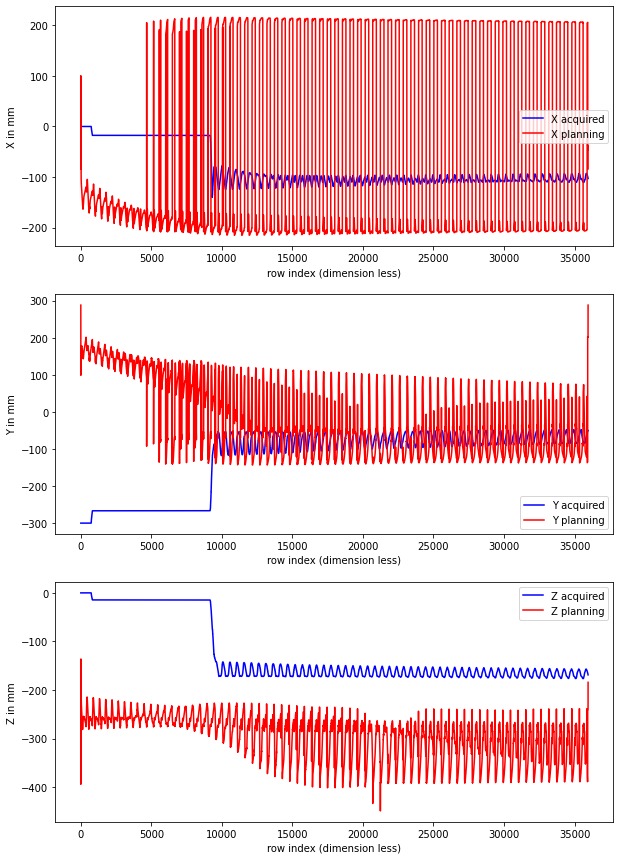

In [169]:
subplotter(0,small_shape,x,y,z,x_inv,y_inv,z_inv)